Mount Google Drive in Colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/telcom_data.csv'
Data = pd.read_csv(file_path)
Data.head()

Bearer Id         Start  Start ms           End  End ms  \
0  13114483460844900000  43559.500903     770.0  43580.607998   662.0   
1  13114483482878900000  43564.544491     235.0  43580.344306   606.0   
2  13114483484080500000  43564.737627       1.0  43580.498762   652.0   
3  13114483485442800000  43565.021817     486.0  43580.317072   171.0   
4  13114483499480700000  43567.840544     565.0  43580.444815   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   9164566995485190   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13            L77566A   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13            D42335A   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13            T21824A   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

In [ ]:
Data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
# Information of all columns in the Data set
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  object 
 1   Start                                     150000 non-null  float64
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  float64
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [ ]:
# Detail Description of the Data set
Data.describe()

Start       Start ms            End         End ms  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean    43581.525451     499.188200   43582.736204     498.800880   
std         1.711286     288.611834       1.764060     288.097653   
min     43559.500903       0.000000   43579.958310       0.000000   
25%     43580.018064     250.000000   43581.312633     251.000000   
50%     43581.369034     499.000000   43582.959780     500.000000   
75%     43582.763192     749.000000   43584.302170     750.000000   
max     43584.311609     999.000000   43585.999618     999.000000   

          Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
count  1.500000e+05  1.494310e+05   1.489350e+05  1.494290e+05   
mean   1.046086e+05  2.082016e+14   4.188282e+10  4.847455e+13   
std    8.103762e+04  2.148809e+10   2.447443e+12  2.241637e+13   
min    7.142000e+03  2.040471e+14   3.360100e+10  4.400152e+11   
25%    5.744050e+04  2.082014e+14   3.365130e+10  3.546071e+13   
50%    8.639900e+04  2.082015e+14   3.366371e+10  3.572201e+13   
75%    1.324302e+05  2.082018e+14   3.368349e+10  8.611970e+13   
max    1.859336e+06  2.140743e+14   8.823971e+14  9.900120e+13   

       Avg RTT DL (ms)  Avg RTT UL (ms)  ...  Youtube DL (Bytes)  \
count    122172.000000    122189.000000  ...        1.500010e+05   
mean        109.795706        17.662883  ...        1.163407e+07   
std         619.782739        84.793524  ...        6.710569e+06   
min           0.000000         0.000000  ...        5.300000e+01   
25%          32.000000         2.000000  ...        5.833501e+06   
50%          45.000000         5.000000  ...        1.161602e+07   
75%          70.000000        15.000000  ...        1.744852e+07   
max       96923.000000      7120.000000  ...        2.325910e+07   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.100941e+07        1.162685e+07        1.100175e+07   
std          6.345423e+06        6.725218e+06        6.359490e+06   
min          1.050000e+02        4.200000e+01        3.500000e+01   
25%          5.517965e+06        5.777156e+06        5.475981e+06   
50%          1.101345e+07        1.164222e+07        1.099638e+07   
75%          1.651556e+07        1.747048e+07        1.650727e+07   
max          2.201196e+07        2.325919e+07        2.201196e+07   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count       1.500010e+05       1.500010e+05      1.500010e+05   
mean        4.220447e+08       8.288398e+06      4.211005e+08   
std         2.439675e+08       4.782700e+06      2.432050e+08   
min         2.516000e+03       5.900000e+01      3.290000e+03   
25%         2.104733e+08       4.128476e+06      2.101869e+08   
50%         4.234081e+08       8.291208e+06      4.218030e+08   
75%         6.331742e+08       1.243162e+07      6.316918e+08   
max         8.434419e+08       1.655879e+07      8.434425e+08   

       Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500000e+05      1.500000e+05  
mean       8.264799e+06      4.112121e+07      4.546434e+08  
std        4.769004e+06      1.127639e+07      2.441429e+08  
min        1.480000e+02      2.866892e+06      7.114041e+06  
25%        4.145943e+06      3.322201e+07      2.431068e+08  
50%        8.267071e+06      4.114331e+07      4.558411e+08  
75%        1.238415e+07      4.903424e+07      6.657055e+08  
max        1.655882e+07      7.833131e+07      9.029696e+08  

[8 rows x 51 columns]

In [ ]:
# Total number of rows and columns of the  Data set
Data.shape

(150001, 55)

In [ ]:
# To check if there is any null values in the Data set
Data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
HTTP DL (Bytes)                              81474
HTTP UL (Bytes)                              81810
Activity Duration DL (ms)                        1
Activity Duration UL (ms)                        1
Dur. (ms).1                                      1
Handset Manufacturer                           572
Handset Type                                   572
Nb of sec with 125000B < Vol DL              97538
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol DL < 31250B       88317
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with Vol DL < 6250B                  755
Nb of sec with Vol UL < 1250B                  793
Social Media DL (Bytes)                          0
Social Media UL (Bytes)                          0
Google DL (Bytes)                                0
Google UL (Bytes)                                0
Email DL (Bytes)                                 0
Email UL (Bytes)                                 0
Youtube DL (Bytes)                               0
Youtube UL (Bytes)                               0
Netflix DL (Bytes)                               0
Netflix UL (Bytes)                               0
Gaming DL (Bytes)                                0
Gaming UL (Bytes)                                0
Other DL (Bytes)                                 0
Other UL (Bytes)                                 0
Total UL (Bytes)                                 1
Total DL (Bytes)                                 1
dtype: int64

In [ ]:
# To check if there is any duplicate value in the Data set
Data.duplicated().sum()

0

In [ ]:
Data['Start'] = Data['Start'].fillna(Data['Start'].mean())
Data['Start ms'] = Data['Start ms'].fillna(Data['Start ms'].mean())
Data['End'] = Data['End'].fillna(Data['End'].mean())
Data['End ms'] = Data['End ms'].fillna(Data['End ms'].mean())
Data['Dur. (ms)'] = Data['Dur. (ms)'].fillna(Data['Dur. (ms)'].mean())

In [ ]:
Data.isnull().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
HTTP DL (Bytes)                              81474
HTTP UL (Bytes)                              81810
Activity Duration DL (ms)                        1
Activity Duration UL (ms)                        1
Dur. (ms).1                                      1
Handset Manufacturer                           572
Handset Type                                   572
Nb of sec with 125000B < Vol DL              97538
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol DL < 31250B       88317
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with Vol DL < 6250B                  755
Nb of sec with Vol UL < 1250B                  793
Social Media DL (Bytes)                          0
Social Media UL (Bytes)                          0
Google DL (Bytes)                                0
Google UL (Bytes)                                0
Email DL (Bytes)                                 0
Email UL (Bytes)                                 0
Youtube DL (Bytes)                               0
Youtube UL (Bytes)                               0
Netflix DL (Bytes)                               0
Netflix UL (Bytes)                               0
Gaming DL (Bytes)                                0
Gaming UL (Bytes)                                0
Other DL (Bytes)                                 0
Other UL (Bytes)                                 0
Total UL (Bytes)                                 1
Total DL (Bytes)                                 1
dtype: int64

In [ ]:
Data['Activity Duration DL (ms)'] = Data['Activity Duration DL (ms)'].fillna(Data['Activity Duration DL (ms)'].mean())
Data['Activity Duration UL (ms)'] = Data['Activity Duration UL (ms)'].fillna(Data['Activity Duration UL (ms)'].mean())
Data['Dur. (ms).1'] = Data['Dur. (ms).1'].fillna(Data['Dur. (ms).1'].mean())
Data['Total UL (Bytes)'] = Data['Total UL (Bytes)'].fillna(Data['Total UL (Bytes)'].mean())
Data['Total DL (Bytes)'] = Data['Total DL (Bytes)'].fillna(Data['Total DL (Bytes)'].mean())

In [ ]:
numerical_cols = Data.select_dtypes(include='number').columns
numerical_cols

Index(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
  

In [ ]:
Data['IMSI'] = Data['IMSI'].fillna(0)
Data['MSISDN/Number'] = Data['MSISDN/Number'].fillna(0)
Data['MSISDN/Number'] = Data['MSISDN/Number'].fillna(0)

In [ ]:
Data.isnull().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
HTTP DL (Bytes)                              81474
HTTP UL (Bytes)                              81810
Activity Duration DL (ms)                        0
Activity Duration UL (ms)                        0
Dur. (ms).1                                      0
Handset Manufacturer                           572
Handset Type                                   572
Nb of sec with 125000B < Vol DL              97538
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol DL < 31250B       88317
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with Vol DL < 6250B                  755
Nb of sec with Vol UL < 1250B                  793
Social Media DL (Bytes)                          0
Social Media UL (Bytes)                          0
Google DL (Bytes)                                0
Google UL (Bytes)                                0
Email DL (Bytes)                                 0
Email UL (Bytes)                                 0
Youtube DL (Bytes)                               0
Youtube UL (Bytes)                               0
Netflix DL (Bytes)                               0
Netflix UL (Bytes)                               0
Gaming DL (Bytes)                                0
Gaming UL (Bytes)                                0
Other DL (Bytes)                                 0
Other UL (Bytes)                                 0
Total UL (Bytes)                                 0
Total DL (Bytes)                                 0
dtype: int64

In [ ]:
Data['Avg Bearer TP DL (kbps)'] = Data['Avg Bearer TP DL (kbps)'].fillna(Data['Avg Bearer TP DL (kbps)'].mean())
Data['Avg Bearer TP UL (kbps)'] = Data['Avg Bearer TP UL (kbps)'].fillna(Data['Avg Bearer TP UL (kbps)'].mean())

In [ ]:
numerical_cols

Index(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
  

In [ ]:
Data[numerical_cols] = Data[numerical_cols].fillna(Data[numerical_cols].mean())

In [ ]:
Data.isnull().sum()

Bearer Id                                      0
Start                                          0
Start ms                                       0
End                                            0
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%)                            0
10 Kbps < UL TP < 50 Kbps (%)                  0
50 Kbps < UL TP < 300 Kbps (%)                 0
UL TP > 300 Kbps (%)                           0
HTTP DL (Bytes)                                0
HTTP UL (Bytes)                                0
Activity Duration DL (ms)                      0
Activity Duration UL (ms)                      0
Dur. (ms).1                                    0
Handset Manufacturer                         572
Handset Type                                 572
Nb of sec with 125000B < Vol DL                0
Nb of sec with 1250B < Vol UL < 6250B          0
Nb of sec with 31250B < Vol DL < 125000B       0
Nb of sec with 37500B < Vol UL                 0
Nb of sec with 6250B < Vol DL < 31250B         0
Nb of sec with 6250B < Vol UL < 37500B         0
Nb of sec with Vol DL < 6250B                  0
Nb of sec with Vol UL < 1250B                  0
Social Media DL (Bytes)                        0
Social Media UL (Bytes)                        0
Google DL (Bytes)                              0
Google UL (Bytes)                              0
Email DL (Bytes)                               0
Email UL (Bytes)                               0
Youtube DL (Bytes)                             0
Youtube UL (Bytes)                             0
Netflix DL (Bytes)                             0
Netflix UL (Bytes)                             0
Gaming DL (Bytes)                              0
Gaming UL (Bytes)                              0
Other DL (Bytes)                               0
Other UL (Bytes)                               0
Total UL (Bytes)                               0
Total DL (Bytes)                               0
dtype: int64

In [ ]:
Data['Last Location Name'] = Data['Last Location Name'].fillna('Unknown')
Data['Handset Manufacturer'] = Data['Handset Manufacturer'].fillna('Unknown')
Data['Handset Type'] = Data['Handset Type'].fillna('Unknown')

In [ ]:
Data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)                   0
Dur. (ms).1                                 0
Handset Manufacturer                        0
Handset Type                                0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol DL < 31250B      0
Nb of sec with 6250B < Vol UL < 37500B      0
Nb of sec with Vol DL < 6250B               0
Nb of sec with Vol UL < 1250B               0
Social Media DL (Bytes)                     0
Social Media UL (Bytes)                     0
Google DL (Bytes)                           0
Google UL (Bytes)                           0
Email DL (Bytes)                            0
Email UL (Bytes)                            0
Youtube DL (Bytes)                          0
Youtube UL (Bytes)                          0
Netflix DL (Bytes)                          0
Netflix UL (Bytes)                          0
Gaming DL (Bytes)                           0
Gaming UL (Bytes)                           0
Other DL (Bytes)                            0
Other UL (Bytes)                            0
Total UL (Bytes)                            0
Total DL (Bytes)                            0
dtype: int64

In [ ]:
print("Data types before conversion:\n", Data.dtypes)

Data types before conversion:
 Bearer Id                                    object
Start                                       float64
Start ms                                    float64
End                                         float64
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)    

In [ ]:
# Standardize column names
Data.columns = Data.columns.str.strip().str.replace(' ', '_').str.lower()

In [ ]:
print("Data after preprocessing:\n", Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  object 
 1   start                                     150001 non-null  float64
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  float64
 4   end_ms                                    150001 non-null  float64
 5   dur._(ms)                                 150001 non-null  float64
 6   imsi                                      150001 non-null  float64
 7   msisdn/number                             150001 non-null  float64
 8   imei                                      150001 non-null  float64
 9   last_location_name                        150001 non-null  object 
 10  avg_rtt_dl_(ms)     

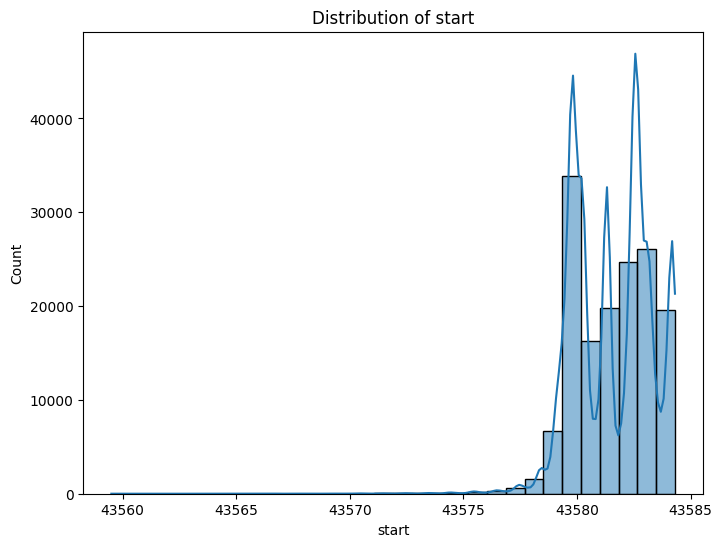

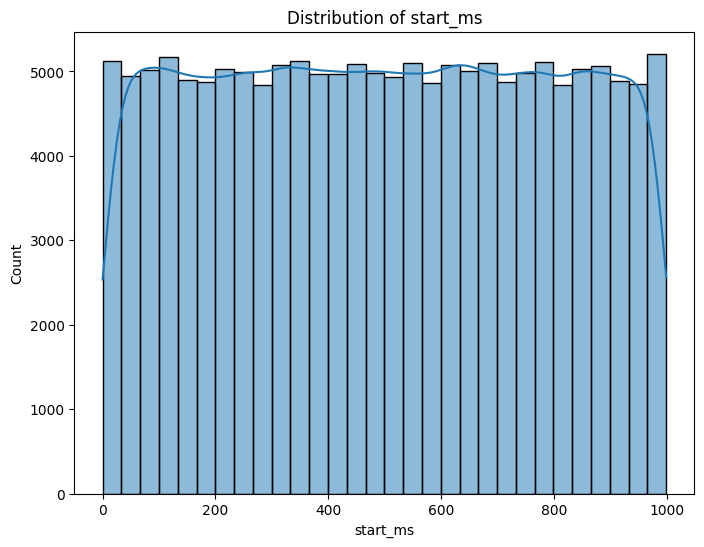

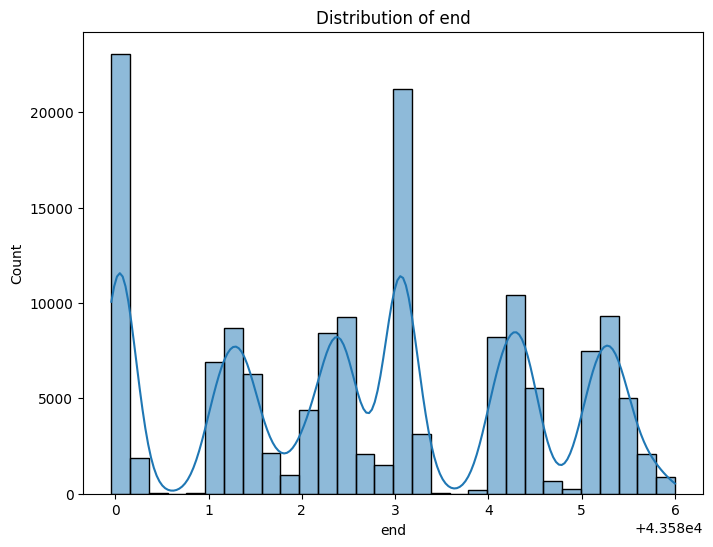

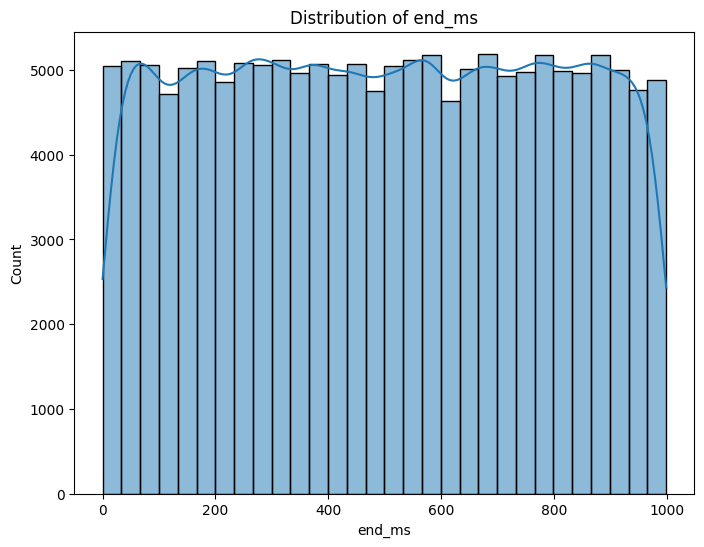

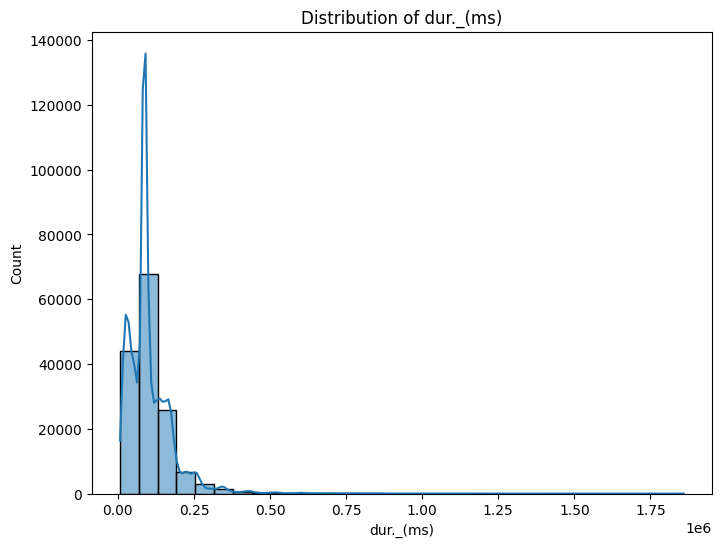

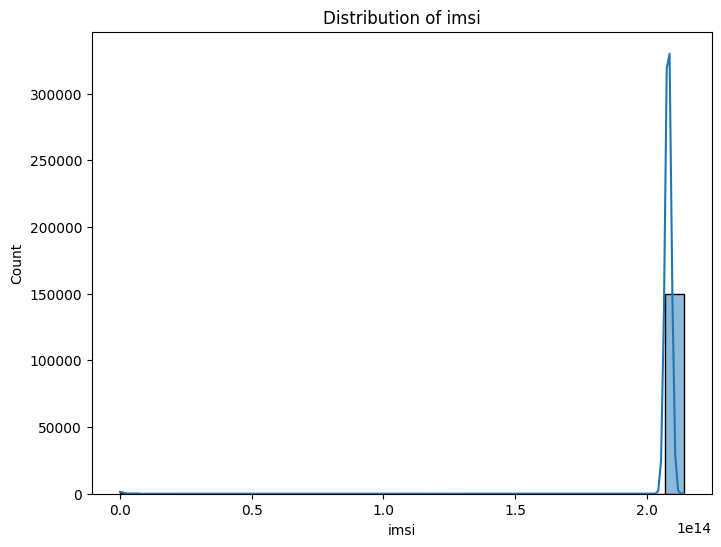

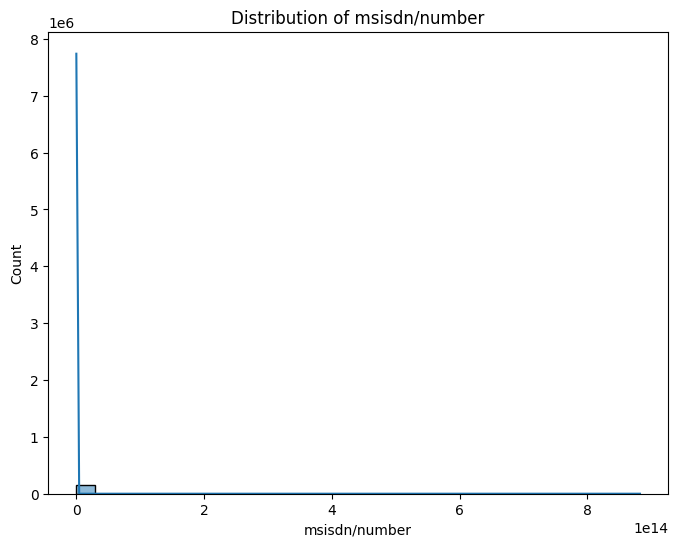

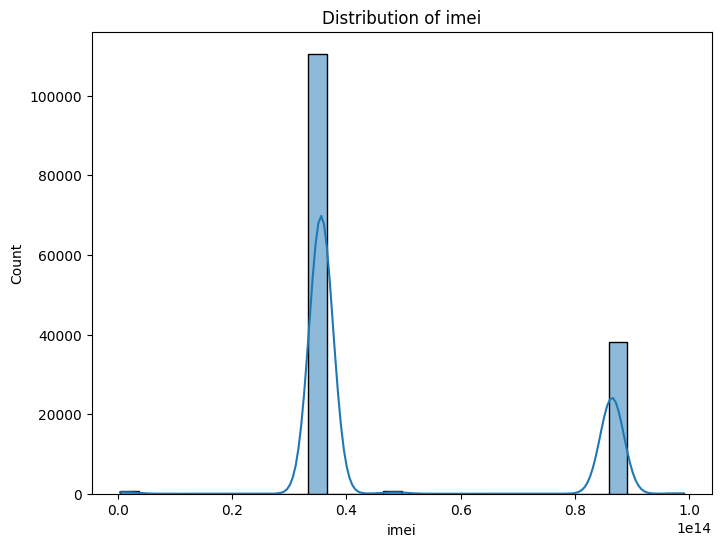

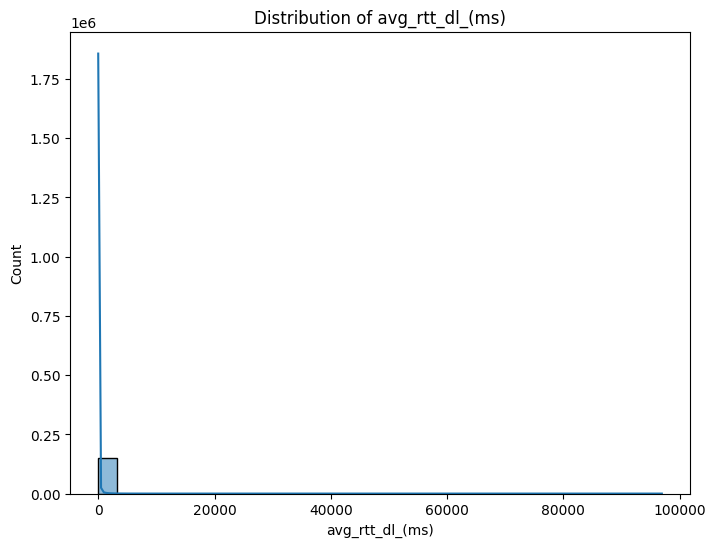

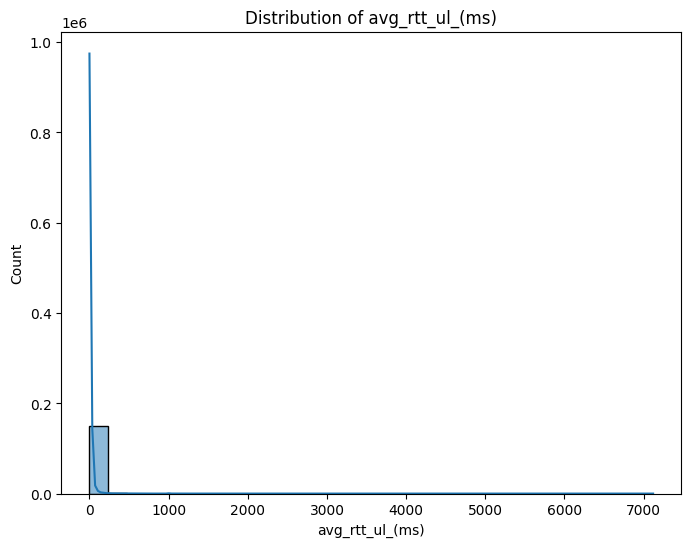

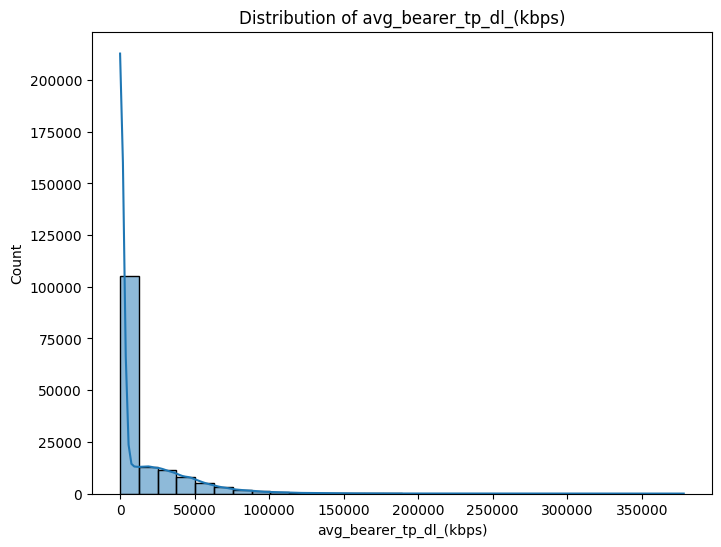

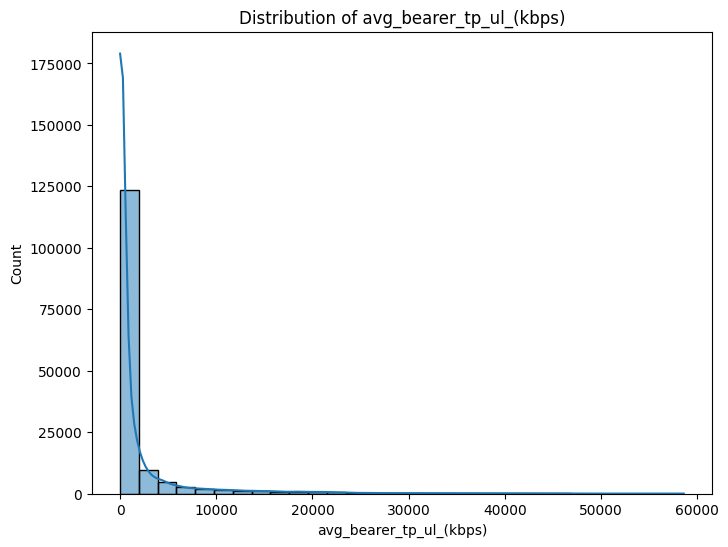

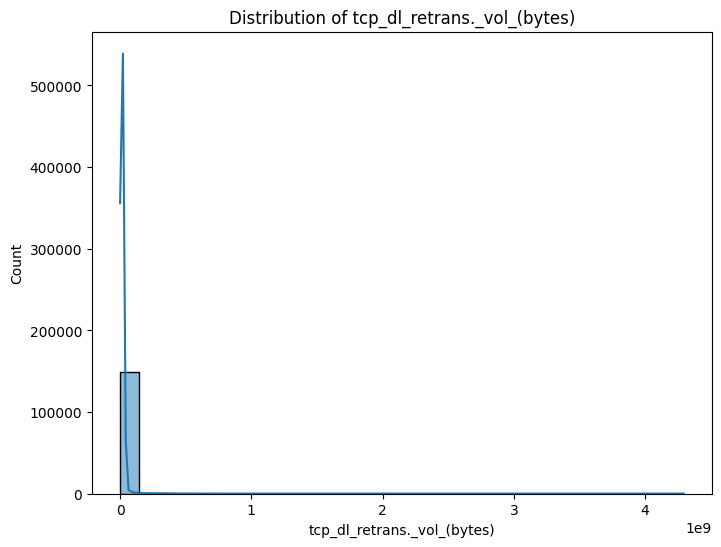

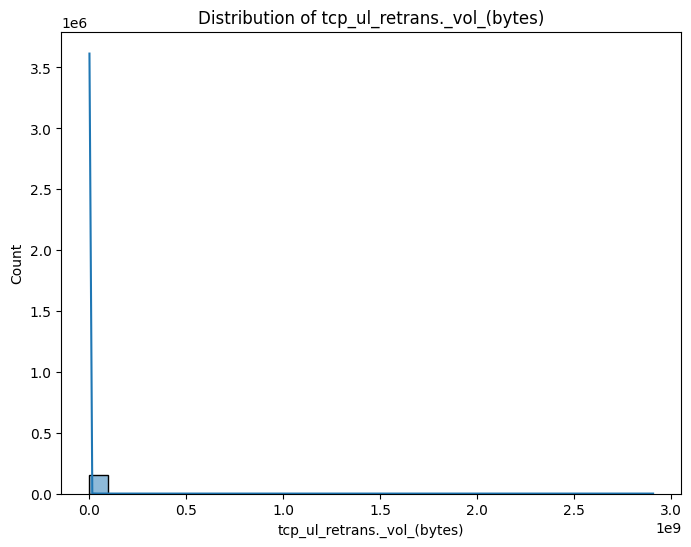

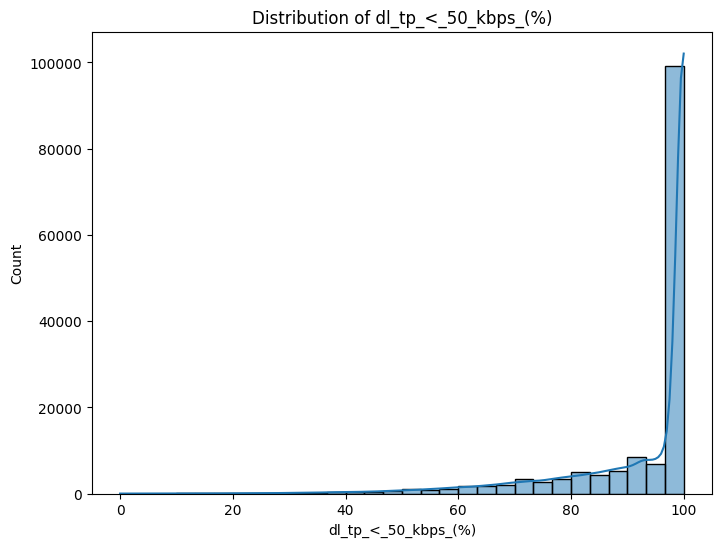

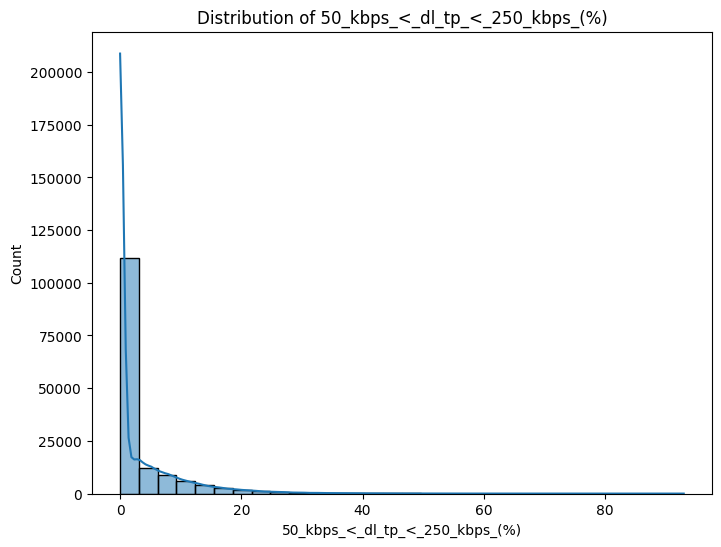

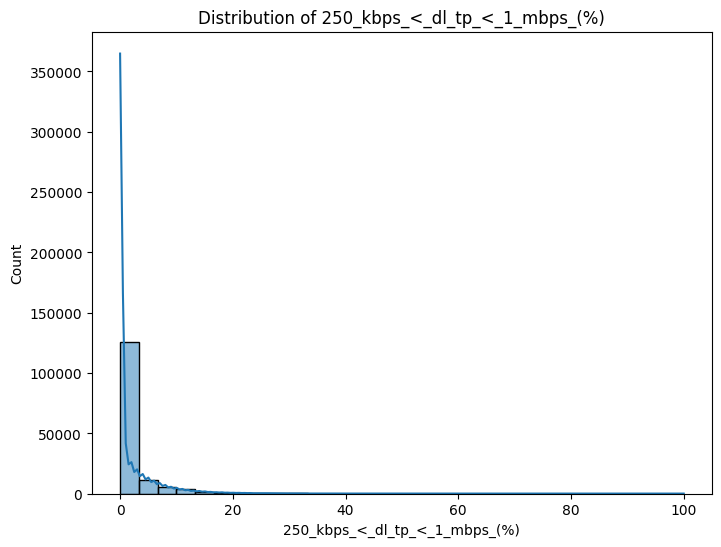

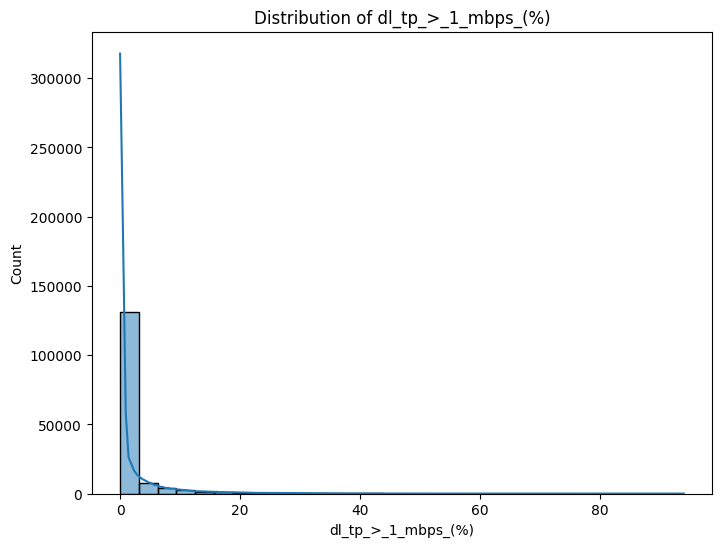

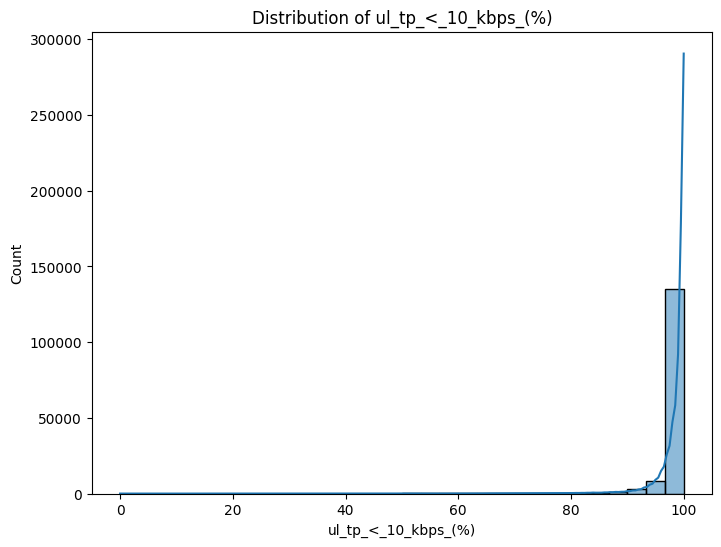

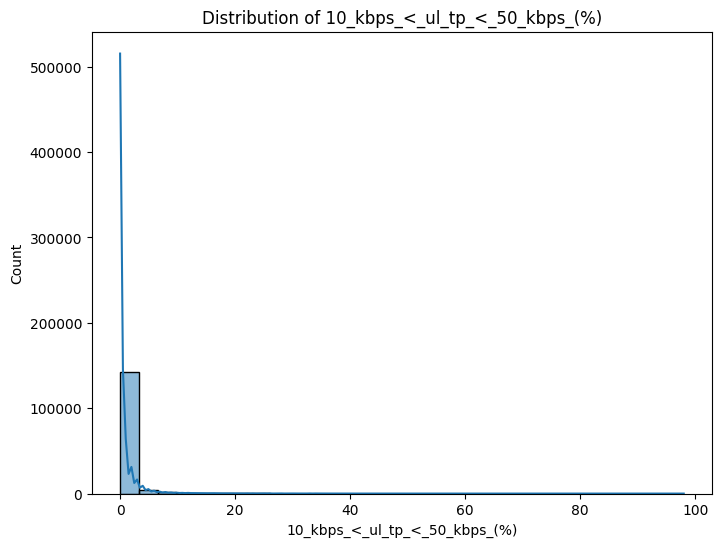

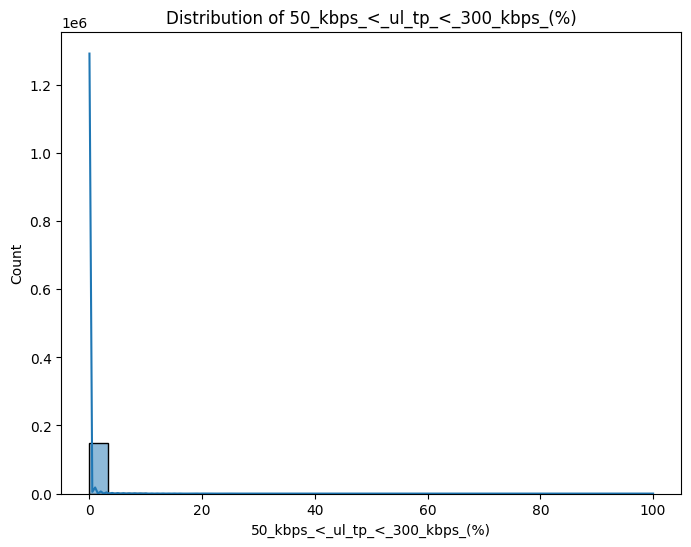

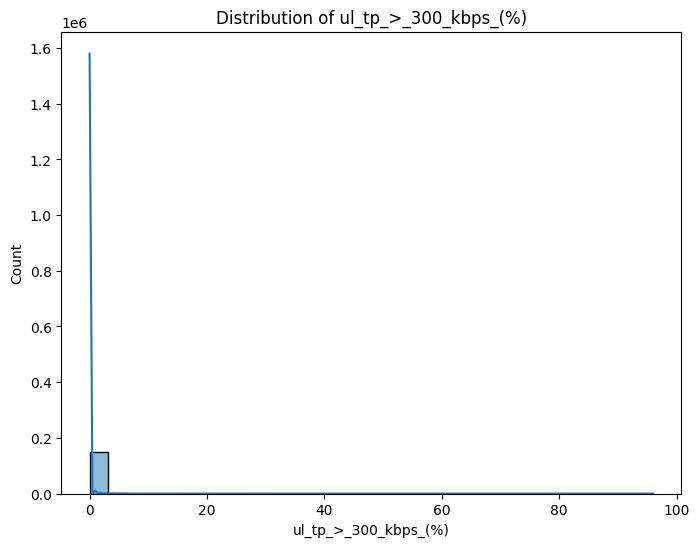

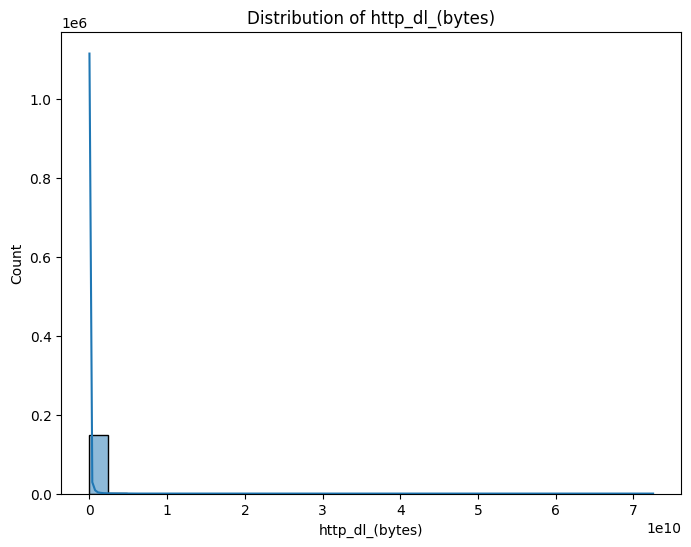

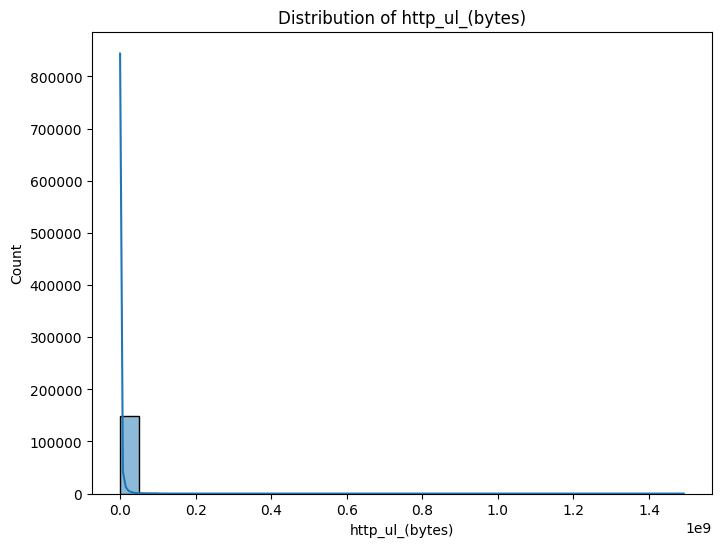

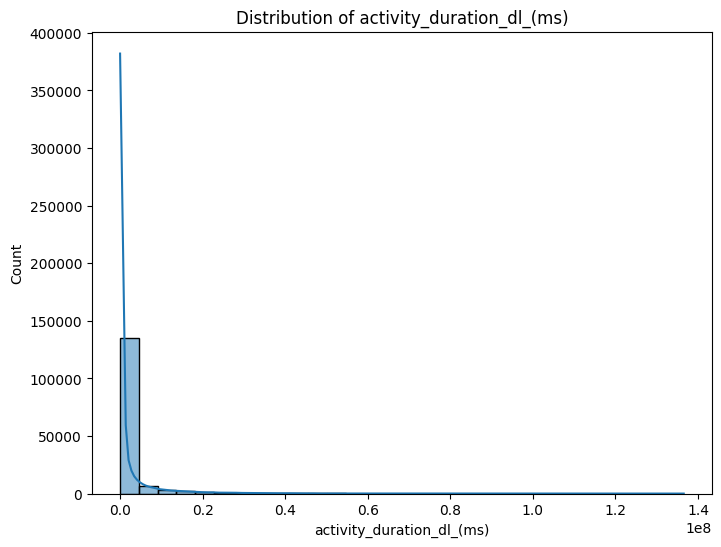

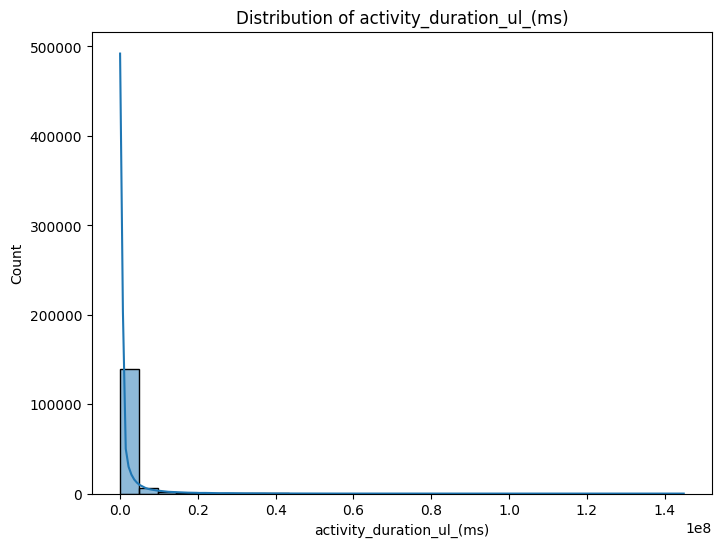

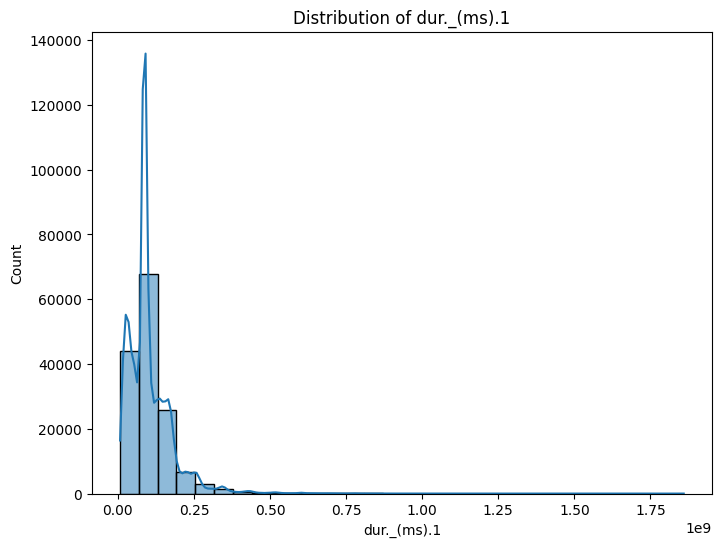

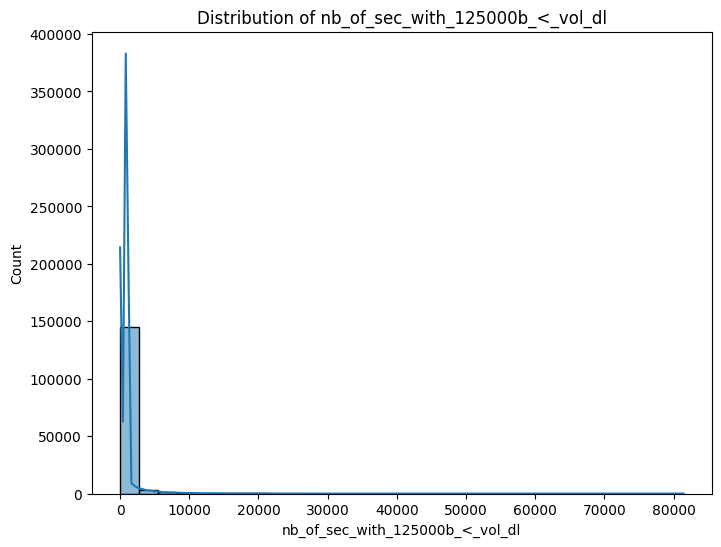

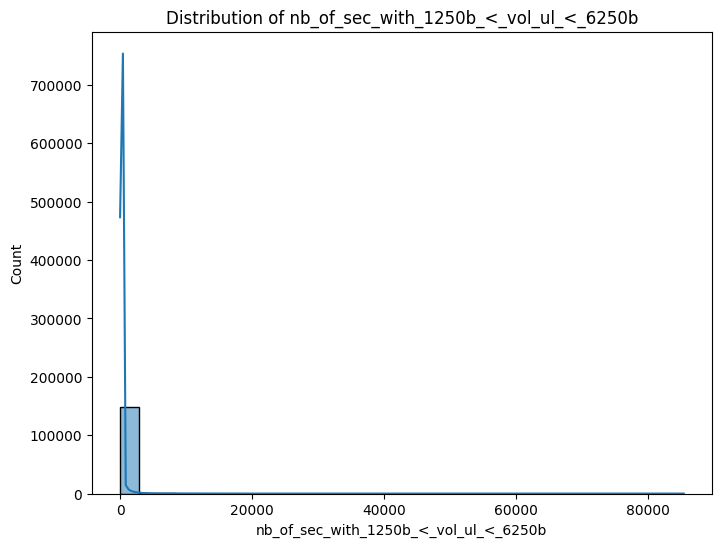

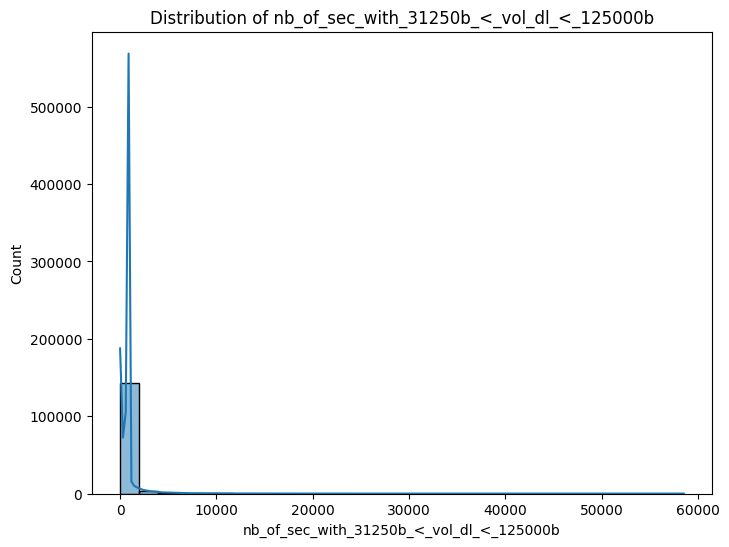

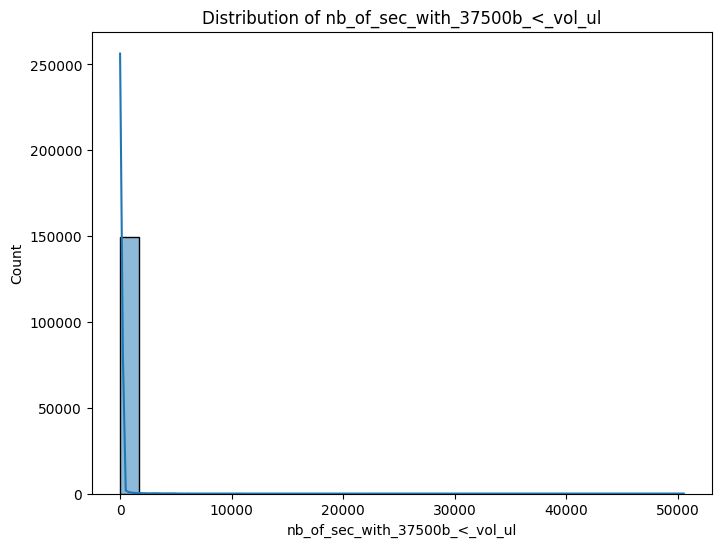

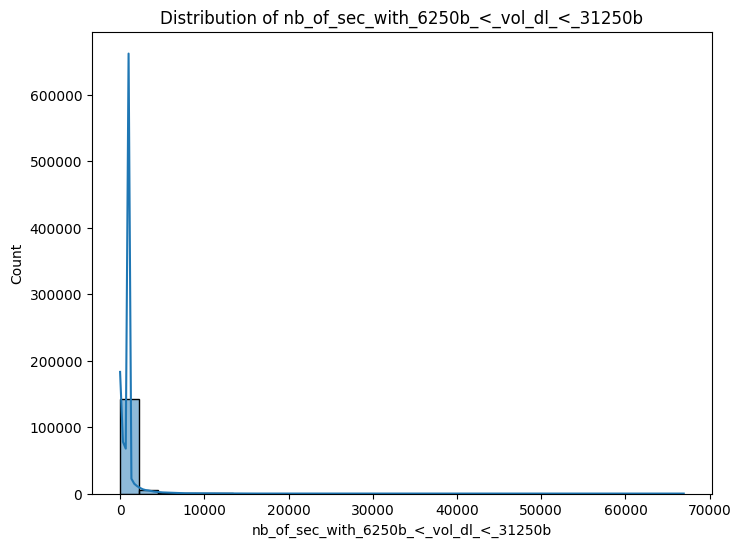

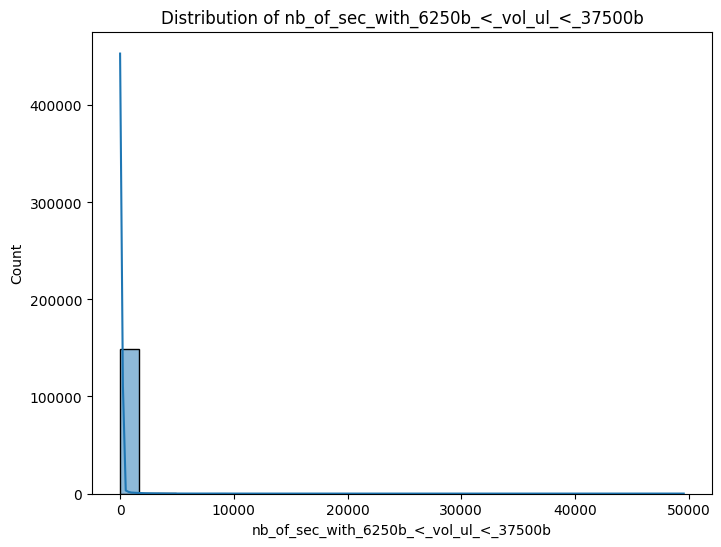

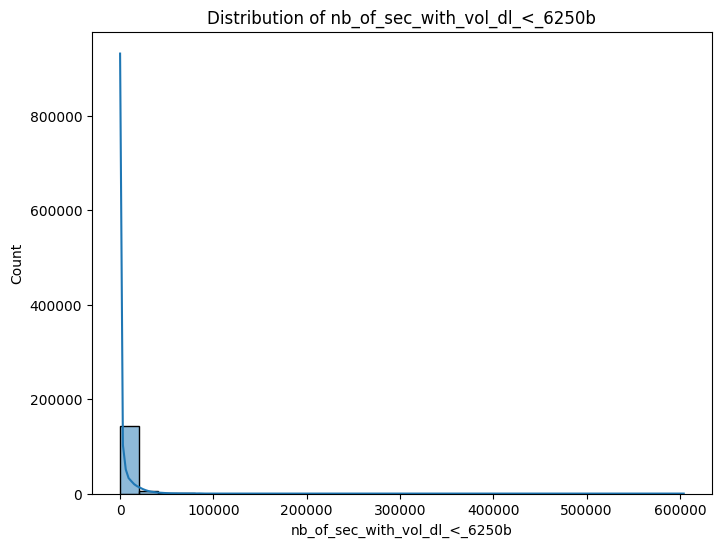

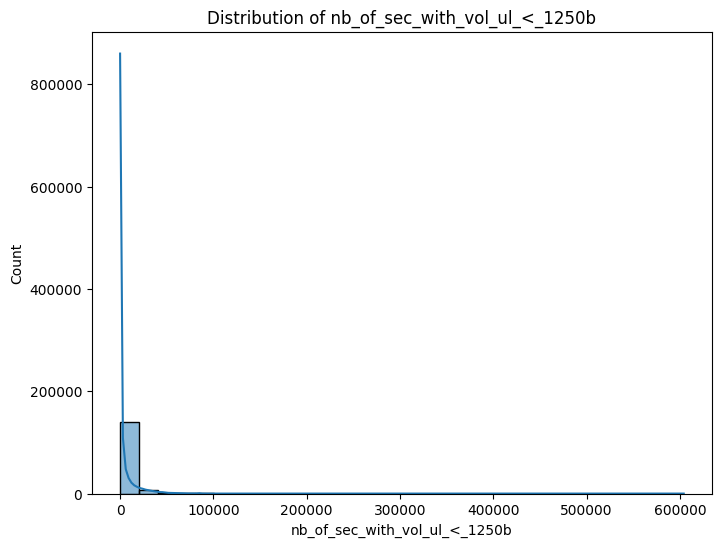

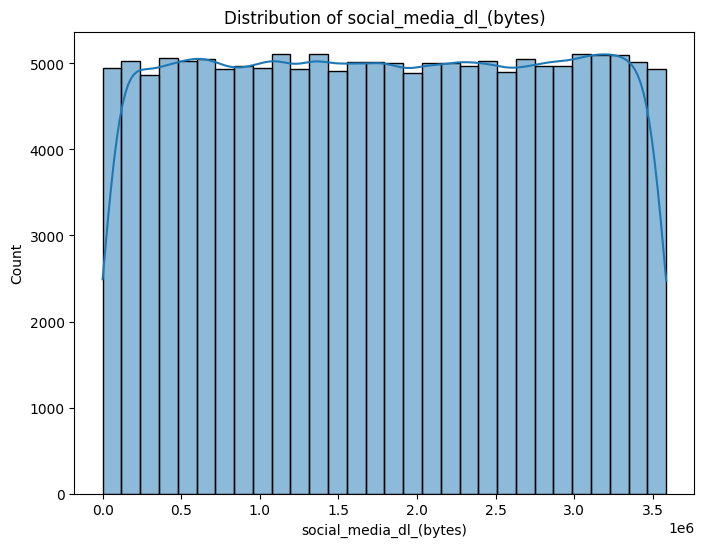

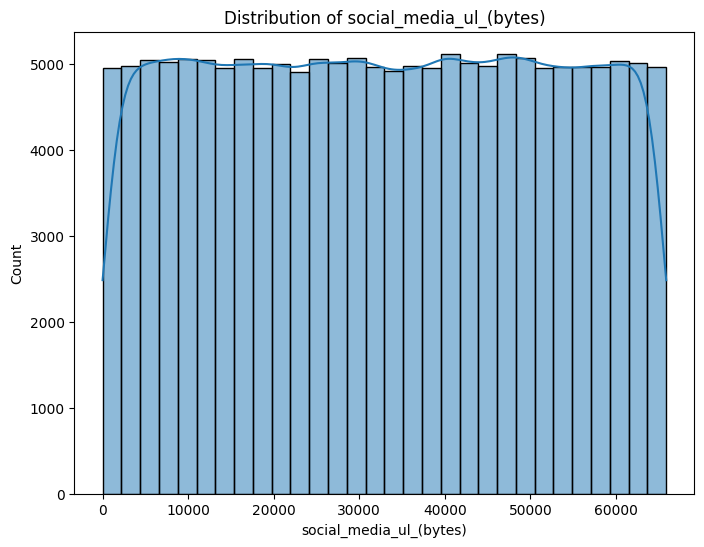

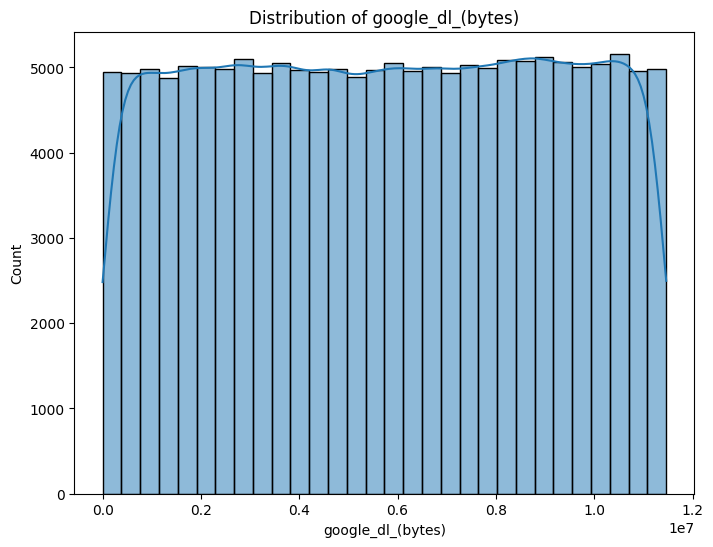

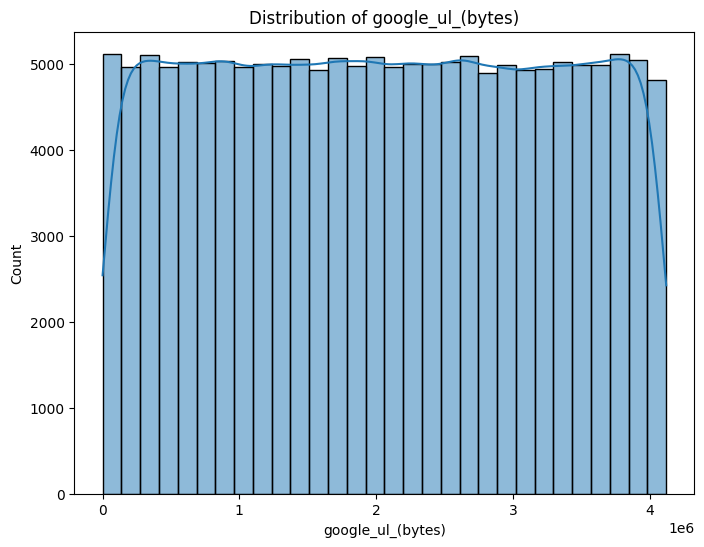

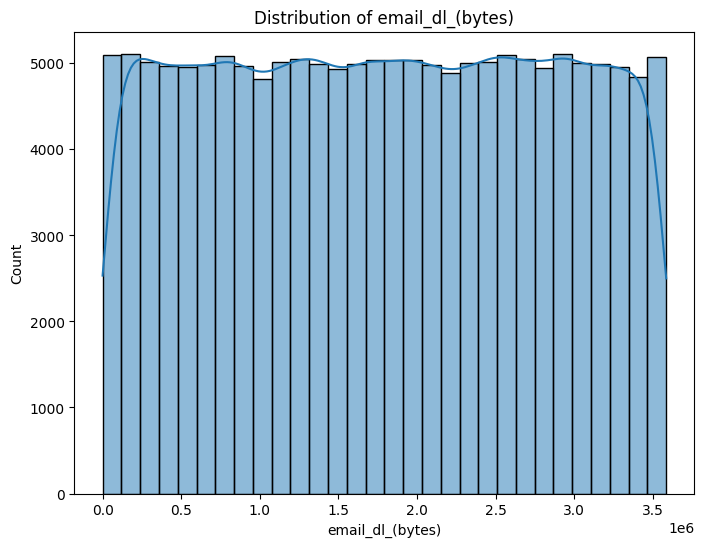

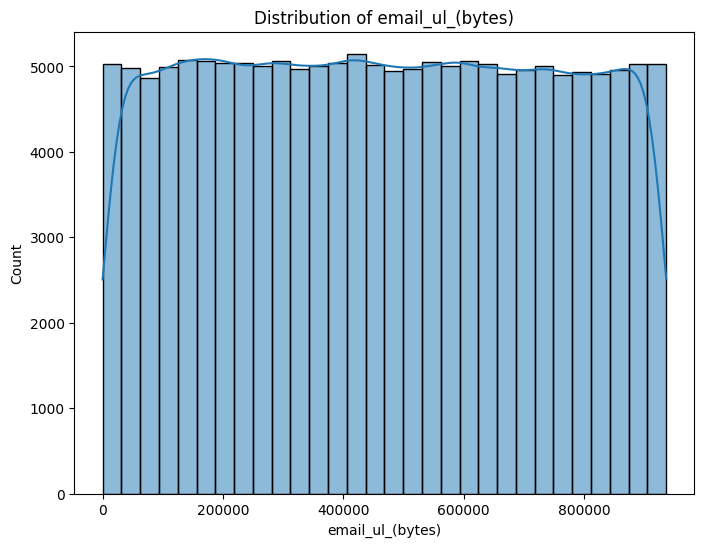

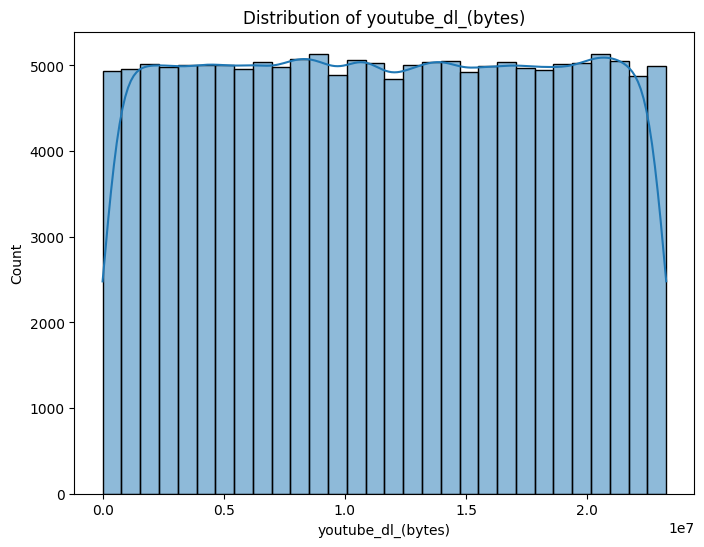

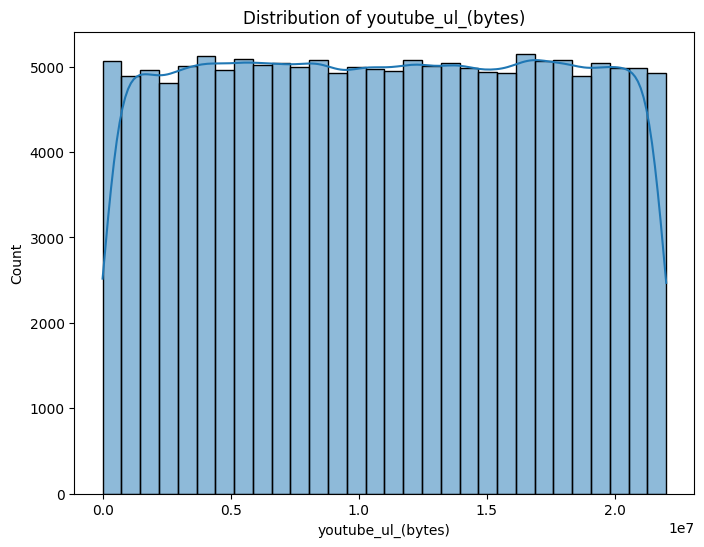

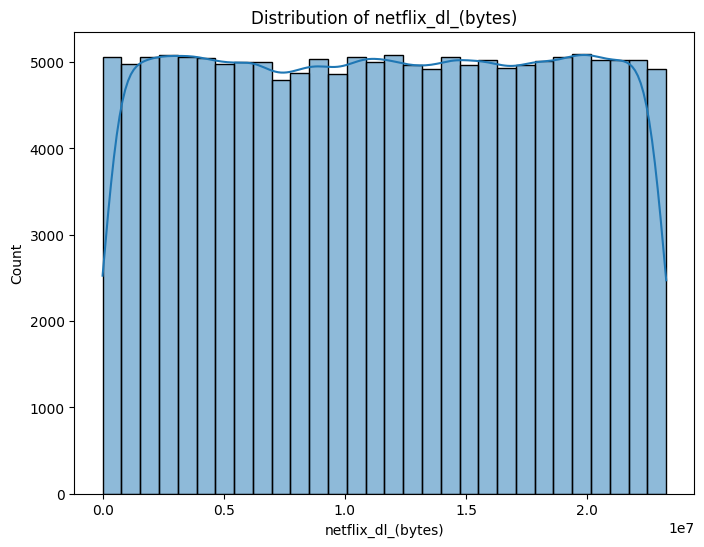

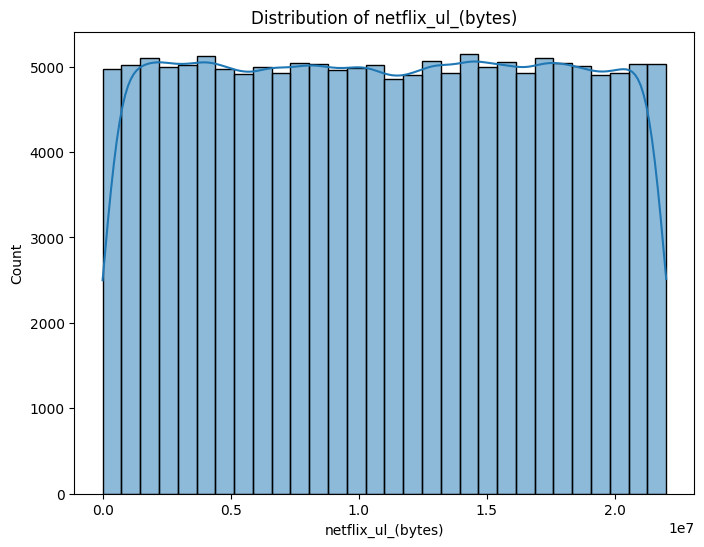

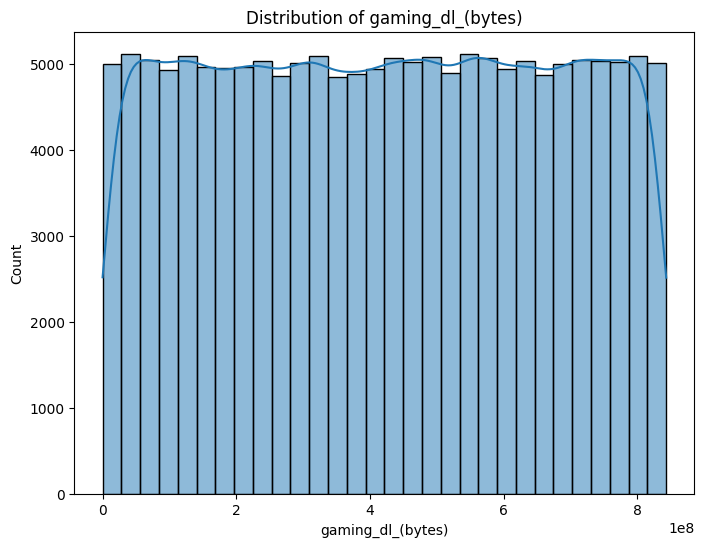

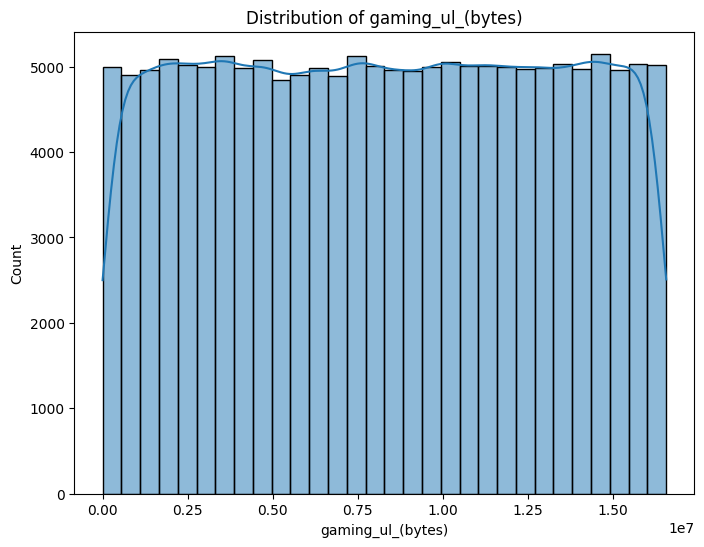

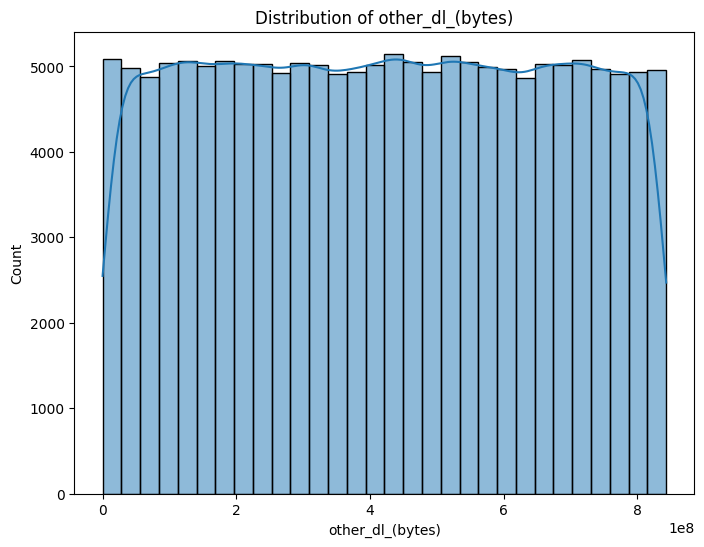

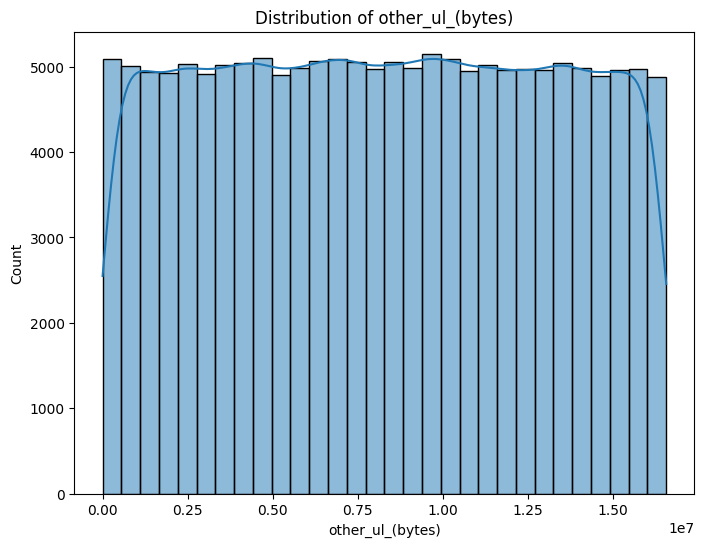

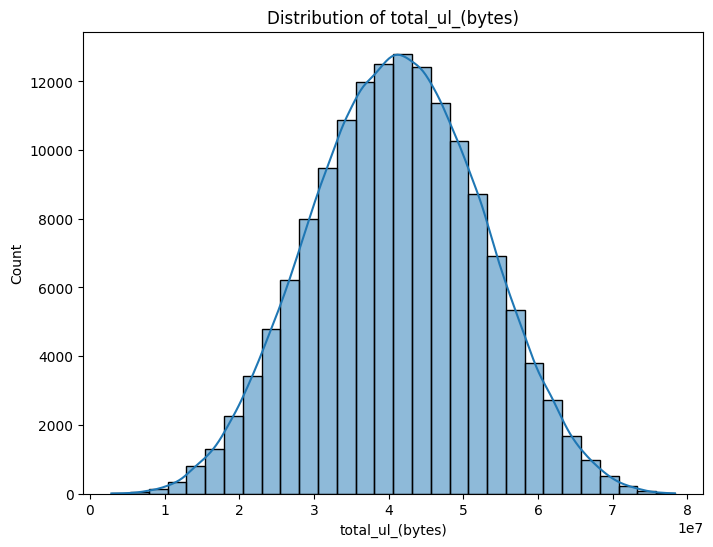

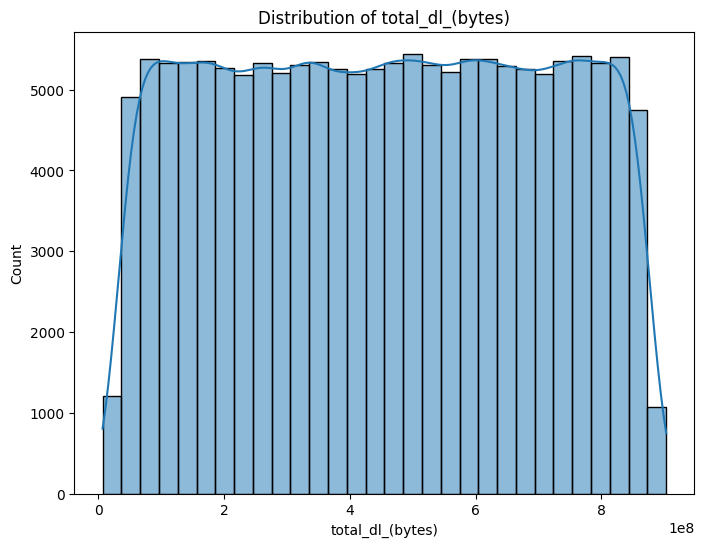

In [ ]:
numerical_cols = Data.select_dtypes(include='float64').columns

for col in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(Data[col],kde=True,bins=30)
  plt.title(f"Distribution of {col}")
  plt.show()

In [ ]:
Data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [ ]:
# Task 1 - User Overview Analysis

# 1. Identify the Top 10 Handsets Used by Customers.

In [ ]:
top_handsets = Data['handset_type'].value_counts().head(10)

In [ ]:
top_handsets

handset_type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [ ]:
# Identify the Top 10 Handsets Used by Customers.

In [ ]:
top_handsets = Data['handset_type'].value_counts().head(10)

In [ ]:
top_handsets

handset_type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [ ]:
top_handset_manufactures = Data['handset_manufacturer'].value_counts().head(3)

In [ ]:
top_handset_manufactures

handset_manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [ ]:
# Identify the Top 5 Handsets per Top 3 Handset Manufacturer.

In [ ]:
top_3_handset_manufactures = top_handset_manufactures.index.tolist()
top_3_handset_manufactures

['Apple', 'Samsung', 'Huawei']

In [ ]:
for manufacture in top_3_handset_manufactures:
  print(f"Top 5 handet per {manufacture}")
  top_handsets_per_manufacture = Data[Data['handset_manufacturer'] ==  manufacture]['handset_type'].value_counts().head(5)
  print(top_handsets_per_manufacture)

Top 5 handet per Apple
handset_type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handet per Samsung
handset_type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handet per Huawei
handset_type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [ ]:
top_hanset_per_manufactures = Data.groupby('handset_manufacturer')['handset_type'].value_counts().head(5)

In [ ]:
top_hanset_per_manufactures

handset_manufacturer                     handset_type                     
A-Link Telecom International Co Limited  A-Link Telecom I. Cubot X18 Plus     2
                                         A-Link Telecom I. Cubot A5           1
                                         A-Link Telecom I. Cubot Note Plus    1
                                         A-Link Telecom I. Cubot Note S       1
                                         A-Link Telecom I. Cubot Nova         1
Name: count, dtype: int64

Interpretation:
- Huawei dominates as the most-used handset type, followed by Apple models like iPhone 6S and 6.
- Apple is a strong player with multiple models in the top 10.
- Samsung Galaxy S8 is another significant contender.

Recomndation:
- Targeted Promotions : Make offers specifically for Huawei and Apple users, as they constitute a majority.
- Focus on Samsung : Increase engagement with Samsung users by highlighting device-specific benefits.
- Customer Retention : For unidentified handsets, consider marketing campaigns encouraging users to register their devices.

Task 1.1 - User Behavior Overview
- Number of xDR sessions
- Session duration
- Total download (DL) and upload (UL) data
-Total data volume (in Bytes) during each session for each application

In [ ]:
Data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [ ]:
user_behavior = (
    Data.groupby('msisdn/number')  # Group by user (identified by MSISDN/Number)
    .agg(
        num_xdr_sessions=('bearer_id', 'count'),  # Number of xDR sessions
        total_session_duration=('dur._(ms)', 'sum'),  # Total session duration
        total_dl_data=('total_dl_(bytes)', 'sum'),  # Total download data
        total_ul_data=('total_ul_(bytes)', 'sum')  # Total upload data
    )
    .reset_index()
)

# Calculate total data volume after the aggregation
user_behavior['total_data_volume'] = user_behavior['total_dl_data'] + user_behavior['total_ul_data']

print(f"User Behaviour Overview: {user_behavior.head()}")

User Behaviour Overview:    msisdn/number  num_xdr_sessions  total_session_duration  total_dl_data  \
0   0.000000e+00              1066            7.255100e+07   4.873783e+11   
1   3.360100e+10                 1            1.167200e+05   8.426375e+08   
2   3.360100e+10                 1            1.812300e+05   1.207552e+08   
3   3.360100e+10                 1            1.349690e+05   5.566597e+08   
4   3.360101e+10                 1            4.987800e+04   4.019932e+08   

   total_ul_data  total_data_volume  
0   4.436642e+10       5.317447e+11  
1   3.605311e+07       8.786906e+08  
2   3.610446e+07       1.568596e+08  
3   3.930682e+07       5.959665e+08  
4   2.032753e+07       4.223207e+08  


Conduct EDA on the aggregated data and communicate useful insights. Ensure to identify and treat
all missing values and outliers by replacing them with the mean of the corresponding column.

In [ ]:
def get_continious_categorical_data_columns(data):
    contnious_data_list = []
    categorical_data_list = []
    for col in data.columns:
        print(f"Col : {col} | Datatype : {data[col].dtypes}")
        if data[col].dtypes == "object":
            categorical_data_list.append(col)
        else:
            contnious_data_list.append(col)
    return categorical_data_list, contnious_data_list

categorical_data_list, contnious_data_list  = get_continious_categorical_data_columns(Data)


Col : bearer_id | Datatype : object
Col : start | Datatype : float64
Col : start_ms | Datatype : float64
Col : end | Datatype : float64
Col : end_ms | Datatype : float64
Col : dur._(ms) | Datatype : float64
Col : imsi | Datatype : float64
Col : msisdn/number | Datatype : float64
Col : imei | Datatype : float64
Col : last_location_name | Datatype : object
Col : avg_rtt_dl_(ms) | Datatype : float64
Col : avg_rtt_ul_(ms) | Datatype : float64
Col : avg_bearer_tp_dl_(kbps) | Datatype : float64
Col : avg_bearer_tp_ul_(kbps) | Datatype : float64
Col : tcp_dl_retrans._vol_(bytes) | Datatype : float64
Col : tcp_ul_retrans._vol_(bytes) | Datatype : float64
Col : dl_tp_<_50_kbps_(%) | Datatype : float64
Col : 50_kbps_<_dl_tp_<_250_kbps_(%) | Datatype : float64
Col : 250_kbps_<_dl_tp_<_1_mbps_(%) | Datatype : float64
Col : dl_tp_>_1_mbps_(%) | Datatype : float64
Col : ul_tp_<_10_kbps_(%) | Datatype : float64
Col : 10_kbps_<_ul_tp_<_50_kbps_(%) | Datatype : float64
Col : 50_kbps_<_ul_tp_<_300_kbps_

In [ ]:
# Calculate Descriptive Statistics for each numerical column
descriptive_stats = Data[contnious_data_list].describe()

# Calculate Mode for each numerical column
mode_values = Data[contnious_data_list].mode().iloc[0]  # Selecting the first mode value if there are multiple

# Calculate Variance
variance_values = Data[contnious_data_list].var()

# Calculate Standard Deviation
std_dev_values = Data[contnious_data_list].std()

# Calculate Range (max - min) for each column
range_values = Data[contnious_data_list].max() - Data[contnious_data_list].min()

# Calculate Interquartile Range (IQR) for each column
IQR_values = Data[contnious_data_list].quantile(0.75) - Data[contnious_data_list].quantile(0.25)

# Combine all statistics into one DataFrame
univariate_analysis = pd.DataFrame({
    'Mean': descriptive_stats.loc['mean'],
    'Median': Data[numerical_cols].median(),
    'Mode': mode_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values,
    'Range': range_values,
    'IQR': IQR_values
})

# Display the univariate analysis results
print(univariate_analysis)

                                                  Mean        Median  \
start                                     4.358153e+04  4.358137e+04   
start_ms                                  4.991882e+02  4.990000e+02   
end                                       4.358274e+04  4.358296e+04   
end_ms                                    4.988009e+02  5.000000e+02   
dur._(ms)                                 1.046086e+05  8.639900e+04   
imsi                                      2.074105e+14  2.082015e+14   
msisdn/number                             4.158517e+10  3.366361e+10   
imei                                      4.847455e+13  3.572241e+13   
avg_rtt_dl_(ms)                           1.097957e+02  5.400000e+01   
avg_rtt_ul_(ms)                           1.766288e+01  7.000000e+00   
avg_bearer_tp_dl_(kbps)                   1.330005e+04  6.300000e+01   
avg_bearer_tp_ul_(kbps)                   1.770429e+03  6.300000e+01   
tcp_dl_retrans._vol_(bytes)               2.080991e+07  2.080991

In [ ]:
# Calculate Z-scores
z_scores = np.abs(zscore(Data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)

print("\nOutliers Count (Z-score > 3):")
print(outliers)


Outliers Count (Z-score > 3):
start                                        573
start_ms                                       0
end                                            0
end_ms                                         0
dur._(ms)                                   2214
imsi                                         570
msisdn/number                                  2
imei                                           0
avg_rtt_dl_(ms)                              815
avg_rtt_ul_(ms)                              748
avg_bearer_tp_dl_(kbps)                     2983
avg_bearer_tp_ul_(kbps)                     4269
tcp_dl_retrans._vol_(bytes)                  538
tcp_ul_retrans._vol_(bytes)                   96
dl_tp_<_50_kbps_(%)                         3467
50_kbps_<_dl_tp_<_250_kbps_(%)              3462
250_kbps_<_dl_tp_<_1_mbps_(%)               3147
dl_tp_>_1_mbps_(%)                          3464
ul_tp_<_10_kbps_(%)                         2199
10_kbps_<_ul_tp_<_50_kbps_(%)         

In [ ]:
z_scores = Data[contnious_data_list].apply(zscore)

# Step 2: Replace outliers (z-scores > 3 or < -3) with the column mean
for column in contnious_data_list:
    mean_value = Data[column].mean()
    # Replace outliers with the mean of the column
    Data[column] = np.where(np.abs(z_scores[column]) > 3, mean_value, Data[column])

# Print the description of the data after treating outliers
print("\nData after treating outliers:")
print(Data.describe())


Data after treating outliers:
               start       start_ms            end         end_ms  \
count  150001.000000  150001.000000  150001.000000  150001.000000   
mean    43581.554372     499.188200   43582.736204     498.800880   
std         1.638010     288.610872       1.764054     288.096693   
min     43576.393785       0.000000   43579.958310       0.000000   
25%     43580.043044     250.000000   43581.312639     251.000000   
50%     43581.373530     499.000000   43582.959769     500.000000   
75%     43582.763171     749.000000   43584.302164     750.000000   
max     43584.311609     999.000000   43585.999618     999.000000   

           dur._(ms)          imsi  msisdn/number          imei  \
count  150001.000000  1.500010e+05   1.500010e+05  1.500010e+05   
mean    98706.547697  2.081986e+14   3.345647e+10  4.847455e+13   
std     60045.579365  5.319305e+10   8.644409e+09  2.237359e+13   
min      7142.000000  2.040471e+14   0.000000e+00  4.400152e+11   
25%     5744

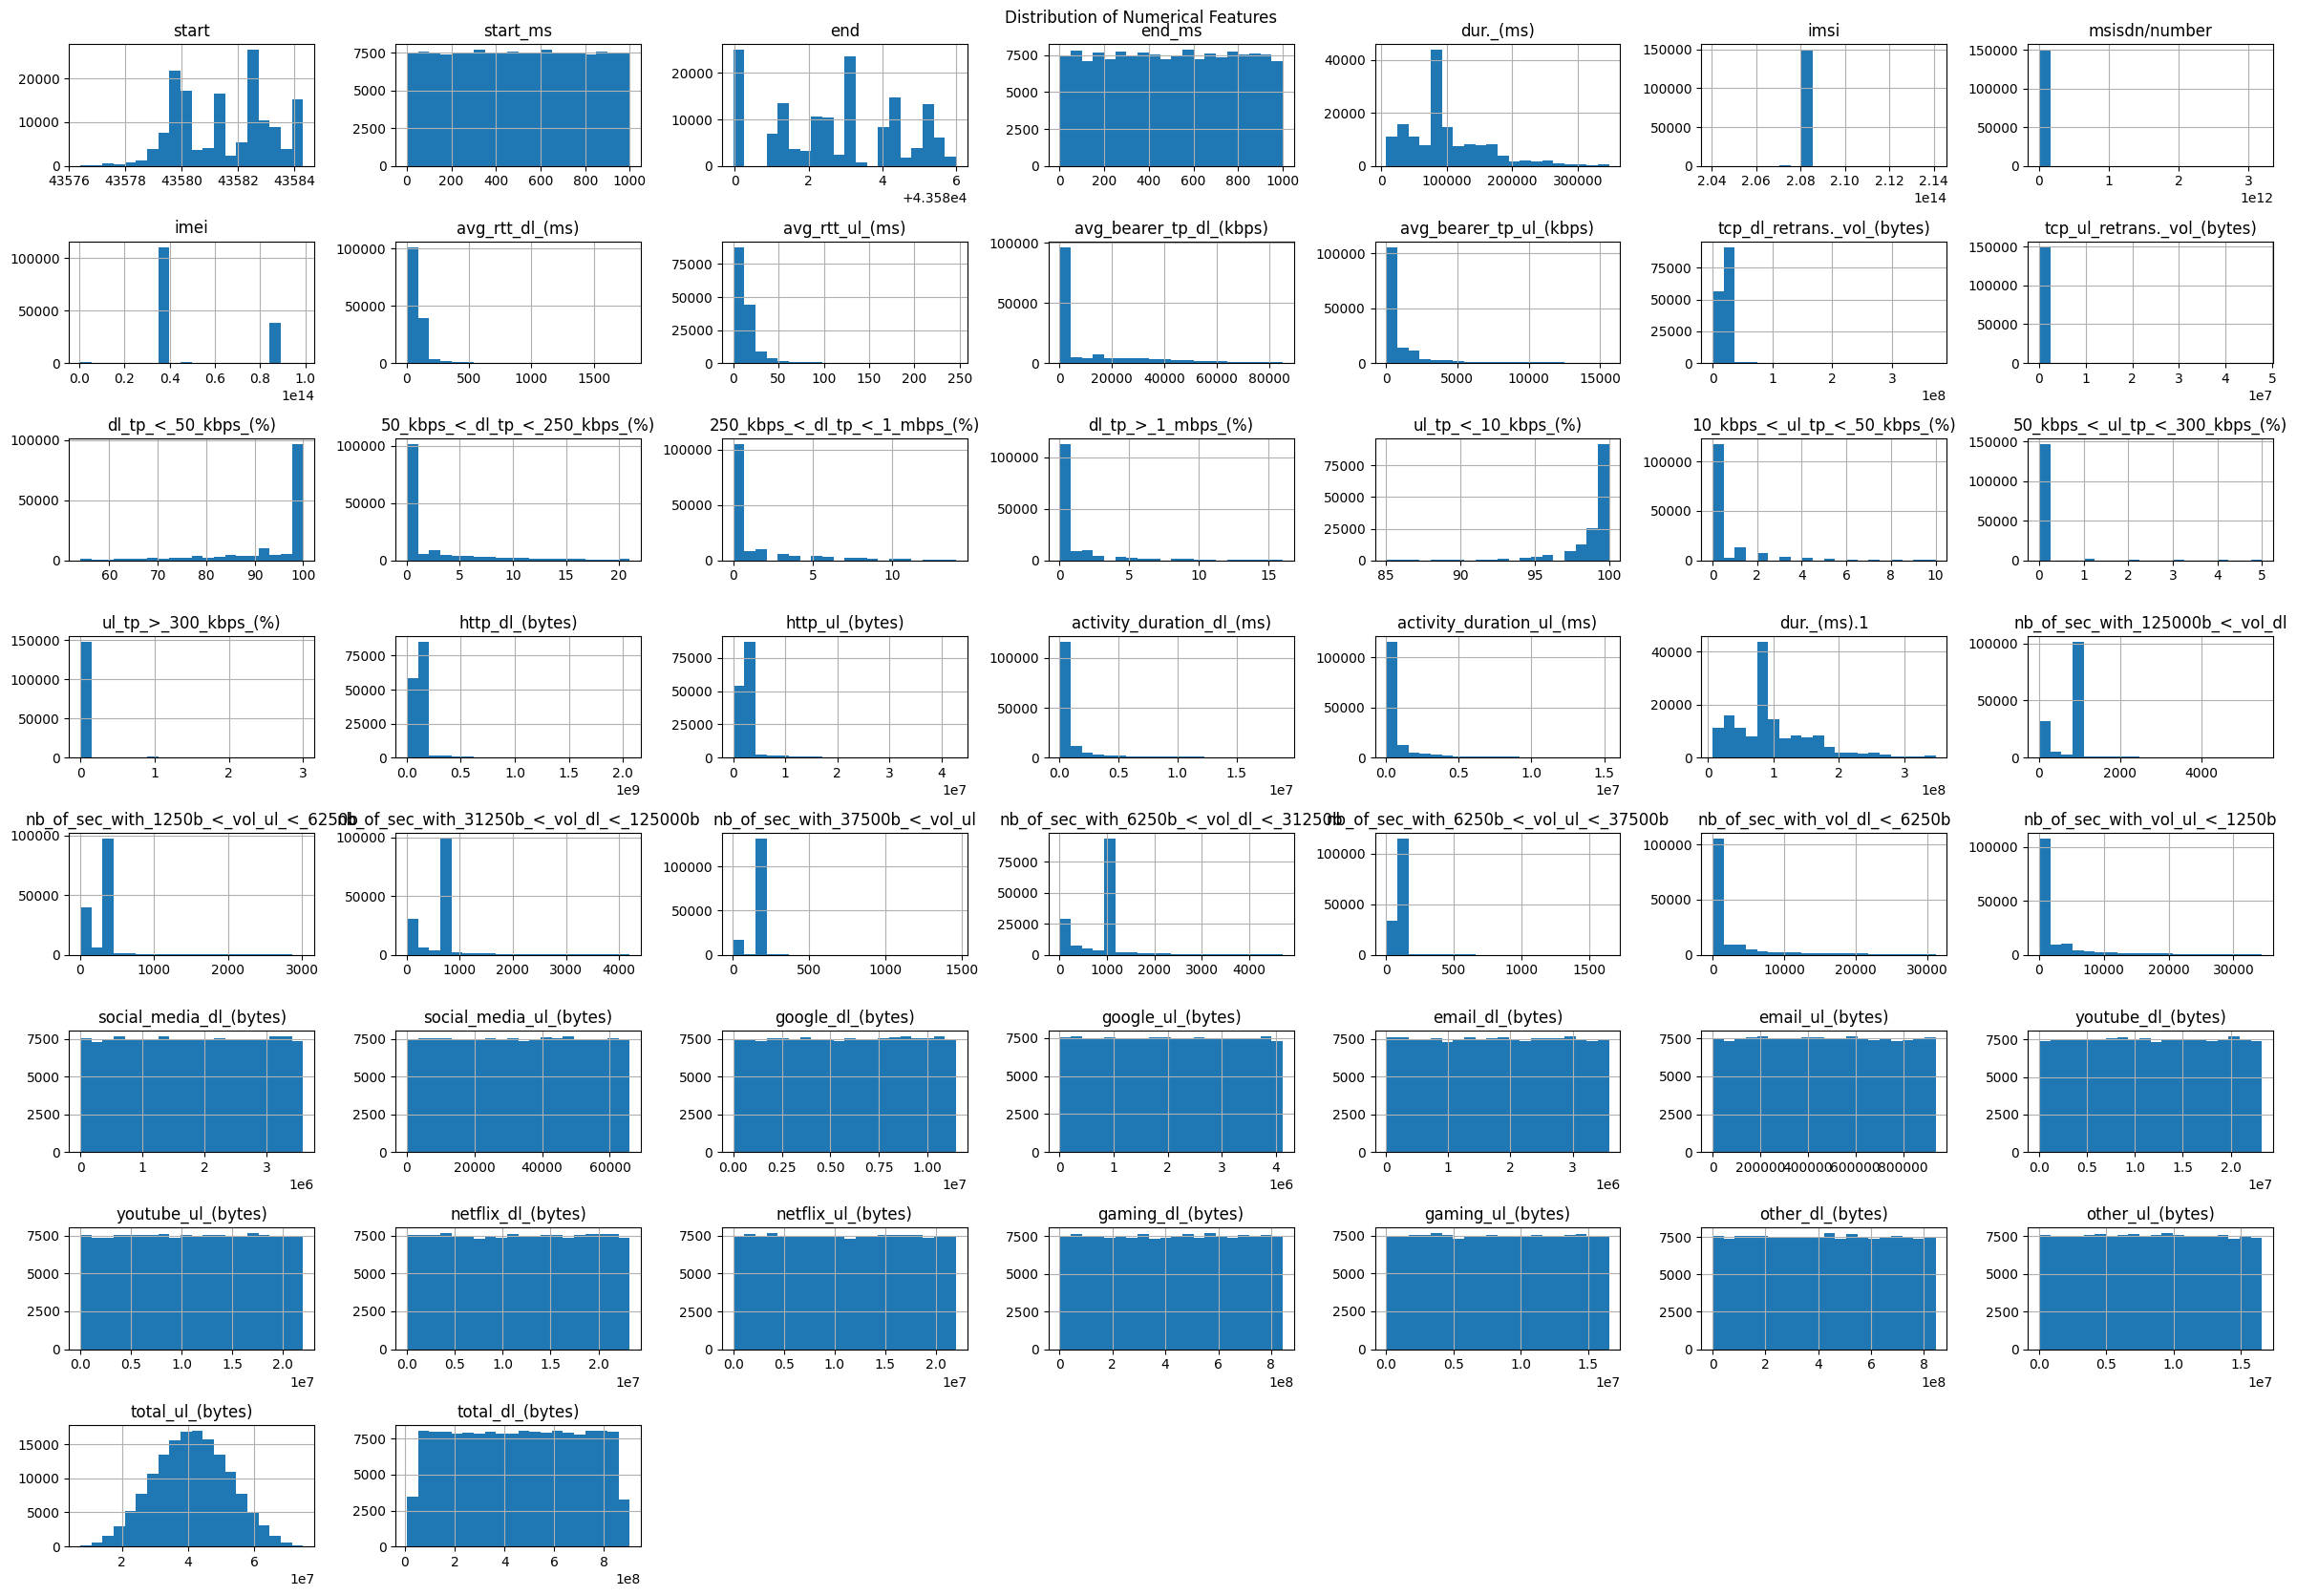

In [ ]:
# Step 5: Visualizing the data (EDA)
# Histogram for each numerical feature
Data[contnious_data_list].hist(figsize=(24, 17), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

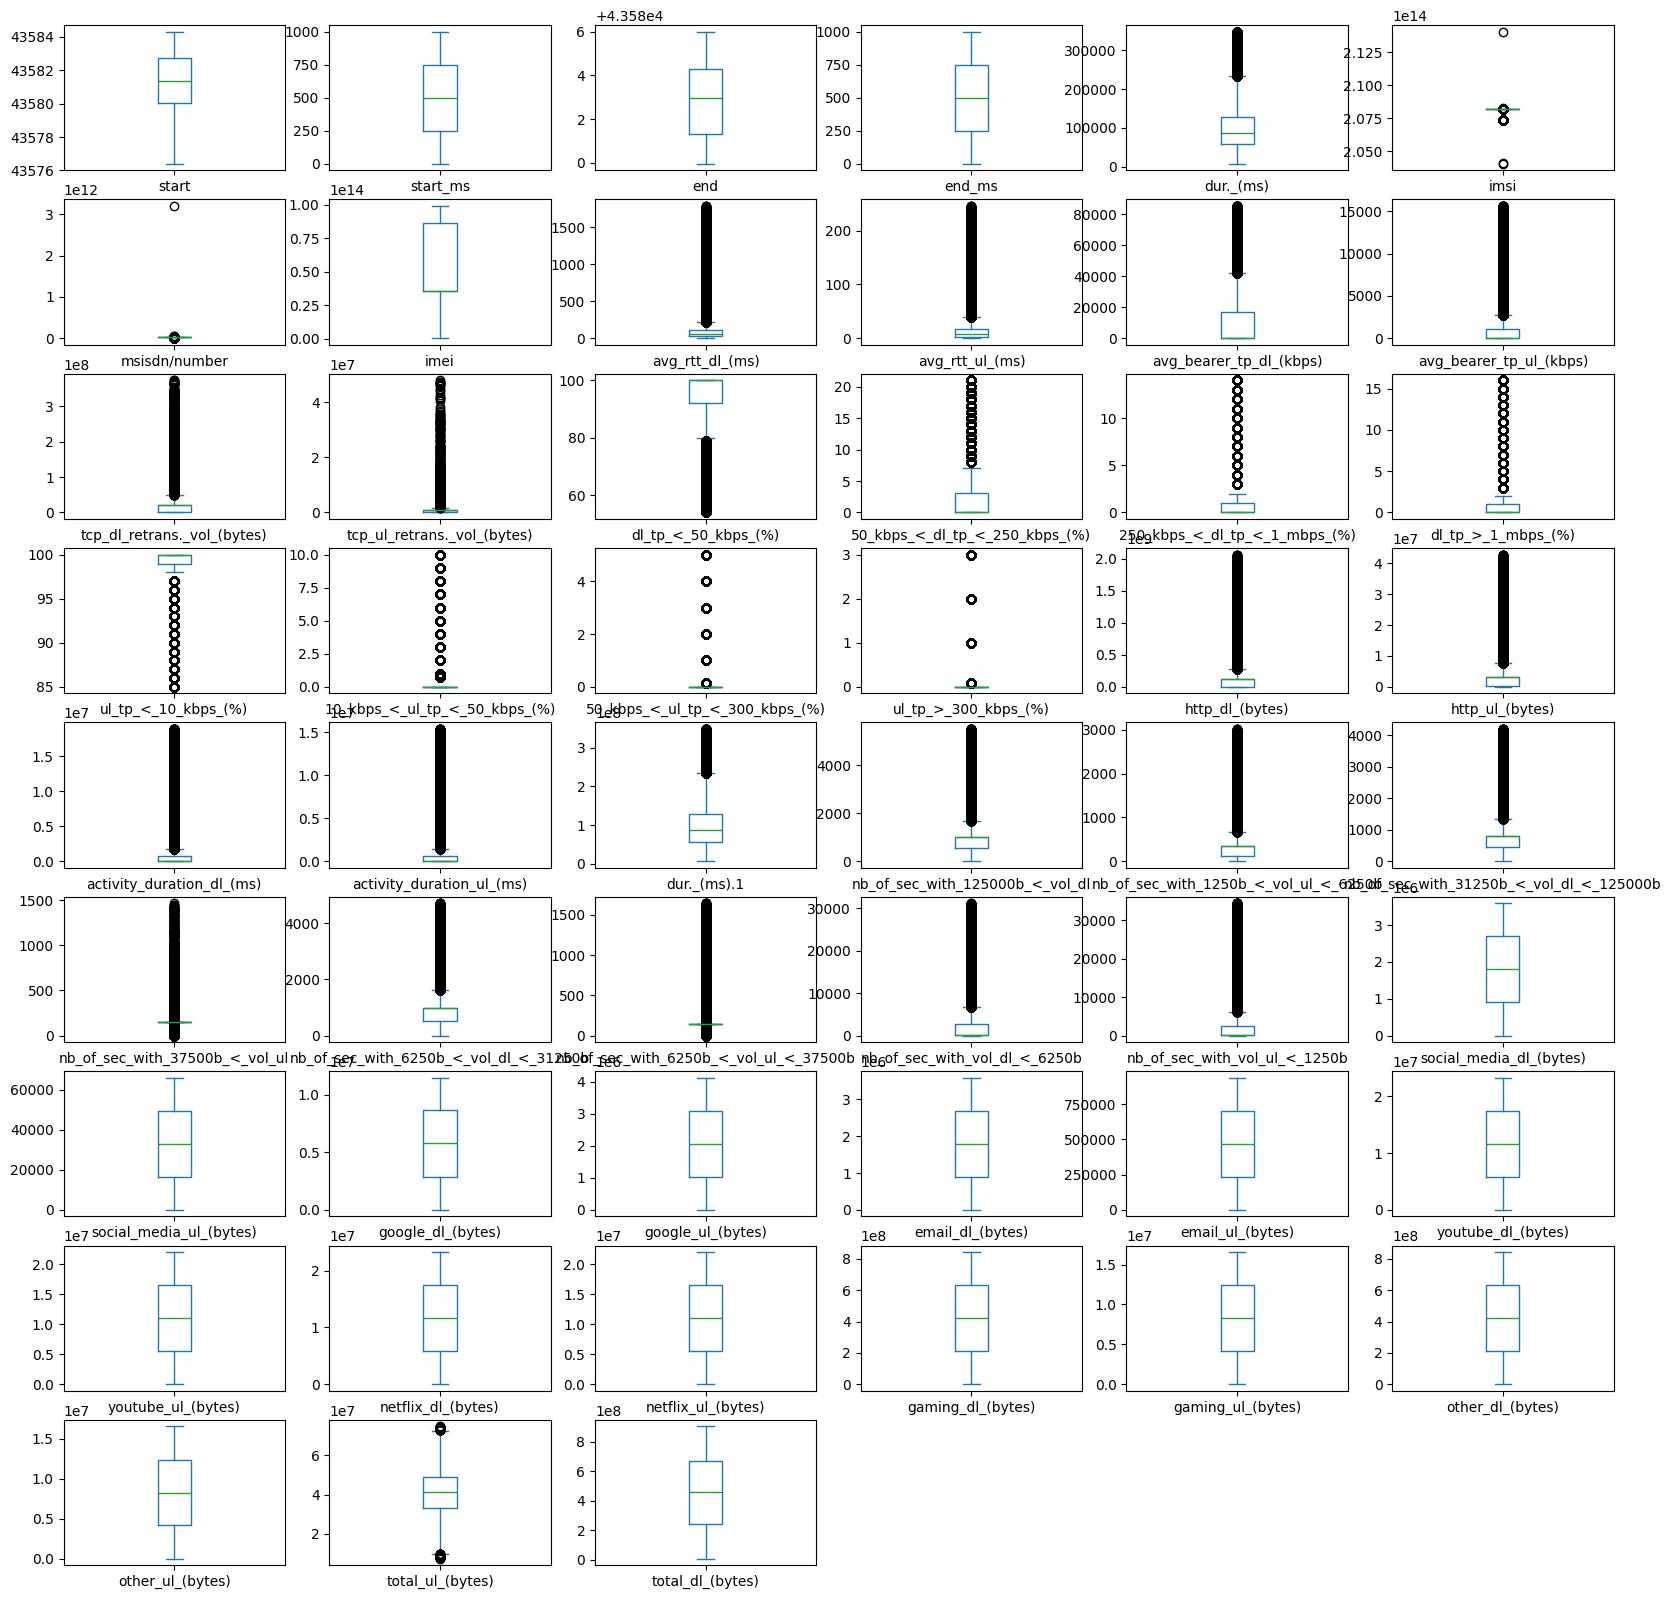

In [ ]:
Data[contnious_data_list].plot(kind='box',subplots=True ,layout=(9, 6),figsize=(20,20))
plt.show()

In [ ]:
# Calculate z-scores for the continuous columns
z_scores = Data[contnious_data_list].apply(zscore)

# Iterate over each column to handle outliers
for column in contnious_data_list:
    mean_value = Data[column].mean()
    # Replace values with z-score > 3 or < -3 with the column mean
    Data[column] = np.where(np.abs(z_scores[column]) > 2.5, mean_value, Data[column])

# Print the description of the data after treating outliers
print("\nData after treating outliers:")
print(Data.describe())


Data after treating outliers:
               start       start_ms            end         end_ms  \
count  150001.000000  150001.000000  150001.000000  150001.000000   
mean    43581.571932     499.188200   43582.736204     498.800880   
std         1.613396     288.610872       1.764054     288.096693   
min     43577.459549       0.000000   43579.958310       0.000000   
25%     43580.060822     250.000000   43581.312639     251.000000   
50%     43581.377720     499.000000   43582.959769     500.000000   
75%     43582.763171     749.000000   43584.302164     750.000000   
max     43584.311609     999.000000   43585.999618     999.000000   

           dur._(ms)          imsi  msisdn/number          imei  \
count  150001.000000  1.500010e+05   1.500010e+05  1.500010e+05   
mean    93029.318676  2.082016e+14   3.367314e+10  4.847455e+13   
std     49913.476309  1.349444e+09   5.650837e+07  2.237359e+13   
min      7142.000000  2.081986e+14   3.345647e+10  4.400152e+11   
25%     5744

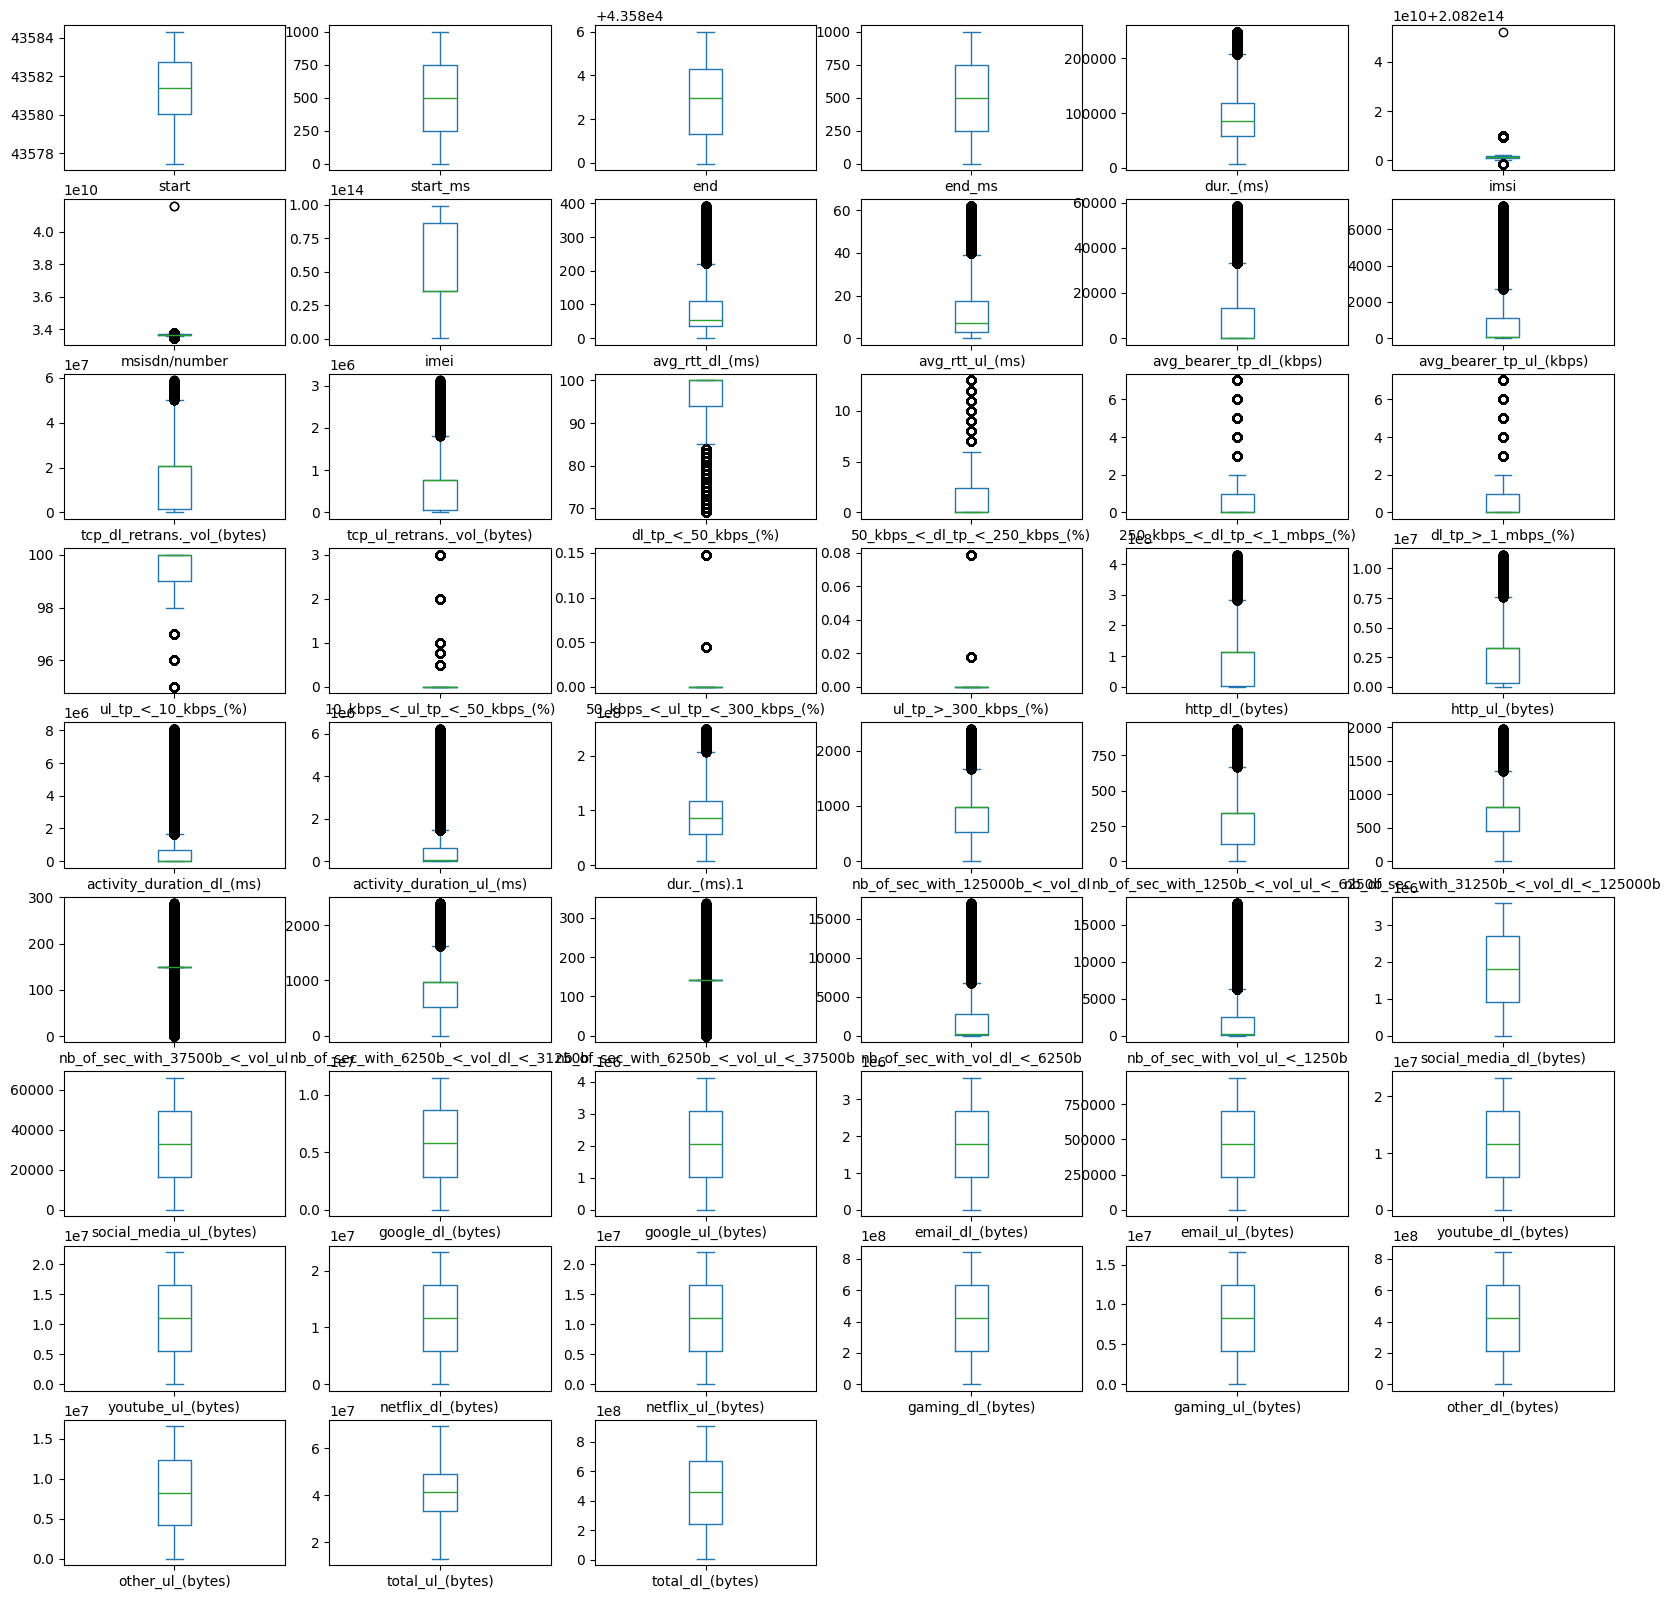

In [ ]:
Data[contnious_data_list].plot(kind='box',subplots=True ,layout=(9, 6),figsize=(20,20))
plt.show()

In [ ]:
# Example for a single column
column = contnious_data_list[0]  # Select a column for verification
original_values = Data[column].copy()  # Save original values

# Replace outliers for the column
mean_value = original_values.mean()
z_scores = zscore(original_values)
Data[column] = np.where(np.abs(z_scores) > 3, mean_value, original_values)

# Compare before and after
print("Before replacing outliers:")
print(original_values.describe())
print("After replacing outliers:")
print(Data[column].describe())


Before replacing outliers:
count    150001.000000
mean      43581.571932
std           1.613396
min       43577.459549
25%       43580.060822
50%       43581.377720
75%       43582.763171
max       43584.311609
Name: start, dtype: float64
After replacing outliers:
count    150001.000000
mean      43581.571932
std           1.613396
min       43577.459549
25%       43580.060822
50%       43581.377720
75%       43582.763171
max       43584.311609
Name: start, dtype: float64


In [ ]:
# There is no changes after applying z-score. But there is no changes in the outliers, that's why have to make two datasets with or without the outliers

In [ ]:
# Calculate z-scores for continuous variables (ensure z_scores is a DataFrame)
z_scores = Data[contnious_data_list].apply(zscore)

# Identify rows with any outlier in the continuous variables
outlier_mask = (np.abs(z_scores) > 3).any(axis=1)

# Dataset with outliers
data_with_outliers = Data.copy()

# Dataset without outliers
data_without_outliers = Data[~outlier_mask].copy()

# Print sizes of the datasets
print(f"Original dataset size: {Data.shape}")
print(f"With outliers dataset size: {data_with_outliers.shape}")
print(f"Without outliers dataset size: {data_without_outliers.shape}")

Original dataset size: (150001, 55)
With outliers dataset size: (150001, 55)
Without outliers dataset size: (109711, 55)


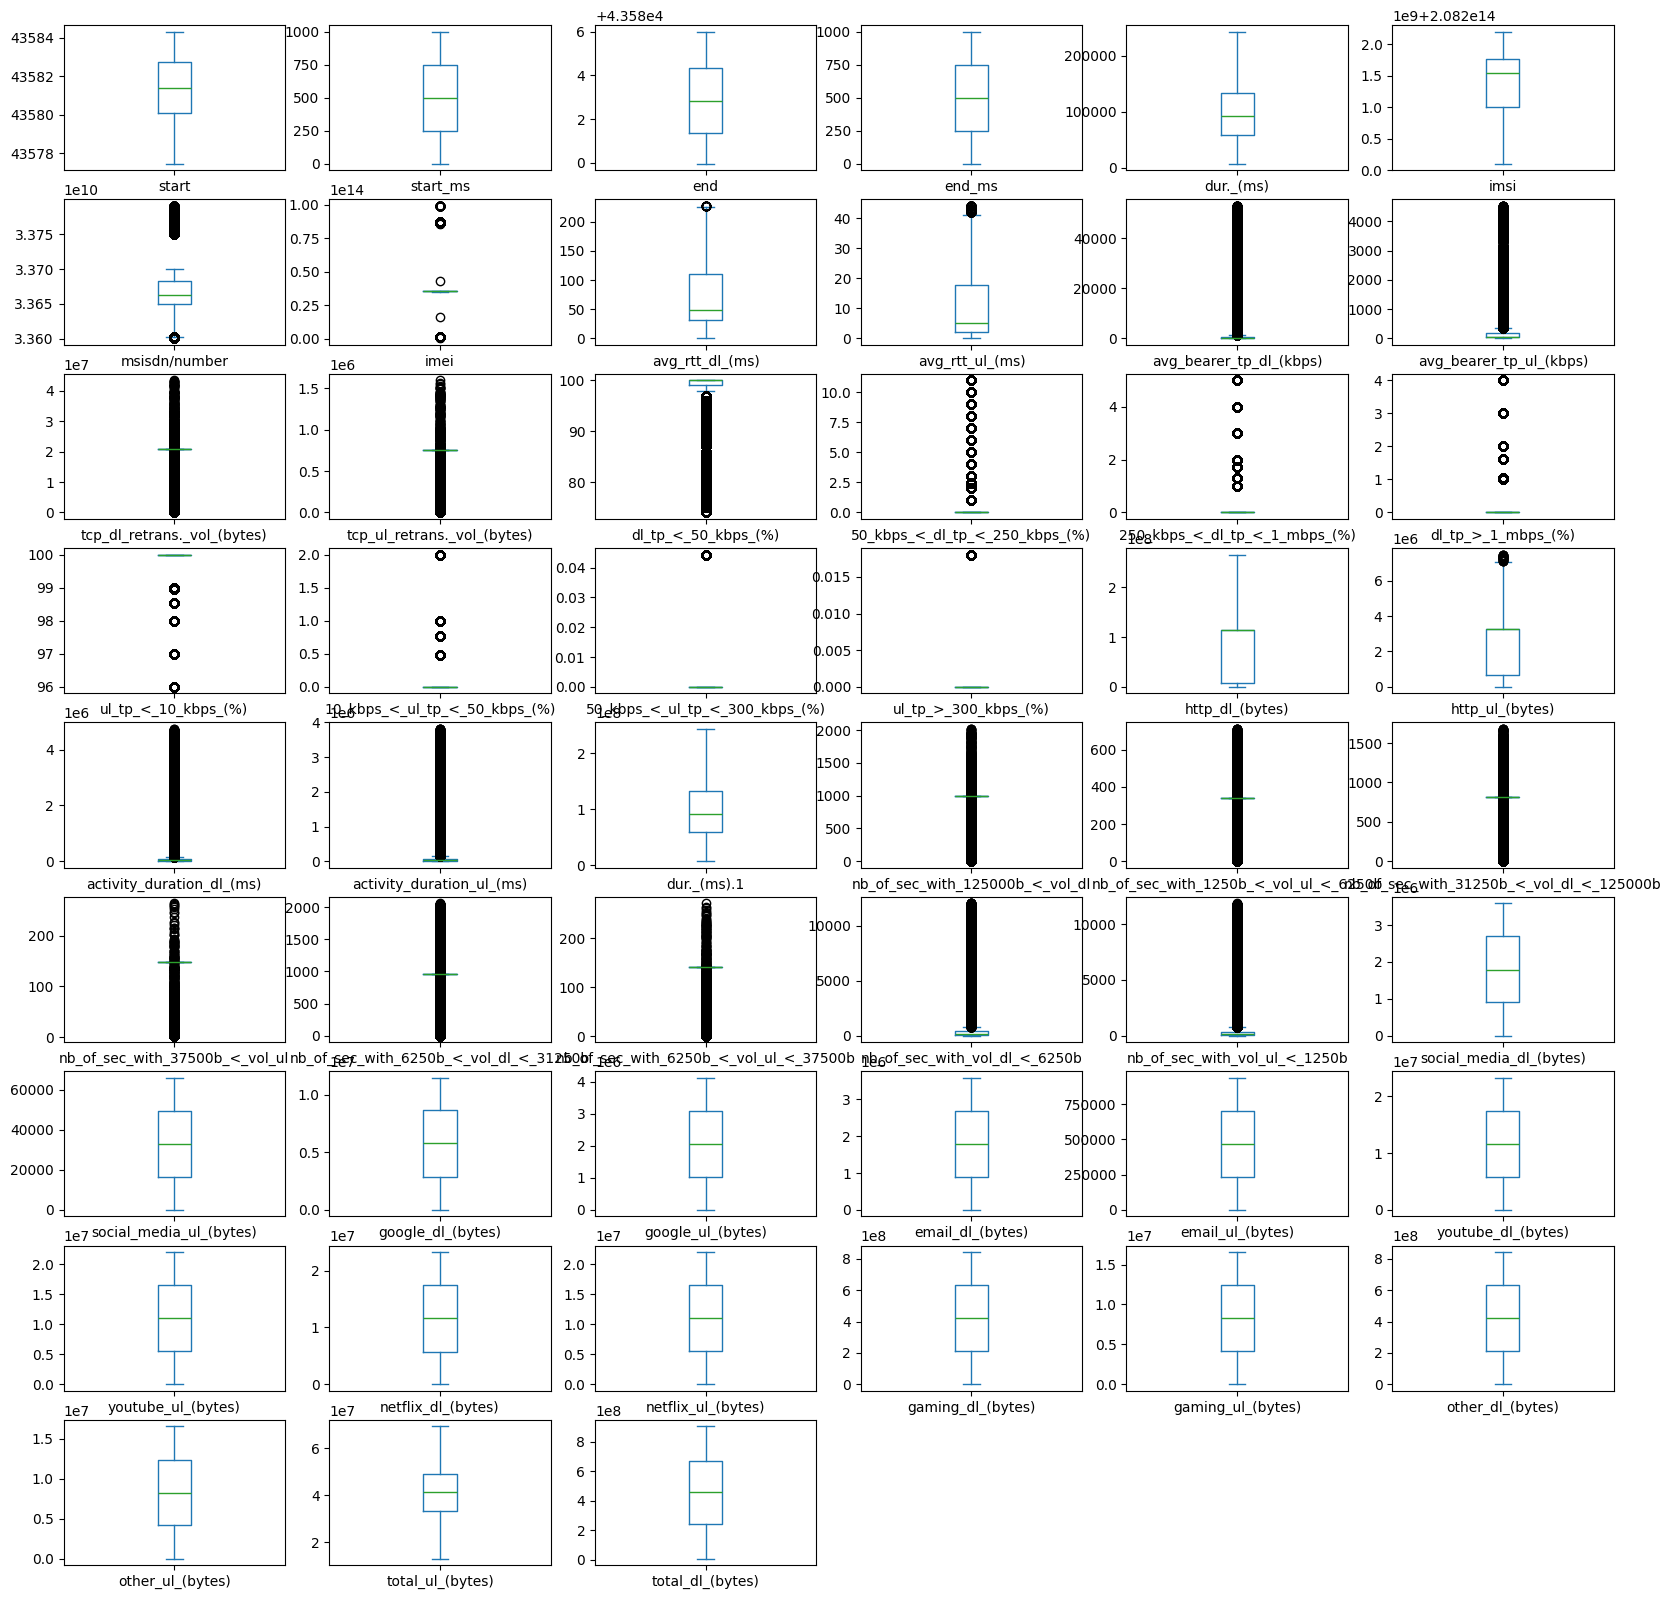

In [ ]:
data_without_outliers[contnious_data_list].plot(kind='box',subplots=True ,layout=(9, 6),figsize=(20,20))
plt.show()

In [ ]:
correlation_status = Data[contnious_data_list].corr()
correlation_status

start  start_ms       end  \
start                                     1.000000 -0.005906  0.897208   
start_ms                                 -0.005906  1.000000 -0.003488   
end                                       0.897208 -0.003488  1.000000   
end_ms                                   -0.003082  0.120945 -0.003468   
dur._(ms)                                 0.107506  0.002611  0.432309   
imsi                                      0.002830 -0.000767  0.018460   
msisdn/number                             0.007292  0.004821  0.018912   
imei                                      0.024333 -0.001130 -0.003432   
avg_rtt_dl_(ms)                           0.000761 -0.000597 -0.009775   
avg_rtt_ul_(ms)                           0.018747 -0.000924  0.007108   
avg_bearer_tp_dl_(kbps)                   0.011461 -0.001538 -0.082852   
avg_bearer_tp_ul_(kbps)                   0.023711 -0.000405 -0.059987   
tcp_dl_retrans._vol_(bytes)               0.017260  0.003603  0.146207   
tcp_ul_retrans._vol_(bytes)               0.009978  0.001061  0.119249   
dl_tp_<_50_kbps_(%)                      -0.004847  0.002431  0.098637   
50_kbps_<_dl_tp_<_250_kbps_(%)            0.005207 -0.001629 -0.097665   
250_kbps_<_dl_tp_<_1_mbps_(%)             0.011803  0.000680 -0.076917   
dl_tp_>_1_mbps_(%)                        0.015567 -0.001154 -0.059207   
ul_tp_<_10_kbps_(%)                      -0.005782  0.002473  0.099245   
10_kbps_<_ul_tp_<_50_kbps_(%)             0.007372 -0.002047 -0.067105   
50_kbps_<_ul_tp_<_300_kbps_(%)            0.009674  0.003212 -0.013245   
ul_tp_>_300_kbps_(%)                      0.008533  0.003853 -0.007245   
http_dl_(bytes)                           0.021862  0.005524  0.140423   
http_ul_(bytes)                           0.031370  0.004900  0.147488   
activity_duration_dl_(ms)                 0.034674 -0.001790 -0.025302   
activity_duration_ul_(ms)                 0.034854 -0.002652 -0.026133   
dur._(ms).1                               0.107506  0.002611  0.432310   
nb_of_sec_with_125000b_<_vol_dl           0.029178  0.002623  0.127616   
nb_of_sec_with_1250b_<_vol_ul_<_6250b     0.029889  0.001775  0.130469   
nb_of_sec_with_31250b_<_vol_dl_<_125000b  0.037472  0.004512  0.138721   
nb_of_sec_with_37500b_<_vol_ul           -0.030859  0.002218  0.022578   
nb_of_sec_with_6250b_<_vol_dl_<_31250b    0.047633  0.001345  0.142944   
nb_of_sec_with_6250b_<_vol_ul_<_37500b   -0.016265  0.000544  0.063652   
nb_of_sec_with_vol_dl_<_6250b             0.038498 -0.003205 -0.018748   
nb_of_sec_with_vol_ul_<_1250b             0.037148 -0.003160 -0.024659   
social_media_dl_(bytes)                  -0.000752  0.001262 -0.002635   
social_media_ul_(bytes)                   0.001587  0.000385  0.001032   
google_dl_(bytes)                        -0.002793  0.002274 -0.001629   
google_ul_(bytes)                         0.001162  0.000722  0.000097   
email_dl_(bytes)                          0.002760  0.001144  0.002842   
email_ul_(bytes)                          0.001637 -0.001176  0.002742   
youtube_dl_(bytes)                        0.004149 -0.001582  0.004242   
youtube_ul_(bytes)                        0.002476  0.001238  0.003192   
netflix_dl_(bytes)                       -0.000010 -0.002593 -0.001803   
netflix_ul_(bytes)                        0.004464 -0.002334  0.001435   
gaming_dl_(bytes)                        -0.000151 -0.004229  0.000257   
gaming_ul_(bytes)                         0.002898 -0.002512  0.004021   
other_dl_(bytes)                          0.004607 -0.003687  0.005043   
other_ul_(bytes)                         -0.000369  0.003803  0.000063   
total_ul_(bytes)                          0.004535 -0.000472  0.003719   
total_dl_(bytes)                         -0.000066 -0.004299  0.000302   

                                            end_ms  dur._(ms)      imsi  \
start                                    -0.003082   0.107506  0.002830   
start_ms                                  0.12

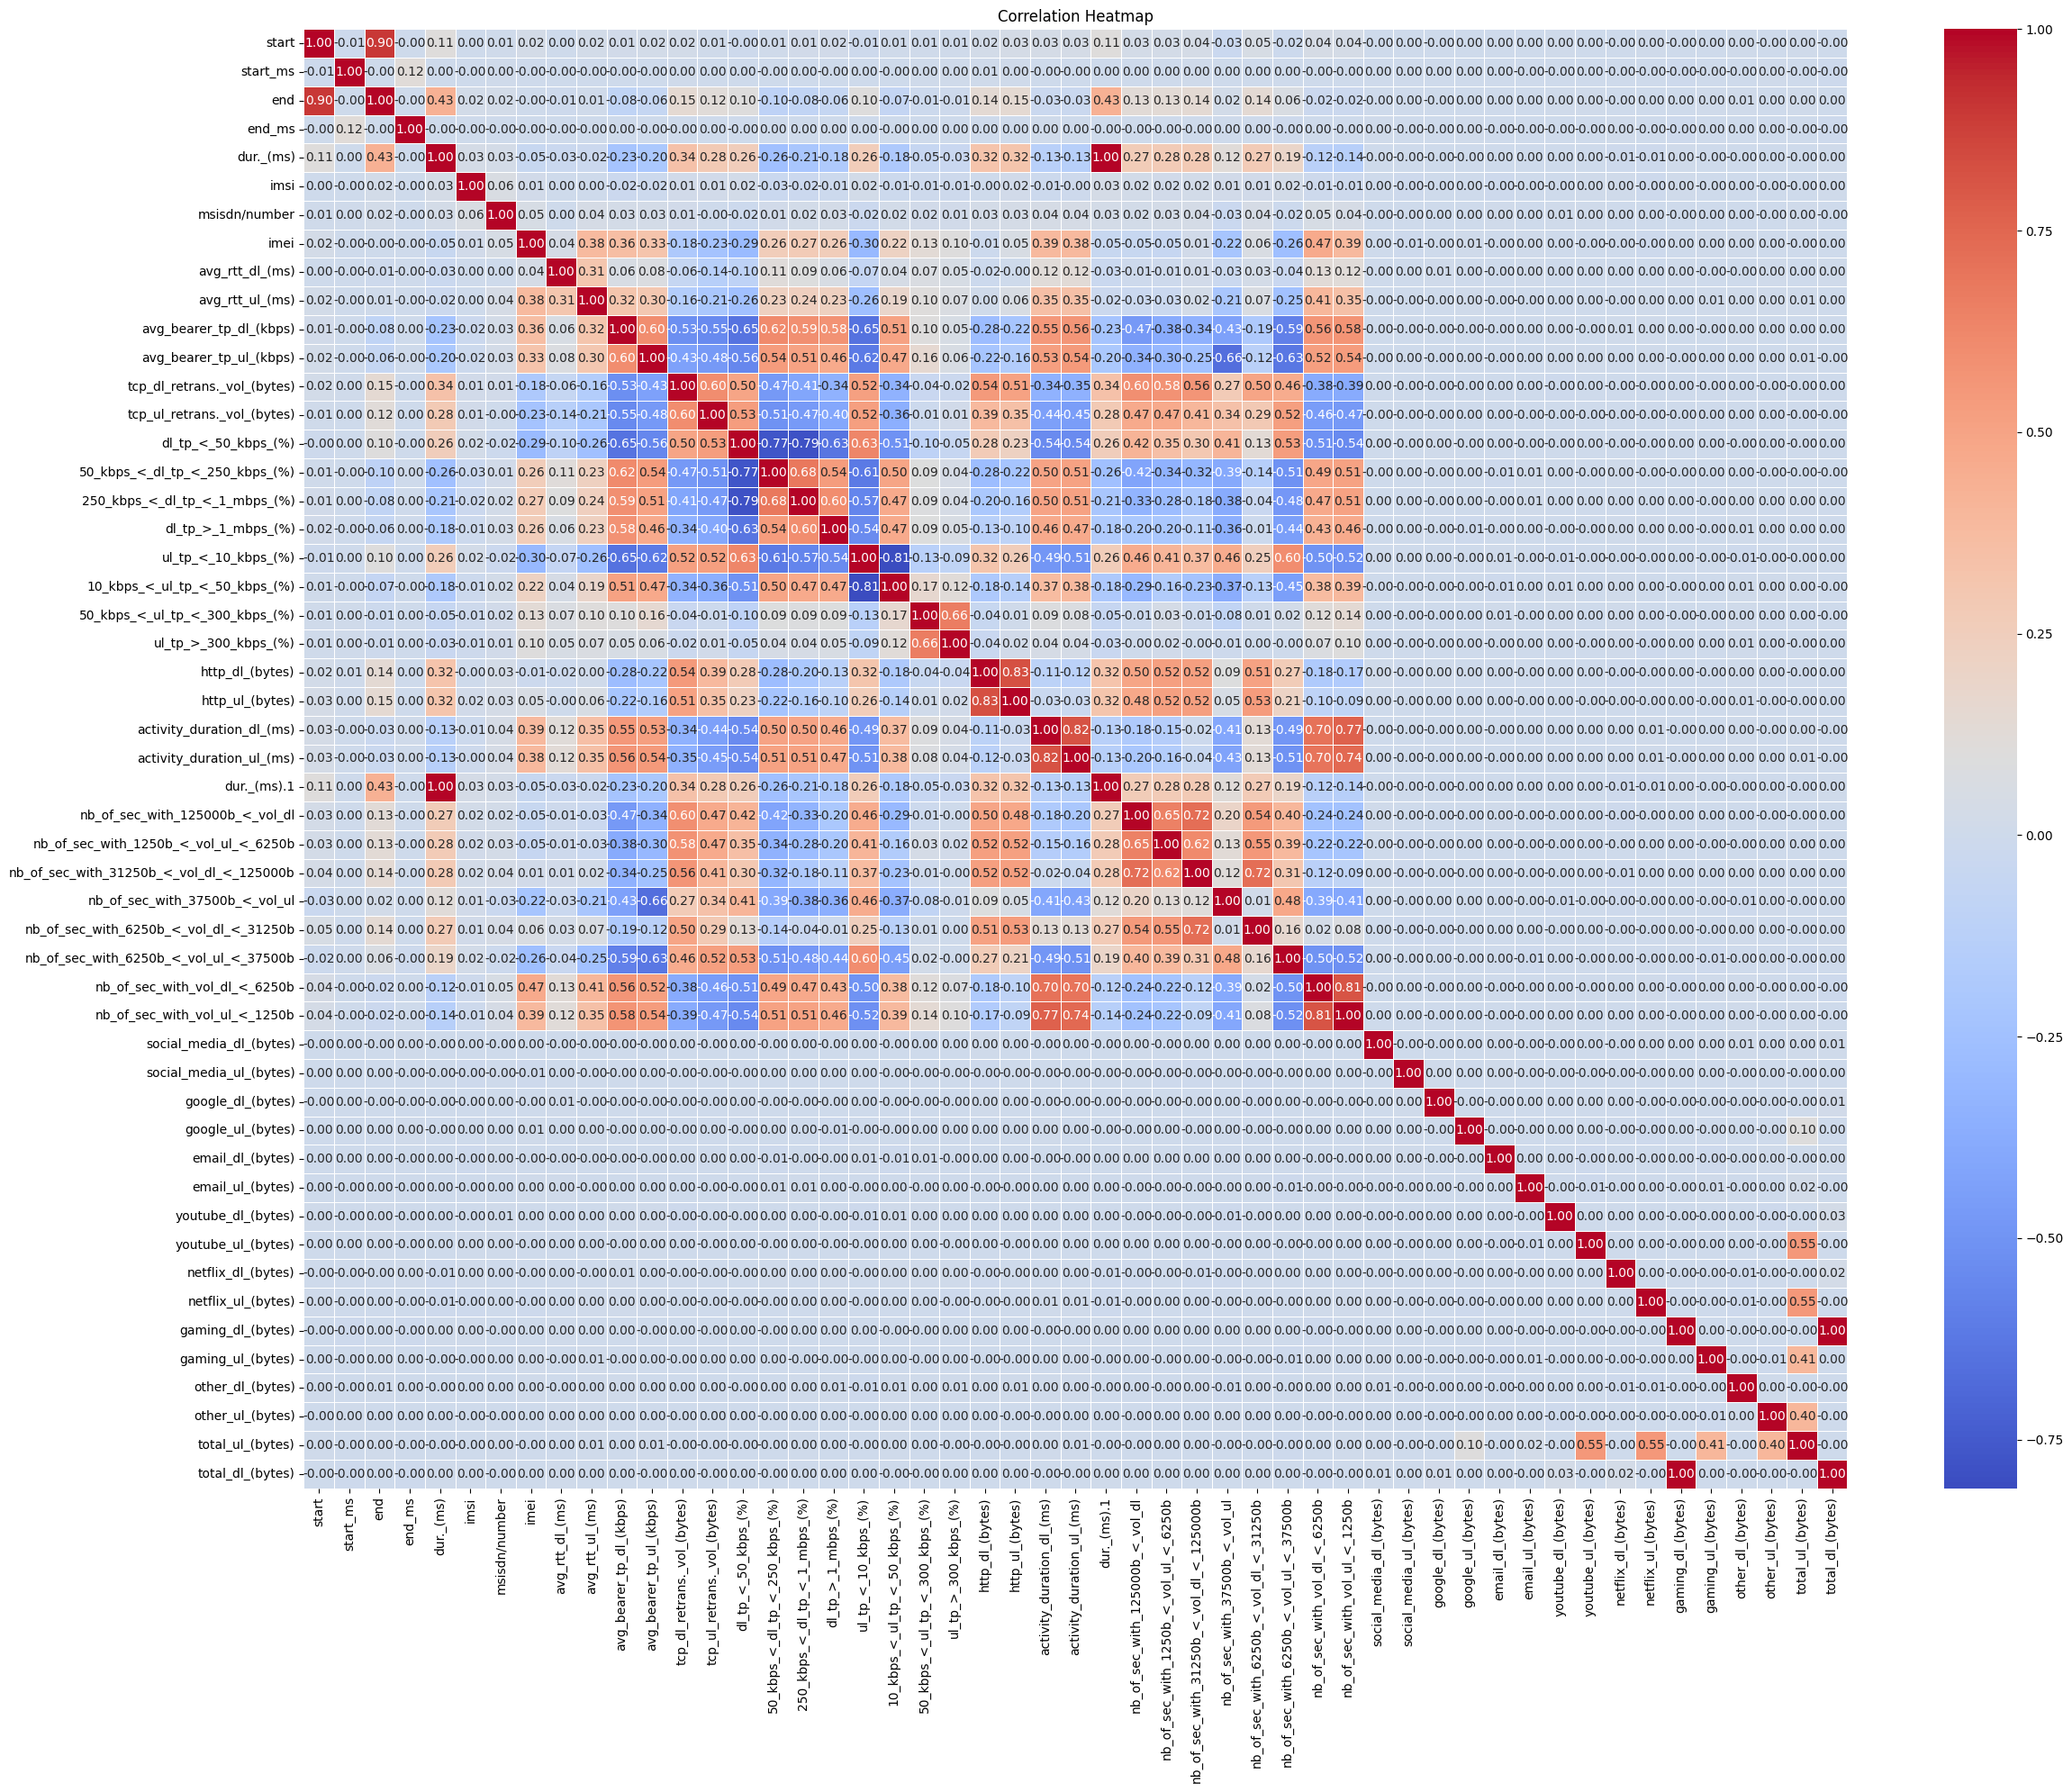

In [ ]:
# Correlation heatmap to identify relationships between variables
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_status, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
threshold = 0.8
# Unstack the correlation matrix to get pairs of columns
correlation_pairs = correlation_status.unstack()
# Filter pairs to find those with correlation above the threshold (ignoring self-correlation)
high_correlation = correlation_pairs[(correlation_pairs.abs() > threshold) & (correlation_pairs != 1.0)]

# Display highly correlated pairs
print("Highly Correlated Pairs:")
print(high_correlation.sort_values(ascending=False))

Highly Correlated Pairs:
dur._(ms)                      dur._(ms).1                      1.000000
dur._(ms).1                    dur._(ms)                        1.000000
gaming_dl_(bytes)              total_dl_(bytes)                 0.999131
total_dl_(bytes)               gaming_dl_(bytes)                0.999131
start                          end                              0.897208
end                            start                            0.897208
http_dl_(bytes)                http_ul_(bytes)                  0.827253
http_ul_(bytes)                http_dl_(bytes)                  0.827253
activity_duration_dl_(ms)      activity_duration_ul_(ms)        0.819907
activity_duration_ul_(ms)      activity_duration_dl_(ms)        0.819907
nb_of_sec_with_vol_dl_<_6250b  nb_of_sec_with_vol_ul_<_1250b    0.813374
nb_of_sec_with_vol_ul_<_1250b  nb_of_sec_with_vol_dl_<_6250b    0.813374
ul_tp_<_10_kbps_(%)            10_kbps_<_ul_tp_<_50_kbps_(%)   -0.810117
10_kbps_<_ul_tp_<_50_kbps_

In [ ]:
# # Step 6: Extracting useful insights

# # For example, examining the relationship between 'num_xdr_session' and 'total_data_volume'
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='bearer_id', y='total_dl_(bytes)', data=Data)
# plt.title('Number of Sessions vs Total Data Volume')
# plt.xlabel('Number of Sessions')
# plt.ylabel('Total Data Volume')
# plt.tight_layout()
# plt.show()

# # Analyzing the mean total data volume by user (msisdn/number)
# mean_data_volume_per_user = Data.groupby('msisdn/number')['total_data_volume'].mean()
# print("\nMean Total Data Volume per User:")
# print(mean_data_volume_per_user.head())

# # Insights from analysis:
# # 1. High correlation between 'num_xdr_session' and 'total_data_volume' indicates that more sessions lead to higher data usage.
# # 2. Outliers in total download and upload data could affect the overall data volume.
# # 3. Identifying power users who consume significant data can help in marketing or network optimization.

In [ ]:
# Bivariate Analysis: Relationship Between Applications and Total Data Usage (DL+UL)

In [ ]:
Data['total_data_usage'] = Data['total_dl_(bytes)'] + Data['total_ul_(bytes)']

In [ ]:
application_columns = [
    'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
    'google_dl_(bytes)', 'google_ul_(bytes)',
    'email_dl_(bytes)', 'email_ul_(bytes)',
    'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
    'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
    'gaming_dl_(bytes)', 'gaming_ul_(bytes)',
    'other_dl_(bytes)', 'other_ul_(bytes)'
]

In [ ]:
for column in application_columns:
    base_name = column.rsplit('_', 1)[0]  # Extract the base name
    Data[f'{base_name}_total'] = Data[f'{base_name}_(bytes)'] + Data[f'{base_name}_(bytes)']
    print(f"{base_name} : {Data[f'{base_name}_total']}")

social_media_dl : 0         3.091530e+06
1         3.852226e+06
2         3.368106e+06
3         1.288242e+06
4         1.725200e+06
              ...     
149996    6.929948e+06
149997    4.689136e+06
149998    2.491690e+06
149999    1.603094e+06
150000    3.590644e+06
Name: social_media_dl_total, Length: 150001, dtype: float64
social_media_ul : 0          48840.00000
1          14330.00000
2          84448.00000
3          26744.00000
4         100376.00000
              ...     
149996    104182.00000
149997     15226.00000
149998     28788.00000
149999     43124.00000
150000     65856.86876
Name: social_media_ul_total, Length: 150001, dtype: float64
google_dl : 0         3.268958e+06
1         6.987848e+06
2         1.707011e+07
3         1.804747e+07
4         1.249657e+07
              ...     
149996    1.993521e+07
149997    4.458840e+06
149998    7.701780e+06
149999    8.379546e+06
150000    1.150151e+07
Name: google_dl_total, Length: 150001, dtype: float64
google_ul : 0      

In [ ]:
correlation_matrix = Data[['total_data_usage'] + [f'{col.rsplit("_", 1)[0]}_total' for col in application_columns]].corr()
print(correlation_matrix['total_data_usage'].sort_values(ascending=False))

total_data_usage         1.000000
gaming_dl_total          0.998126
youtube_dl_total         0.025640
netflix_dl_total         0.024315
netflix_ul_total         0.023673
youtube_ul_total         0.022443
gaming_ul_total          0.019270
other_ul_total           0.016789
google_dl_total          0.012106
google_ul_total          0.005396
social_media_dl_total    0.005383
email_dl_total           0.004281
social_media_ul_total    0.000188
email_ul_total          -0.001591
other_dl_total          -0.002814
Name: total_data_usage, dtype: float64


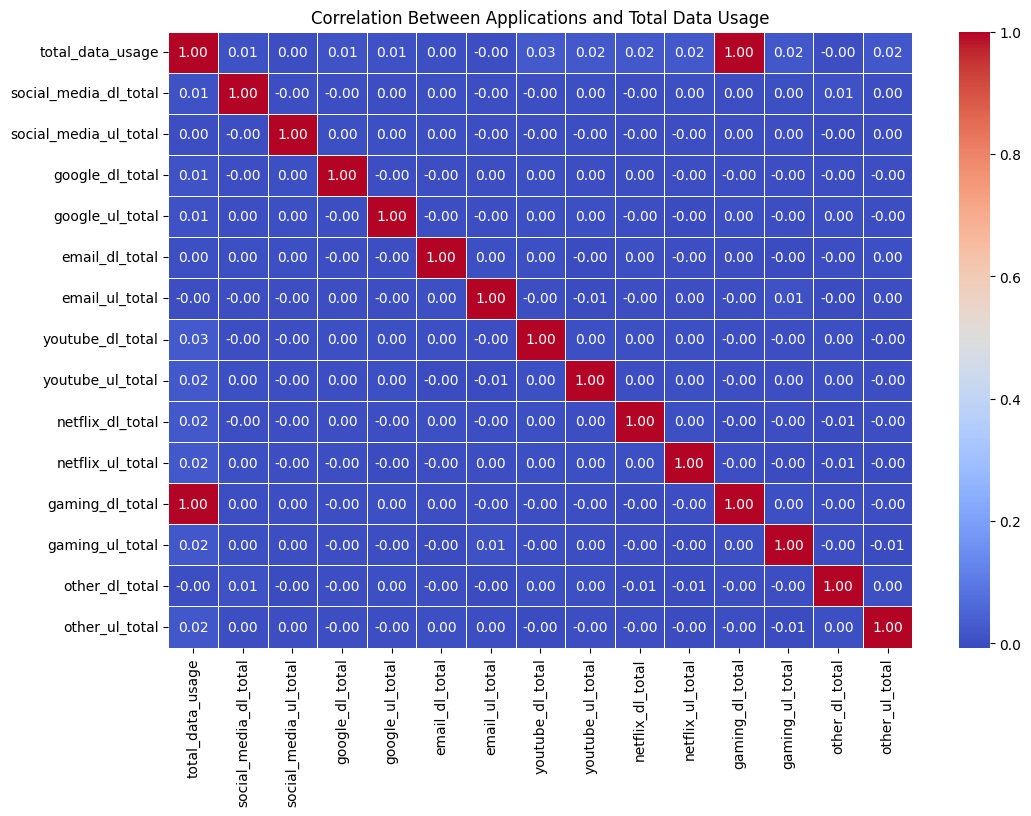

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Applications and Total Data Usage')
plt.show()

- Correlation of 0.998, which is extremely high. This suggests that gaming download data is nearly identical to the total data usage. It's likely that gaming data usage is a major contributor to the overall data usage.
- youtube_dl_total, netflix_dl_total, netflix_ul_total, etc.: The correlations for these columns are quite low (all below 0.03), indicating that YouTube and Netflix download and upload data contribute minimally to the overall data usage. This could suggest that these platforms may not be the primary drivers of total data consumption in your dataset.
- email_ul_total has a negative correlation of -0.0016 with total_data_usage. This is very close to zero, meaning there is effectively no relationship between email upload data and total data usage.
- Many other application columns, such as social_media_dl_total, google_dl_total, and other_dl_total, also show very low or no correlation with total data usage.

In [ ]:
Data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


Variable Transformations: Segment users into top five decile classes based on total
session duration and compute total DL+UL data per decile.

In [ ]:
# Calculate Total Data Usage (DL + UL)
Data['total_data_usage'] = Data['total_dl_(bytes)'] + Data['total_ul_(bytes)']

In [ ]:
# pd.qcut() function to divide users into 5 deciles based on the total session duration.
# Segment users into 5 deciles based on total session duration
Data['session_duration_decile'] = pd.qcut(Data['dur._(ms)'], q=5, labels=False)


In [ ]:
# Compute Total DL+UL data per decile
decile_data = Data.groupby('session_duration_decile')['total_data_usage'].sum().reset_index()

In [ ]:
# Print the results
print(decile_data)

   session_duration_decile  total_data_usage
0                        0      1.488424e+13
1                        1      2.361896e+13
2                        2      6.089197e+12
3                        3      1.482077e+13
4                        4      1.495088e+13


- Decile 0: Represents the group of users with the lowest session duration.
- Decile 1: Represents the next 20% of users, and so on, with Decile 4 representing the group with the highest session duration.

- Deciles 0, 3, and 4 have similar total data usage, which indicates that the users in these deciles are consuming relatively high amounts of data.
These could represent users who spend longer times on the network, consuming more data over time (either through high download/upload volume or frequent session usage).

- Decile 2, which represents users with average session durations, has a significantly lower total data usage (6.089197e+12 bytes, or around 6.08 TB).
This suggests that users in the middle decile are either using the network less frequently or consuming less data per session compared to those in the highest and lowest deciles.

- The lowest decile (0) has higher data usage than the middle decile (2), which could indicate that the users in decile 0 (with shorter sessions) are consuming more data per session, or they might be frequent data-consuming activities (such as video streaming, gaming, etc.).

- Decile 1 and 4, being adjacent to decile 2, are expected to show either stable or growing data usage patterns, indicating that there could be a more steady increase in data consumption with higher session times.

In [ ]:
# Relationship between handseet manufacture and the Total Data Usage of them

In [ ]:
manufacture_and_data_usage = Data.groupby('handset_manufacturer').agg({'total_data_usage':'mean'}).reset_index()

In [ ]:
manufacture_and_data_usage

handset_manufacturer  total_data_usage
0    A-Link Telecom International Co Limited      5.132494e+08
1                                    ASUSTeK      4.835174e+08
2                                       Acer      4.653347e+08
3                                       Adar      6.624049e+08
4                        Alif Communications      8.800039e+08
..                                       ...               ...
166                 Zebra Technologies Corp.      4.525056e+08
167                                      Zte      4.806614e+08
168                ZyXEL Communications Corp      1.088302e+08
169                Zyxel Communications Corp      6.525042e+08
170                                undefined      5.006113e+08

[171 rows x 2 columns]

In [ ]:
# prompt: Using dataframe manufacture_and_data_usage: plot of manufacturer and its data usage

import altair as alt

alt.Chart(manufacture_and_data_usage).mark_bar().encode(
    x='handset_manufacturer',
    y='total_data_usage'
).properties(width=1000)


alt.Chart(...)

In [ ]:
# # Contingency table
# contingency = pd.crosstab(Data['handset_manufacturer'], Data['last_location_name'])

# # Heatmap of the contingency table
# sns.heatmap(contingency, annot=True, fmt='d', cmap='coolwarm')
# plt.title("Heatmap of Manufacturer vs Location")
# plt.show()

# # Stacked bar plot
# contingency.plot(kind='bar', stacked=True)
# plt.title("Stacked Bar Chart of Manufacturer vs Location")
# plt.show()

In [ ]:
handset_manufacturer_and_type = Data.groupby('handset_manufacturer').agg({'handset_type':'count'}).reset_index()

In [ ]:
handset_manufacturer_and_type

handset_manufacturer  handset_type
0    A-Link Telecom International Co Limited             8
1                                    ASUSTeK            23
2                                       Acer            14
3                                       Adar             1
4                        Alif Communications             1
..                                       ...           ...
166                 Zebra Technologies Corp.            14
167                                      Zte           191
168                ZyXEL Communications Corp             1
169                Zyxel Communications Corp             2
170                                undefined          8987

[171 rows x 2 columns]

In [ ]:
handset_manufacturer_and_type = Data.groupby('handset_manufacturer')['handset_type'].nunique().reset_index()
handset_manufacturer_and_type.columns = ['handset_manufacturer', 'unique_handset_types']

In [ ]:
handset_manufacturer_and_type

handset_manufacturer  unique_handset_types
0    A-Link Telecom International Co Limited                     7
1                                    ASUSTeK                     7
2                                       Acer                     9
3                                       Adar                     1
4                        Alif Communications                     1
..                                       ...                   ...
166                 Zebra Technologies Corp.                     4
167                                      Zte                    15
168                ZyXEL Communications Corp                     1
169                Zyxel Communications Corp                     2
170                                undefined                     1

[171 rows x 2 columns]

Dimensionality Reduction:

In [ ]:
# Standardize the Data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(Data[contnious_data_list])

Perform PCA

In [ ]:
# Reduse the Data to 2 Dimension for better visualization
# perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaler)

In [ ]:
# Create a Dataframe for PCA transformed Data
pca_df = pd.DataFrame(data=x_pca, columns=['PC1','PC2'])

In [ ]:
pca_df

PC1       PC2
0       2.539144  0.005064
1       2.415972  0.111665
2       2.287107  0.364332
3       2.354668  0.320291
4       2.317184  0.319122
...          ...       ...
149996  2.614418  0.290942
149997  2.712836  0.472667
149998  2.664316  0.513360
149999  2.410131  0.886925
150000 -1.332956  2.873612

[150001 rows x 2 columns]

In [ ]:
# Explained Variance ration
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance ratio by PC1 and PC2 : {explained_variance}")

Explained Variance ratio by PC1 and PC2 : [0.20165839 0.08071679]


In [ ]:
# Extract loading to see how features contributes to PC1 and PC2
# Get Feature Contribution

loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index= contnious_data_list)

print(f"Feature Contribution (loadings) : {loadings}")

Feature Contribution (loadings) :                                                PC1       PC2
start                                     0.004342  0.095370
start_ms                                  0.001069  0.001318
end                                       0.051550  0.155559
end_ms                                   -0.000213  0.000097
dur._(ms)                                 0.122795  0.204858
imsi                                      0.008006  0.010615
msisdn/number                            -0.006690  0.045236
imei                                     -0.123785  0.174586
avg_rtt_dl_(ms)                          -0.038865  0.058003
avg_rtt_ul_(ms)                          -0.110852  0.173060
avg_bearer_tp_dl_(kbps)                  -0.252103  0.048994
avg_bearer_tp_ul_(kbps)                  -0.231992  0.089238
tcp_dl_retrans._vol_(bytes)               0.221180  0.179862
tcp_ul_retrans._vol_(bytes)               0.225037  0.062023
dl_tp_<_50_kbps_(%)                       0.251117 

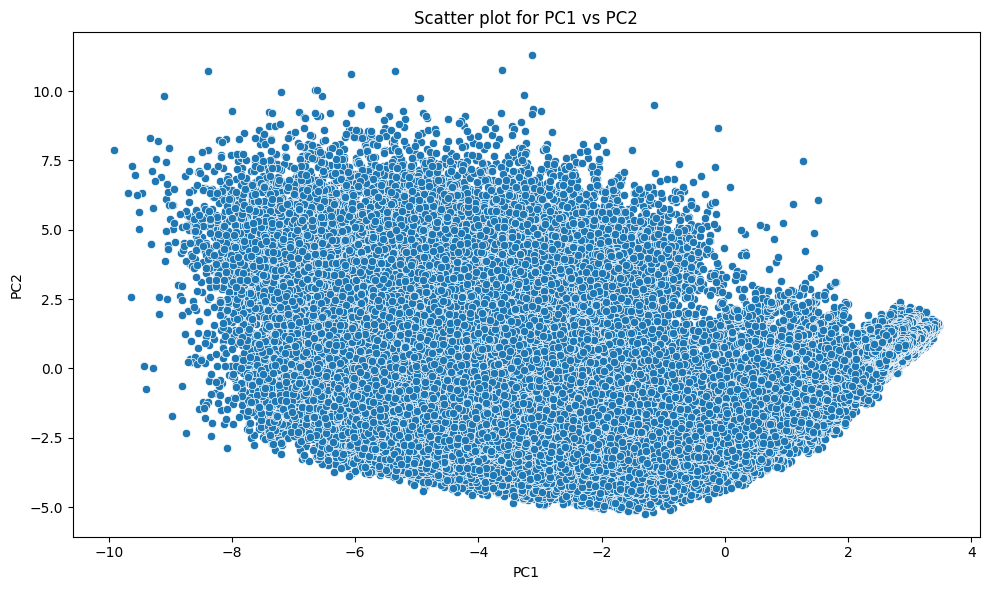

In [ ]:
# Scatter plot for PC1 vs PC2

plt.figure(figsize = (10,6))
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'])
plt.title('Scatter plot for PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

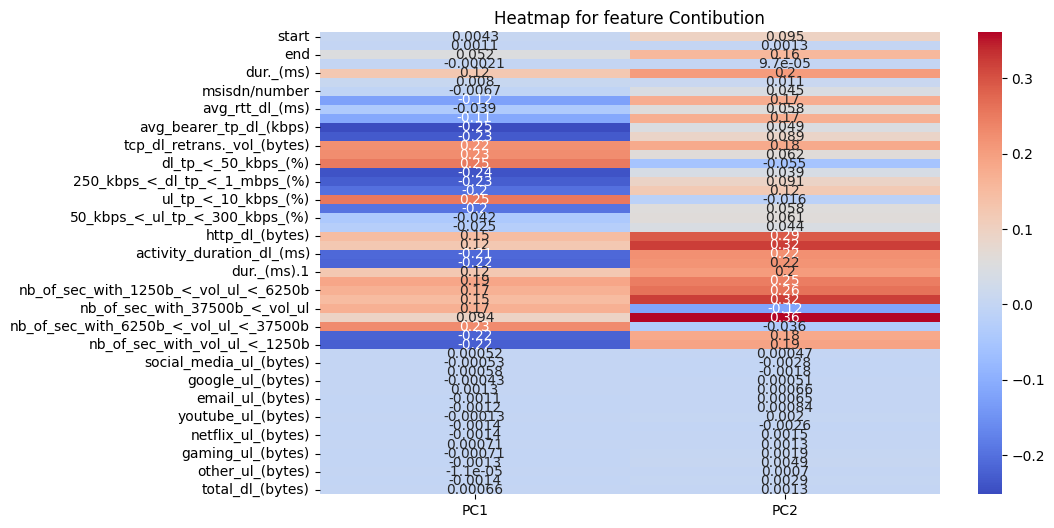

In [ ]:
# Heat amp for feature contribution
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Heatmap for feature Contibution')
plt.show()

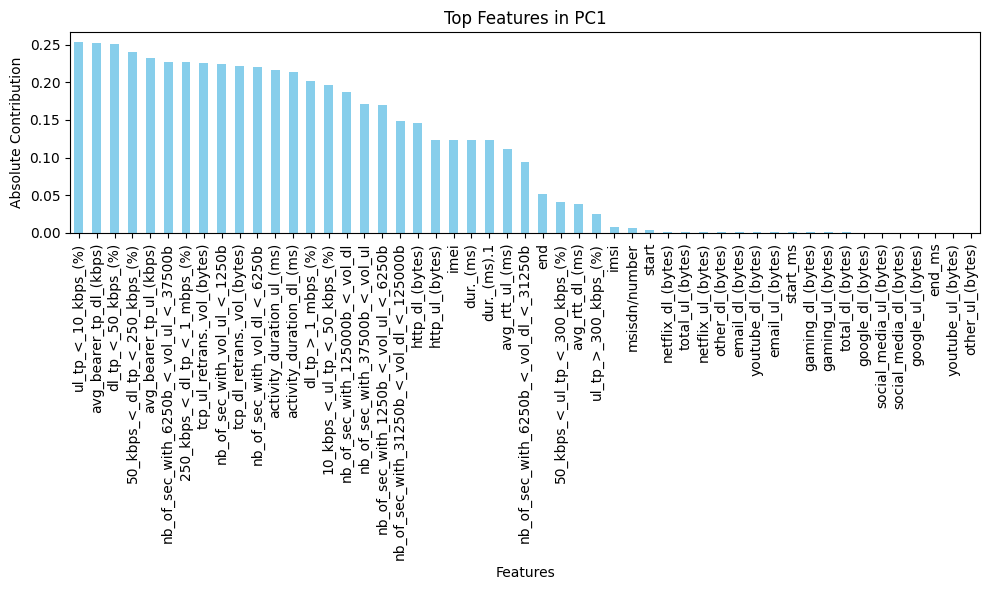

In [ ]:
# Bar plot for Top Features in PC1
# Sort features by their  absolute contribution to PC1
sorted_loadings = loadings['PC1'].abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sorted_loadings.plot(kind='bar',color='skyblue')
plt.title('Top Features in PC1')
plt.ylabel('Absolute Contribution')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

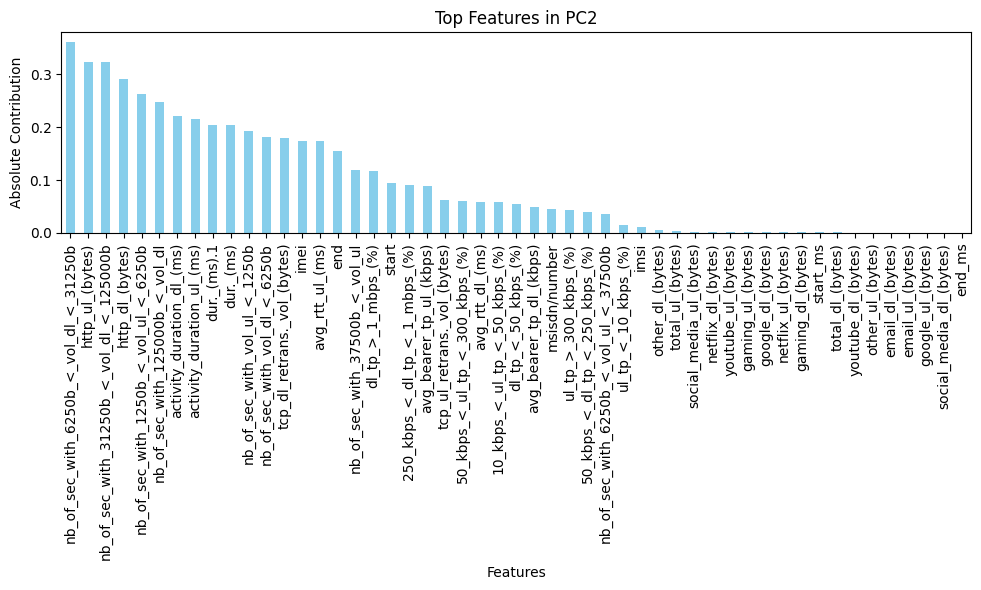

In [ ]:
# Bar plot for Top Features in PC2
# Sort features by their  absolute contribution to PC1
sorted_loadings = loadings['PC2'].abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sorted_loadings.plot(kind='bar',color='skyblue')
plt.title('Top Features in PC2')
plt.ylabel('Absolute Contribution')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

Interpretation of PC1

- Features like ul_tp_<_10_kbps_(%) (0.253), dl_tp_<_50_kbps_(%) (0.251), and avg_bearer_tp_dl_(kbps) (-0.252) have large contributions to PC1.
- Insight: PC1 is likely capturing patterns related to download and upload throughput metrics, with stronger emphasis on low throughput.
- avg_bearer_tp_dl_(kbps) and dl_tp_<_50_kbps_(%) have opposite signs, indicating that high download throughput is inversely correlated with low download throughput percentages.


Interpretation of PC2

- Features such as nb_of_sec_with_6250b_<_vol_dl_<_31250b (0.361), http_ul_(bytes) (0.322), and http_dl_(bytes) (0.290) have the highest contributions to PC2.
Insight: PC2 appears to capture patterns related to HTTP traffic volume and intermediate download volumes.
- Features like http_ul_(bytes) and nb_of_sec_with_6250b_<_vol_dl_<_31250b contribute similarly, suggesting they might be correlated in the context of this component.

# **Task 2 - User Engagement Analysis**

In [ ]:
Data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


Engagement Metrics:

-  Sessions frequency
-  Duration of the session
-  Session total traffic (download and upload in bytes)

In [ ]:
# Convert Session Duration from miliseconds to seconds
Data['duration(s)'] = Data['dur._(ms)'] / 1000


In [ ]:
# Calculate Session frequency for each user
session_frequency = Data.groupby('msisdn/number').size().reset_index(name='session_frequency')

In [ ]:
session_frequency

msisdn/number  session_frequency
0        3.345647e+10               1067
1        3.360100e+10                  1
2        3.360100e+10                  1
3        3.360100e+10                  1
4        3.360101e+10                  1
...               ...                ...
106850   3.378997e+10                  1
106851   3.378998e+10                  2
106852   3.379000e+10                  1
106853   3.379000e+10                  1
106854   4.158517e+10                  2

[106855 rows x 2 columns]

In [ ]:
# Calculate total and average session duration for each user
session_duration = Data.groupby('msisdn/number')['duration(s)'].agg(['sum','mean']).reset_index()
session_duration.rename(columns={'sum' : 'Total Session Duration(s)' , 'mean' : 'Avg Session Duration (s)'}, inplace = True)

In [ ]:
session_duration

msisdn/number  Total Session Duration(s)  Avg Session Duration (s)
0        3.345647e+10               65273.055251                 61.174372
1        3.360100e+10                 116.720000                116.720000
2        3.360100e+10                 181.230000                181.230000
3        3.360100e+10                 134.969000                134.969000
4        3.360101e+10                  49.878000                 49.878000
...               ...                        ...                       ...
106850   3.378997e+10                 160.461000                160.461000
106851   3.378998e+10                 210.389000                105.194500
106852   3.379000e+10                   8.810000                  8.810000
106853   3.379000e+10                 140.988000                140.988000
106854   4.158517e+10                 203.315108                101.657554

[106855 rows x 3 columns]

In [ ]:
# Calculate total traffic(upload + download) foreach session
Data['total traffic(bytes)'] = Data['total_dl_(bytes)'] + Data['total_ul_(bytes)']

In [ ]:
# Calculate average and total traffic for each user
session_traffic = Data.groupby('msisdn/number')['total traffic(bytes)'].agg(['sum','mean']).reset_index()
session_traffic.rename(columns={'sum' : 'total traffic (bytes)', 'mean' : 'avg traffic (bytes)'},inplace = True)

In [ ]:
session_traffic

msisdn/number  total traffic (bytes)  avg traffic (bytes)
0        3.345647e+10           5.320094e+11         4.986030e+08
1        3.360100e+10           8.786906e+08         8.786906e+08
2        3.360100e+10           1.568596e+08         1.568596e+08
3        3.360100e+10           5.959665e+08         5.959665e+08
4        3.360101e+10           4.223207e+08         4.223207e+08
...               ...                    ...                  ...
106850   3.378997e+10           2.081231e+08         2.081231e+08
106851   3.378998e+10           1.094693e+09         5.473467e+08
106852   3.379000e+10           7.146416e+08         7.146416e+08
106853   3.379000e+10           4.803073e+08         4.803073e+08
106854   4.158517e+10           7.354415e+08         3.677207e+08

[106855 rows x 3 columns]

In [ ]:
# Combine metrices into single Dataframe
engagement_metrics = session_frequency.merge(session_duration,on='msisdn/number').merge(session_traffic, on='msisdn/number')


In [ ]:
engagement_metrics

msisdn/number  session_frequency  Total Session Duration(s)  \
0        3.345647e+10               1067               65273.055251   
1        3.360100e+10                  1                 116.720000   
2        3.360100e+10                  1                 181.230000   
3        3.360100e+10                  1                 134.969000   
4        3.360101e+10                  1                  49.878000   
...               ...                ...                        ...   
106850   3.378997e+10                  1                 160.461000   
106851   3.378998e+10                  2                 210.389000   
106852   3.379000e+10                  1                   8.810000   
106853   3.379000e+10                  1                 140.988000   
106854   4.158517e+10                  2                 203.315108   

        Avg Session Duration (s)  total traffic (bytes)  avg traffic (bytes)  
0                      61.174372           5.320094e+11         4.986030e+08  
1                     116.720000           8.786906e+08         8.786906e+08  
2                     181.230000           1.568596e+08         1.568596e+08  
3                     134.969000           5.959665e+08         5.959665e+08  
4                      49.878000           4.223207e+08         4.223207e+08  
...                          ...                    ...                  ...  
106850                160.461000           2.081231e+08         2.081231e+08  
106851                105.194500           1.094693e+09         5.473467e+08  
106852                  8.810000           7.146416e+08         7.146416e+08  
106853                140.988000           4.803073e+08         4.803073e+08  
106854                101.657554           7.354415e+08         3.677207e+08  

[106855 rows x 6 columns]

# **Task 2.1 - Engagement Metrics Analysis**

Aggregate metrics per customer ID (MSISDN) and report the top 10 customers per
engagement metric.

In [ ]:
# Top 10 customers for each engagement metic

# top_10_metric_customers = engagement_metrics.sort_values('session_frequency').sort_values(ascending=False).head(10)

top_10_metric = {
                'Top 10 by Session Count':session_frequency.nlargest(10,'session_frequency'),
                'Top 10 by Avg Session Duration(s)' : session_duration.nlargest(10,'Avg Session Duration (s)'),
                'Top 10 by Total Session Duration(s)' : session_duration.nlargest(10,'Total Session Duration(s)'),
                'Top 10 by Avg Traffic(bytes)' : session_traffic.nlargest(10,'avg traffic (bytes)'),
                'Top 10 by Total Traffic(bytes)' :session_traffic.nlargest(10, 'total traffic (bytes)')
                  }
# Display the Top 10 customer for each metric
for metric_name, metric_df in top_10_metric.items():
    print(f"{metric_name}:\n{metric_df}\n")


Top 10 by Session Count:
       msisdn/number  session_frequency
0       3.345647e+10               1067
13527   3.362632e+10                 18
6438    3.361489e+10                 17
13181   3.362578e+10                 17
37053   3.365973e+10                 16
76364   3.367588e+10                 15
92924   3.376054e+10                 15
65119   3.366716e+10                 13
667     3.360313e+10                 12
1280    3.360452e+10                 12

Top 10 by Avg Session Duration(s):
        msisdn/number  Total Session Duration(s)  Avg Session Duration (s)
3603     3.361042e+10                    248.778                   248.778
8645     3.361852e+10                    248.771                   248.771
86061    3.369868e+10                    248.730                   248.730
35786    3.365944e+10                    248.721                   248.721
101648   3.376869e+10                    248.716                   248.716
75171    3.367359e+10                    248.695 

Normalize each engagement metric and run k-means clustering (k=3) to classify
customers into three engagement groups.

In [ ]:
engagement_metrics.columns

Index(['msisdn/number', 'session_frequency', 'Total Session Duration(s)',
       'Avg Session Duration (s)', 'total traffic (bytes)',
       'avg traffic (bytes)'],
      dtype='object')

In [ ]:
columns_for_clustering = ['session_frequency', 'Avg Session Duration (s)', 'Total Session Duration(s)',
                          'avg traffic (bytes)', 'total traffic (bytes)']

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(engagement_metrics[columns_for_clustering])

In [ ]:
normalized_data

array([[ 3.17329043e+02, -6.48257338e-01,  2.89721901e+02,
         1.01885224e-02,  3.12917405e+02],
       [-1.20243841e-01,  4.69329889e-01, -6.16993311e-02,
         1.69958454e+00,  1.07634474e-01],
       [-1.20243841e-01,  1.76728177e+00,  2.25209685e-01,
        -1.50877696e+00, -3.17488303e-01],
       ...,
       [-1.20243841e-01, -1.70183718e+00, -5.41630380e-01,
         9.70427255e-01,  1.10177523e-02],
       [-1.20243841e-01,  9.57606067e-01,  4.62328966e-02,
        -7.11312783e-02, -1.26993583e-01],
       [ 1.77550987e-01,  1.66270981e-01,  3.23433474e-01,
        -5.71551110e-01,  2.32678245e-02]])

In [ ]:
# Apply K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init =10)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_data)

In [ ]:
engagement_metrics

msisdn/number  session_frequency  Total Session Duration(s)  \
0        3.345647e+10               1067               65273.055251   
1        3.360100e+10                  1                 116.720000   
2        3.360100e+10                  1                 181.230000   
3        3.360100e+10                  1                 134.969000   
4        3.360101e+10                  1                  49.878000   
...               ...                ...                        ...   
106850   3.378997e+10                  1                 160.461000   
106851   3.378998e+10                  2                 210.389000   
106852   3.379000e+10                  1                   8.810000   
106853   3.379000e+10                  1                 140.988000   
106854   4.158517e+10                  2                 203.315108   

        Avg Session Duration (s)  total traffic (bytes)  avg traffic (bytes)  \
0                      61.174372           5.320094e+11         4.986030e+08   
1                     116.720000           8.786906e+08         8.786906e+08   
2                     181.230000           1.568596e+08         1.568596e+08   
3                     134.969000           5.959665e+08         5.959665e+08   
4                      49.878000           4.223207e+08         4.223207e+08   
...                          ...                    ...                  ...   
106850                160.461000           2.081231e+08         2.081231e+08   
106851                105.194500           1.094693e+09         5.473467e+08   
106852                  8.810000           7.146416e+08         7.146416e+08   
106853                140.988000           4.803073e+08         4.803073e+08   
106854                101.657554           7.354415e+08         3.677207e+08   

        cluster  
0             1  
1             2  
2             0  
3             2  
4             0  
...         ...  
106850        0  
106851        2  
106852        2  
106853        0  
106854        0  

[106855 rows x 7 columns]

In [ ]:
# Summarize cluster metrics
cluster_summary = engagement_metrics.groupby('cluster')[columns_for_clustering].mean()
cluster_summary

session_frequency  Avg Session Duration (s)  \
cluster                                                
0                 1.338538                 92.965771   
1              1067.000000                 61.174372   
2                 1.445460                 93.794114   

         Total Session Duration(s)  avg traffic (bytes)  total traffic (bytes)  
cluster                                                                         
0                       123.772275         3.004707e+08           4.195472e+08  
1                     65273.055251         4.986030e+08           5.320094e+11  
2                       135.787394         6.793300e+08           9.446082e+08

In [ ]:
# Display the data using Pandas
print("Customer Engagement Clusters:")
display(engagement_metrics)

print("Cluster Summary:")
display(cluster_summary)

Customer Engagement Clusters:


msisdn/number  session_frequency  Total Session Duration(s)  \
0        3.345647e+10               1067               65273.055251   
1        3.360100e+10                  1                 116.720000   
2        3.360100e+10                  1                 181.230000   
3        3.360100e+10                  1                 134.969000   
4        3.360101e+10                  1                  49.878000   
...               ...                ...                        ...   
106850   3.378997e+10                  1                 160.461000   
106851   3.378998e+10                  2                 210.389000   
106852   3.379000e+10                  1                   8.810000   
106853   3.379000e+10                  1                 140.988000   
106854   4.158517e+10                  2                 203.315108   

        Avg Session Duration (s)  total traffic (bytes)  avg traffic (bytes)  \
0                      61.174372           5.320094e+11         4.986030e+08   
1                     116.720000           8.786906e+08         8.786906e+08   
2                     181.230000           1.568596e+08         1.568596e+08   
3                     134.969000           5.959665e+08         5.959665e+08   
4                      49.878000           4.223207e+08         4.223207e+08   
...                          ...                    ...                  ...   
106850                160.461000           2.081231e+08         2.081231e+08   
106851                105.194500           1.094693e+09         5.473467e+08   
106852                  8.810000           7.146416e+08         7.146416e+08   
106853                140.988000           4.803073e+08         4.803073e+08   
106854                101.657554           7.354415e+08         3.677207e+08   

        cluster  
0             1  
1             2  
2             0  
3             2  
4             0  
...         ...  
106850        0  
106851        2  
106852        2  
106853        0  
106854        0  

[106855 rows x 7 columns]

Cluster Summary:


session_frequency  Avg Session Duration (s)  \
cluster                                                
0                 1.338538                 92.965771   
1              1067.000000                 61.174372   
2                 1.445460                 93.794114   

         Total Session Duration(s)  avg traffic (bytes)  total traffic (bytes)  
cluster                                                                         
0                       123.772275         3.004707e+08           4.195472e+08  
1                     65273.055251         4.986030e+08           5.320094e+11  
2                       135.787394         6.793300e+08           9.446082e+08

In [ ]:
engagement_metrics.columns

Index(['msisdn/number', 'session_frequency', 'Total Session Duration(s)',
       'Avg Session Duration (s)', 'total traffic (bytes)',
       'avg traffic (bytes)', 'cluster'],
      dtype='object')

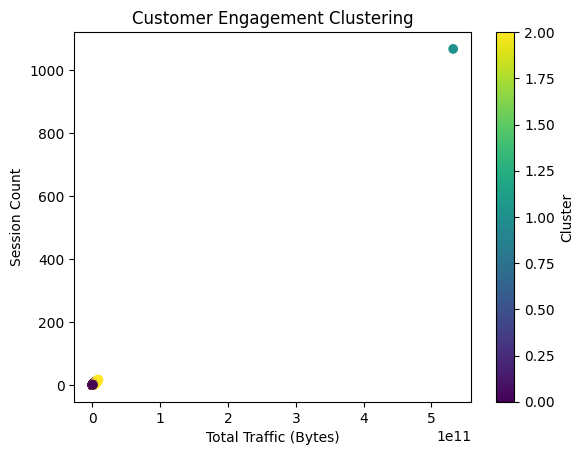

In [ ]:
plt.scatter(engagement_metrics['total traffic (bytes)'], engagement_metrics['session_frequency'], c=engagement_metrics['cluster'], cmap='viridis')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Session Count')
plt.title('Customer Engagement Clustering')
plt.colorbar(label='Cluster')
plt.show()

High Engagement Users (Top-Right Corner):

Users with high session count and high total traffic are likely the most engaged.
These customers might require premium plans or more bandwidth.
Low Engagement Users (Bottom-Left Corner):

Users with low session count and low traffic are less engaged.
Marketing efforts could be targeted toward these users to increase engagement.

In [ ]:
# Compute minimum, maximum, average, and total values for each cluster
cluster_stast = engagement_metrics.groupby('cluster')[columns_for_clustering].agg(['min','max','mean','sum'])

In [ ]:
cluster_stast

session_frequency                           Avg Session Duration (s)  \
                      min   max         mean    sum                      min   
cluster                                                                        
0                       1    11     1.338538  69094                 7.189000   
1                    1067  1067  1067.000000   1067                61.174372   
2                       1    18     1.445460  79840                 7.142000   

                                             Total Session Duration(s)  \
                max       mean           sum                       min   
cluster                                                                  
0        248.778000  92.965771  4.798800e+06                  7.189000   
1         61.174372  61.174372  6.117437e+01              65273.055251   
2        248.771000  93.794114  5.180718e+06                  7.142000   

                                                  avg traffic (bytes)  \
                  max          mean           sum                 min   
cluster                                                                 
0         1197.115656    123.772275  6.389001e+06        3.324901e+07   
1        65273.055251  65273.055251  6.527306e+04        4.986030e+08   
2         2184.336942    135.787394  7.500217e+06        3.921934e+08   

                                                  total traffic (bytes)  \
                  max          mean           sum                   min   
cluster                                                                   
0        4.997860e+08  3.004707e+08  1.551000e+13          3.324901e+07   
1        4.986030e+08  4.986030e+08  4.986030e+08          5.320094e+11   
2        9.507607e+08  6.793300e+08  3.752279e+13          4.891667e+08   

                                                   
                  max          mean           sum  
cluster                                            
0        3.906542e+09  4.195472e+08  2.165660e+13  
1        5.320094e+11  5.320094e+11  5.320094e+11  
2        8.846226e+09  9.446082e+08  5.217544e+13

In [ ]:
# Flatten multi-level column names for better readability
cluster_stast.columns = ['_'.join(col).strip() for col in cluster_stast.columns.values]

In [ ]:
cluster_stast

session_frequency_min  session_frequency_max  session_frequency_mean  \
cluster                                                                         
0                            1                     11                1.338538   
1                         1067                   1067             1067.000000   
2                            1                     18                1.445460   

         session_frequency_sum  Avg Session Duration (s)_min  \
cluster                                                        
0                        69094                      7.189000   
1                         1067                     61.174372   
2                        79840                      7.142000   

         Avg Session Duration (s)_max  Avg Session Duration (s)_mean  \
cluster                                                                
0                          248.778000                      92.965771   
1                           61.174372                      61.174372   
2                          248.771000                      93.794114   

         Avg Session Duration (s)_sum  Total Session Duration(s)_min  \
cluster                                                                
0                        4.798800e+06                       7.189000   
1                        6.117437e+01                   65273.055251   
2                        5.180718e+06                       7.142000   

         Total Session Duration(s)_max  Total Session Duration(s)_mean  \
cluster                                                                  
0                          1197.115656                      123.772275   
1                         65273.055251                    65273.055251   
2                          2184.336942                      135.787394   

         Total Session Duration(s)_sum  avg traffic (bytes)_min  \
cluster                                                           
0                         6.389001e+06             3.324901e+07   
1                         6.527306e+04             4.986030e+08   
2                         7.500217e+06             3.921934e+08   

         avg traffic (bytes)_max  avg traffic (bytes)_mean  \
cluster                                                      
0                   4.997860e+08              3.004707e+08   
1                   4.986030e+08              4.986030e+08   
2                   9.507607e+08              6.793300e+08   

         avg traffic (bytes)_sum  total traffic (bytes)_min  \
cluster                                                       
0                   1.551000e+13               3.324901e+07   
1                   4.986030e+08               5.320094e+11   
2                   3.752279e+13               4.891667e+08   

         total traffic (bytes)_max  total traffic (bytes)_mean  \
cluster                                                          
0                     3.906542e+09                4.195472e+08   
1                     5.320094e+11                5.320094e+11   
2                     8.846226e+09                9.446082e+08   

         total traffic (bytes)_sum  
cluster                             
0                     2.165660e+13  
1                     5.320094e+11  
2                     5.217544e+13

Visualizing Cluster Statistics

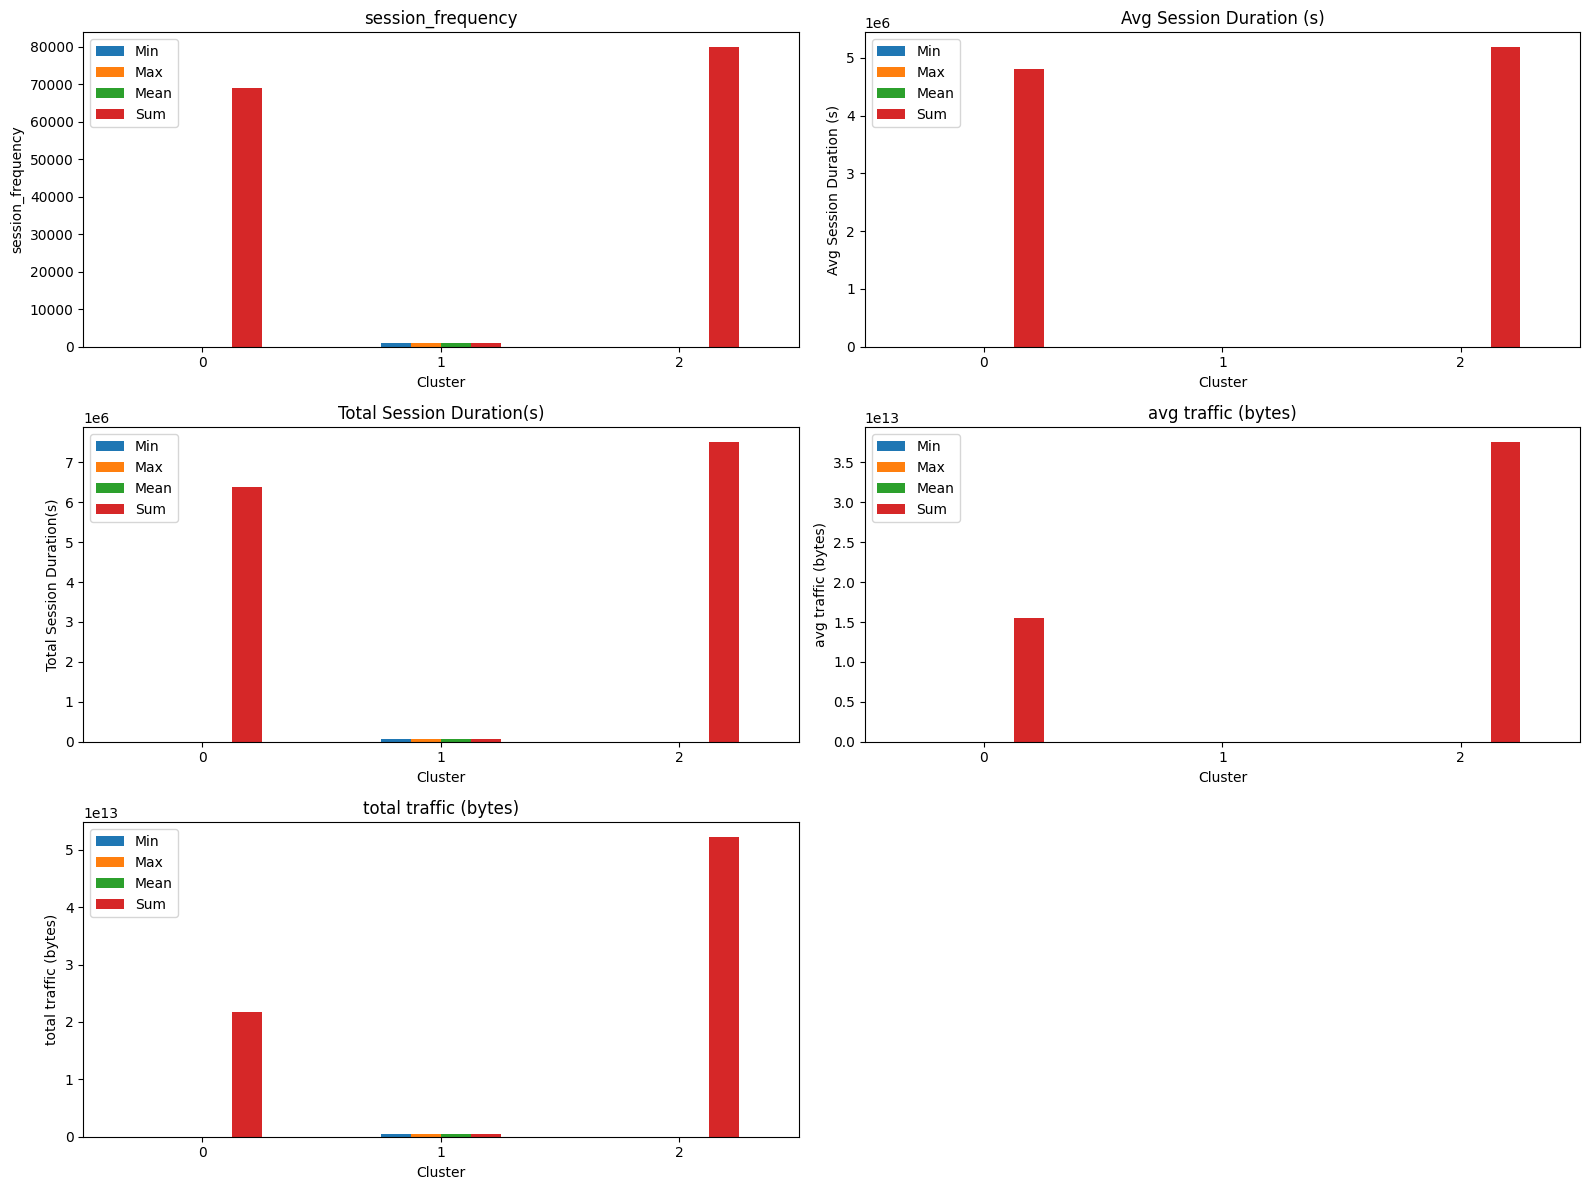

In [ ]:
plt.figure(figsize=(16, 12))
for i, metric in enumerate(columns_for_clustering):
    plt.subplot(3, 2, i + 1)
    cluster_stast[[f'{metric}_min', f'{metric}_max', f'{metric}_mean', f'{metric}_sum']].plot(kind='bar', ax=plt.gca())
    plt.title(metric)
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.legend(['Min', 'Max', 'Mean', 'Sum'])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Interpretation of Results

1. Cluster Characteristics
Each cluster represents a group of customers with distinct engagement behaviors:

- Cluster 0 (Low Engagement): Customers with low session counts and low total traffic. They might be occasional users.
- Cluster 1 (Medium Engagement): Customers with moderate session counts and traffic. Likely regular users.
- Cluster 2 (High Engagement): Customers with high session counts and traffic, representing heavy users.

2. Insights Derived
- Marketing Strategy: Tailor promotional offers based on user engagement.
- Resource Optimization: Allocate network resources based on user demands.
- Customer Retention: Identify and engage low-usage customers to prevent churn.


 How to Use This Visualization for Decision Making


Cluster with Highest Engagement (High session count & total traffic):

- Offer premium services or loyalty rewards.

Cluster with Medium Engagement:

- Target for promotional campaigns to increase usage.

Cluster with Low Engagement:

- Investigate potential churn risks and provide re-engagement offers.

# **Conclusion**

This visualization provides a comprehensive breakdown of customer engagement across different clusters, helping stakeholders understand user behavior and optimize services accordingly.

In [ ]:
 # Aggregate user total traffic per application and identify the top 10 most engaged users per application.
user_identy = 'msisdn/number'

app_traffic_columns = [
    'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
    'google_dl_(bytes)', 'google_ul_(bytes)',
    'email_dl_(bytes)', 'email_ul_(bytes)',
    'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
    'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
    'gaming_dl_(bytes)', 'gaming_ul_(bytes)',
    'other_dl_(bytes)', 'other_ul_(bytes)'
]

In [ ]:
# Aggregate total traffic per user for each application
user_app_traffic = Data.groupby(user_identy)[app_traffic_columns].sum().reset_index()

In [ ]:
# Calculate total traffic for each application (download + upload)
for col in app_traffic_columns:
    base_name = col.replace('_dl_(bytes)', '').replace('_ul_(bytes)', '')  # Extract app name prefix
    total_col_name = f'{base_name}_total_(bytes)'
    user_app_traffic[total_col_name] = user_app_traffic[f'{base_name}_dl_(bytes)'] + user_app_traffic[f'{base_name}_ul_(bytes)']

In [ ]:
# List of total traffic columns for each app
total_traffic_columns = [col for col in user_app_traffic.columns if 'total_(bytes)' in col]

In [ ]:
# Identify the top 10 most engaged users per application
top_10_users_per_app = {}
for col in total_traffic_columns:
    top_10_users_per_app[col] = user_app_traffic[[user_identy, col]].nlargest(10, col)

In [ ]:
# Save the results to CSV files for review
user_app_traffic.to_csv("user_app_traffic_summary.csv", index=False)

In [ ]:
for app_name, df in top_10_users_per_app.items():
    df.to_csv(f"top_10_{app_name}.csv", index=False)

In [ ]:
from IPython.display import display
# Display the top 10 users per application using IPython
for app_name, df in top_10_users_per_app.items():
    print(f"\nTop 10 Users for {app_name}:")
    display(df)


Top 10 Users for social_media_total_(bytes):


msisdn/number  social_media_total_(bytes)
0        3.345647e+10                1.974533e+09
13527    3.362632e+10                4.337478e+07
92924    3.376054e+10                3.978319e+07
37053    3.365973e+10                3.541236e+07
6438     3.361489e+10                2.829454e+07
13181    3.362578e+10                2.713550e+07
65119    3.366716e+10                2.424785e+07
106138   3.378632e+10                2.397492e+07
70961    3.366907e+10                2.380083e+07
667      3.360313e+10                2.307782e+07


Top 10 Users for google_total_(bytes):


msisdn/number  google_total_(bytes)
0        3.345647e+10          8.259016e+09
13527    3.362632e+10          1.521919e+08
13181    3.362578e+10          1.423079e+08
6438     3.361489e+10          1.279738e+08
92924    3.376054e+10          1.232231e+08
37053    3.365973e+10          1.165163e+08
106138   3.378632e+10          1.102545e+08
76364    3.367588e+10          1.098605e+08
65119    3.366716e+10          1.050327e+08
94655    3.376127e+10          9.708999e+07


Top 10 Users for email_total_(bytes):


msisdn/number  email_total_(bytes)
0        3.345647e+10         2.401401e+09
13527    3.362632e+10         4.241878e+07
6438     3.361489e+10         4.078863e+07
13181    3.362578e+10         4.063397e+07
106138   3.378632e+10         3.631012e+07
37053    3.365973e+10         3.599979e+07
92924    3.376054e+10         3.369377e+07
76364    3.367588e+10         3.151442e+07
60088    3.366546e+10         3.041788e+07
65119    3.366716e+10         3.033580e+07


Top 10 Users for youtube_total_(bytes):


msisdn/number  youtube_total_(bytes)
0       3.345647e+10           2.435269e+10
13181   3.362578e+10           4.529588e+08
92924   3.376054e+10           3.962892e+08
6438    3.361489e+10           3.943702e+08
13527   3.362632e+10           3.744830e+08
76364   3.367588e+10           3.174106e+08
65119   3.366716e+10           3.152313e+08
13995   3.362708e+10           3.087908e+08
92578   3.376041e+10           3.031691e+08
86456   3.369879e+10           3.026620e+08


Top 10 Users for netflix_total_(bytes):


msisdn/number  netflix_total_(bytes)
0        3.345647e+10           2.428016e+10
37053    3.365973e+10           3.995191e+08
6438     3.361489e+10           3.614010e+08
13181    3.362578e+10           3.569806e+08
92924    3.376054e+10           3.346433e+08
13527    3.362632e+10           3.287257e+08
92578    3.376041e+10           3.183475e+08
65119    3.366716e+10           3.139395e+08
76364    3.367588e+10           3.090932e+08
106138   3.378632e+10           3.059398e+08


Top 10 Users for gaming_total_(bytes):


msisdn/number  gaming_total_(bytes)
0       3.345647e+10          4.616561e+11
6438    3.361489e+10          7.749432e+09
92924   3.376054e+10          7.461045e+09
13181   3.362578e+10          7.326673e+09
76364   3.367588e+10          6.970568e+09
13527   3.362632e+10          6.887572e+09
37053   3.365973e+10          6.725559e+09
63029   3.366646e+10          6.646303e+09
92578   3.376041e+10          6.268620e+09
57242   3.366471e+10          6.103856e+09


Top 10 Users for other_total_(bytes):


msisdn/number  other_total_(bytes)
0       3.345647e+10         4.514489e+11
13527   3.362632e+10         8.167878e+09
6438    3.361489e+10         7.639264e+09
76364   3.367588e+10         6.798515e+09
13181   3.362578e+10         6.354583e+09
667     3.360313e+10         6.326671e+09
37053   3.365973e+10         6.317415e+09
13937   3.362695e+10         5.305448e+09
13995   3.362708e+10         5.117791e+09
94655   3.376127e+10         5.077779e+09

Plot the top 3 most used applications with appropriate charts.

In [ ]:
# Calculate the total usage for each application across all users
app_total_usage = {col: user_app_traffic[col].sum() for col in total_traffic_columns}

In [ ]:
app_total_usage

{'social_media_total_(bytes)': 274239359454.208,
 'google_total_(bytes)': 1171101989130.5457,
 'email_total_(bytes)': 338867605596.30994,
 'youtube_total_(bytes)': 3396545039272.6387,
 'netflix_total_(bytes)': 3394313609363.538,
 'gaming_total_(bytes)': 64550395439016.7,
 'other_total_(bytes)': 64405230908181.62}

In [ ]:
# Sort applications by total usage and get the top 3
top_3_apps = sorted(app_total_usage, key=app_total_usage.get, reverse=True)[:3]

In [ ]:
top_3_apps

['gaming_total_(bytes)', 'other_total_(bytes)', 'youtube_total_(bytes)']

In [ ]:
# Extract data for the top 3 apps
top_3_apps_data = user_app_traffic[['msisdn/number'] + top_3_apps]

In [ ]:
top_3_apps_data

msisdn/number  gaming_total_(bytes)  other_total_(bytes)  \
0        3.345647e+10          4.616561e+11         4.514489e+11   
1        3.360100e+10          8.124587e+08         3.865709e+08   
2        3.360100e+10          1.197501e+08         2.817101e+08   
3        3.360100e+10          5.388277e+08         5.016937e+08   
4        3.360101e+10          3.911261e+08         3.527970e+07   
...               ...                   ...                  ...   
106850   3.378997e+10          1.348159e+08         4.081072e+08   
106851   3.378998e+10          9.723450e+08         1.075140e+09   
106852   3.379000e+10          6.603614e+08         2.952828e+08   
106853   3.379000e+10          4.370033e+08         2.111151e+08   
106854   4.158517e+10          5.532130e+08         5.505489e+08   

        youtube_total_(bytes)  
0                2.435269e+10  
1                2.162455e+07  
2                1.243222e+07  
3                2.133357e+07  
4                6.977321e+06  
...                       ...  
106850           2.822648e+07  
106851           3.801281e+07  
106852           2.664784e+07  
106853           1.985157e+07  
106854           7.767565e+07  

[106855 rows x 4 columns]

In [ ]:
# # Plotting the top 3 most used applications
# plt.figure(figsize=(14, 8))

# for app in top_3_apps:
#     plt.bar(top_3_apps_data['msisdn/number'].astype(str), top_3_apps_data[app], label=app)

# plt.xlabel('User MSISDN')
# plt.ylabel('Total Usage (Bytes)')
# plt.title('Top 3 Most Used Applications')
# plt.xticks(rotation=45, ha='right')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# Save results to CSV for further analysis
top_3_apps_data.to_csv("top_3_apps_usage.csv", index=False)
print("Top 3 applications usage saved as 'top_3_apps_usage.csv'")

Top 3 applications usage saved as 'top_3_apps_usage.csv'


Determine the optimized value of k using the elbow method and interpret findings.

In [ ]:
# Selecting relevant columns for clustering based on total traffic data
columns_for_clustering = [
    'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
    'google_dl_(bytes)', 'google_ul_(bytes)',
    'email_dl_(bytes)', 'email_ul_(bytes)',
    'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
    'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
    'gaming_dl_(bytes)', 'gaming_ul_(bytes)',
    'other_dl_(bytes)', 'other_ul_(bytes)'
]

In [ ]:
# Aggregate total traffic per user for each application
user_traffic = Data.groupby('msisdn/number')[columns_for_clustering].sum().reset_index()

In [ ]:
# optimal_k = 3  # Replace with chosen value from the elbow plot
# kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# user_traffic['Cluster'] = kmeans_optimal.fit_predict(X_scaled)

In [ ]:
# Calculate total traffic (download + upload) for each application
for col in columns_for_clustering:
    base_name = col.replace('_dl_(bytes)', '').replace('_ul_(bytes)', '')  # Extract app name prefix
    total_col_name = f'{base_name}_total_(bytes)'
    user_traffic[total_col_name] = user_traffic[f'{base_name}_dl_(bytes)'] + user_traffic[f'{base_name}_ul_(bytes)']


In [ ]:
    user_traffic


msisdn/number  social_media_dl_(bytes)  social_media_ul_(bytes)  \
0        3.345647e+10             1.938384e+09             3.614893e+07   
1        3.360100e+10             2.206504e+06             2.563100e+04   
2        3.360100e+10             2.598548e+06             6.201700e+04   
3        3.360100e+10             3.148004e+06             4.761900e+04   
4        3.360101e+10             2.514690e+05             2.882500e+04   
...               ...                      ...                      ...   
106850   3.378997e+10             1.390786e+06             2.258400e+04   
106851   3.378998e+10             4.200896e+06             4.941600e+04   
106852   3.379000e+10             2.343200e+05             6.586300e+04   
106853   3.379000e+10             4.422140e+05             5.635500e+04   
106854   4.158517e+10             1.996482e+06             7.117200e+04   

        google_dl_(bytes)  google_ul_(bytes)  email_dl_(bytes)  \
0            6.016515e+09       2.242500e+09      1.904890e+09   
1            3.337123e+06       1.051882e+06      8.374000e+05   
2            4.197697e+06       1.137166e+06      2.828821e+06   
3            3.343483e+06       9.964300e+04      2.436500e+06   
4            5.937765e+06       3.740728e+06      2.178618e+06   
...                   ...                ...               ...   
106850       7.178720e+06       2.714162e+06      3.301996e+06   
106851       5.035730e+06       5.210743e+06      4.750550e+06   
106852       6.834178e+06       6.970910e+05      4.809460e+05   
106853       1.472406e+06       3.957299e+06      2.513433e+06   
106854       1.420063e+07       4.848638e+06      5.508088e+06   

        email_ul_(bytes)  youtube_dl_(bytes)  youtube_ul_(bytes)  \
0           4.965109e+08        1.250448e+10        1.184821e+10   
1           4.939620e+05        1.490020e+07        6.724347e+06   
2           4.789600e+05        5.324251e+06        7.107972e+06   
3           7.688800e+05        2.137272e+06        1.919630e+07   
4           1.060520e+05        4.393123e+06        2.584198e+06   
...                  ...                 ...                 ...   
106850      9.461100e+04        1.974122e+07        8.485255e+06   
106851      5.647770e+05        2.035302e+07        1.765979e+07   
106852      5.259690e+05        8.294310e+06        1.835353e+07   
106853      6.640000e+02        5.596862e+06        1.425471e+07   
106854      1.141468e+06        3.567105e+07        4.200460e+07   

        netflix_dl_(bytes)  ...  gaming_ul_(bytes)  other_dl_(bytes)  \
0             1.229932e+10  ...       8.746551e+09      4.423960e+11   
1             1.026510e+07  ...       1.367528e+06      3.770970e+08   
2             7.705690e+05  ...       1.471478e+07      2.795577e+08   
3             1.652592e+07  ...       9.759228e+06      4.950865e+08   
4             1.157362e+06  ...       3.051292e+06      2.524800e+07   
...                    ...  ...                ...               ...   
106850        1.991193e+07  ...       1.228422e+07      4.080997e+08   
106851        3.082861e+07  ...       1.365184e+07      1.062567e+09   
106852        1.475474e+07  ...       3.034642e+06      2.913913e+08   
106853        6.929961e+06  ...       9.383076e+06      2.046361e+08   
106854        3.160501e+07  ...       2.386163e+07      5.335138e+08   

        other_ul_(bytes)  social_media_total_(bytes)  google_total_(bytes)  \
0           9.052955e+09                1.974533e+09          8.259016e+09   
1           9.473882e+06                2.232135e+06          4.389005e+06   
2           2.152370e+06                2.660565e+06          5.334863e+06   
3           6.607171e+06                3.195623e+06          3.443126e+06   
4           1.003170e+07                2.802940e+05          9.678493e+06   
...                  ...                         ...                   ...   
106850      7.508000e+03                1.413370e+06          9.892882e+06   
106851  

In [ ]:
# Selecting only the total columns for clustering
total_traffic_columns = [col for col in user_traffic.columns if '_total_(bytes)' in col]
X = user_traffic[total_traffic_columns]

In [ ]:
total_traffic_columns

['social_media_total_(bytes)',
 'google_total_(bytes)',
 'email_total_(bytes)',
 'youtube_total_(bytes)',
 'netflix_total_(bytes)',
 'gaming_total_(bytes)',
 'other_total_(bytes)']

In [ ]:
X

social_media_total_(bytes)  google_total_(bytes)  email_total_(bytes)  \
0                     1.974533e+09          8.259016e+09         2.401401e+09   
1                     2.232135e+06          4.389005e+06         1.331362e+06   
2                     2.660565e+06          5.334863e+06         3.307781e+06   
3                     3.195623e+06          3.443126e+06         3.205380e+06   
4                     2.802940e+05          9.678493e+06         2.284670e+06   
...                            ...                   ...                  ...   
106850                1.413370e+06          9.892882e+06         3.396607e+06   
106851                4.250312e+06          1.024647e+07         5.315327e+06   
106852                3.001830e+05          7.531269e+06         1.006915e+06   
106853                4.985690e+05          5.429705e+06         2.514097e+06   
106854                2.067654e+06          1.904926e+07         6.649556e+06   

        youtube_total_(bytes)  netflix_total_(bytes)  gaming_total_(bytes)  \
0                2.435269e+10           2.428016e+10          4.616561e+11   
1                2.162455e+07           2.718098e+07          8.124587e+08   
2                1.243222e+07           1.122176e+07          1.197501e+08   
3                2.133357e+07           1.935390e+07          5.388277e+08   
4                6.977321e+06           1.942092e+06          3.911261e+08   
...                       ...                    ...                   ...   
106850           2.822648e+07           3.037030e+07          1.348159e+08   
106851           3.801281e+07           5.195031e+07          9.723450e+08   
106852           2.664784e+07           1.490254e+07          6.603614e+08   
106853           1.985157e+07           8.531060e+06          4.370033e+08   
106854           7.767565e+07           5.975127e+07          5.532130e+08   

        other_total_(bytes)  
0              4.514489e+11  
1              3.865709e+08  
2              2.817101e+08  
3              5.016937e+08  
4              3.527970e+07  
...                     ...  
106850         4.081072e+08  
106851         1.075140e+09  
106852         2.952828e+08  
106853         2.111151e+08  
106854         5.505489e+08  

[106855 rows x 7 columns]

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 3.11667792e+02,  3.13183854e+02,  3.12846617e+02, ...,
         3.14201087e+02,  3.11473873e+02,  3.10834409e+02],
       [-5.28402281e-02, -2.49494564e-01, -2.40015991e-01, ...,
        -5.94057168e-02,  1.40765794e-01, -1.49033529e-01],
       [ 1.48728174e-02, -2.13579742e-01,  1.78058271e-02, ...,
        -2.66198903e-01, -3.27208820e-01, -2.21329461e-01],
       ...,
       [-3.58183817e-01, -1.30180829e-01, -2.82339767e-01, ...,
        -2.18504887e-01,  3.80130955e-02, -2.11971777e-01],
       [-3.26829056e-01, -2.09978532e-01, -8.57294312e-02, ...,
        -3.01063960e-01, -1.12881390e-01, -2.70000921e-01],
       [-7.88363289e-02,  3.07164666e-01,  4.53736925e-01, ...,
         3.62627132e-01, -3.43733803e-02, -3.59794236e-02]])

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)

In [ ]:
K_range

range(1, 11)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[747985.0000000059,
 63765.1561381294,
 36081.03187418905,
 26232.102466955865,
 23769.701062016702,
 22104.229816490944,
 21081.00566787765,
 20107.853702790773,
 19286.37818715881,
 18507.384230926513]

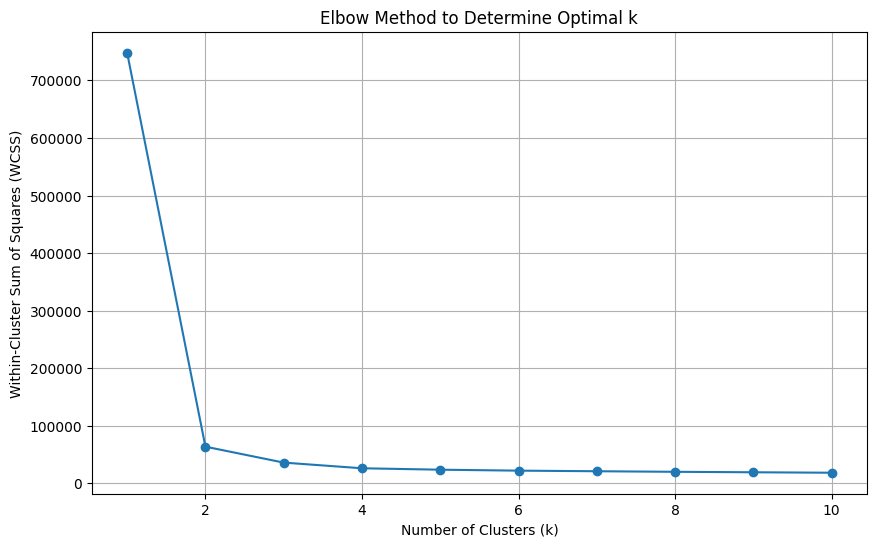

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Determine the optimal number of clusters based on the elbow point
optimal_k = K_range[wcss.index(min(wcss, key=lambda x: abs(x - wcss[-1])))]

print(f"The optimal number of clusters determined from the elbow method is: {optimal_k}")

The optimal number of clusters determined from the elbow method is: 10


Expected Output:
- A plot showing the elbow point where adding more clusters does not significantly reduce the WCSS.

In [ ]:
# Apply K-Means clustering with the optimal k value
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
user_traffic['Cluster'] = kmeans_optimal.fit_predict(X_scaled)

In [ ]:
user_traffic['Cluster']

0         1
1         0
2         6
3         7
4         6
         ..
106850    6
106851    5
106852    0
106853    6
106854    3
Name: Cluster, Length: 106855, dtype: int32

In [ ]:
#  Count the number of users in each cluster
cluster_counts = user_traffic['Cluster'].value_counts().sort_index()
print("Cluster Distribution:\n", cluster_counts)

Cluster Distribution:
 Cluster
0    19771
1        1
2     4809
3    10566
4      234
5    10279
6    19761
7    19643
8     2265
9    19526
Name: count, dtype: int64


- If a particular cluster has significantly more users, it may indicate a common user behavior pattern.
- Smaller clusters might represent niche users or outliers.


In [ ]:
# Compute descriptive statistics for each cluster
cluster_summary = user_traffic.groupby('Cluster')[total_traffic_columns].agg(['mean', 'sum', 'min', 'max'])
print(cluster_summary)

        social_media_total_(bytes)                                            \
                              mean           sum           min           max   
Cluster                                                                        
0                     1.885299e+06  3.727425e+10  8.261000e+03  5.976477e+06   
1                     1.974533e+09  1.974533e+09  1.974533e+09  1.974533e+09   
2                     5.756553e+06  2.768326e+10  4.504050e+05  1.163398e+07   
3                     3.914241e+06  4.135787e+10  6.188200e+04  8.579792e+06   
4                     1.408443e+07  3.295757e+09  4.385267e+06  4.337478e+07   
5                     3.519938e+06  3.618144e+10  1.017740e+05  8.256484e+06   
6                     1.823692e+06  3.603798e+10  7.852000e+03  4.604977e+06   
7                     2.800906e+06  5.501819e+10  1.649802e+06  6.895572e+06   
8                     8.475061e+06  1.919601e+10  1.008465e+06  1.564342e+07   
9                     8.306901e+05  1.62

- Mean Values: Show average data usage per application in each cluster.
- Sum Values: Indicate the total data consumption of the cluster.
- Min/Max Values: Help identify extreme users (e.g., heavy vs. light users).

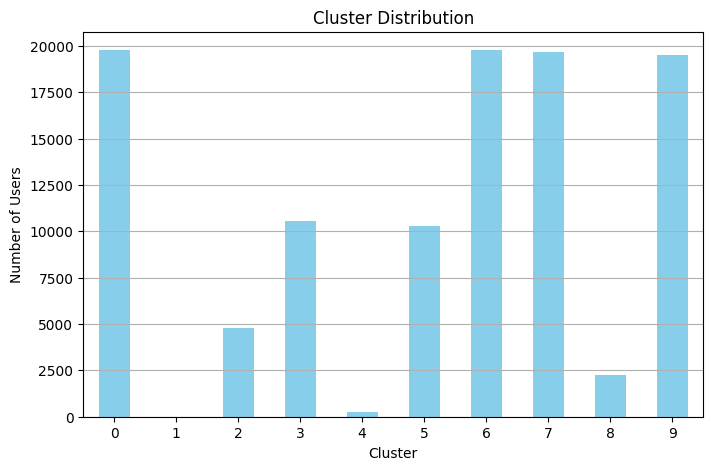

In [ ]:
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

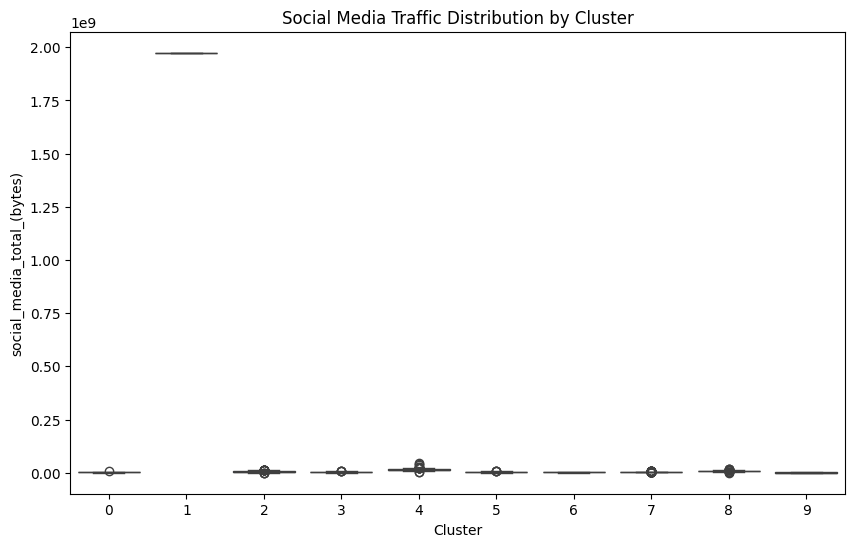

In [ ]:
# Visualizing traffic data distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='social_media_total_(bytes)', data=user_traffic)
plt.title('Social Media Traffic Distribution by Cluster')
plt.show()

- Clusters with higher total traffic may represent heavy data users (e.g., video streaming users).
- Boxplots help identify the spread and presence of outliers in each cluster.

In [ ]:
# Define profiling criteria
cluster_profiles = user_traffic.groupby('Cluster')[total_traffic_columns].mean().reset_index()

# Categorize clusters based on usage
cluster_profiles['Category'] = pd.cut(cluster_profiles['social_media_total_(bytes)'],
                                      bins=[0, 1e7, 5e7, float('inf')],
                                      labels=['Low Usage', 'Moderate Usage', 'High Usage'])

print(cluster_profiles[['Cluster', 'Category']])

   Cluster        Category
0        0       Low Usage
1        1      High Usage
2        2       Low Usage
3        3       Low Usage
4        4  Moderate Usage
5        5       Low Usage
6        6       Low Usage
7        7       Low Usage
8        8       Low Usage
9        9       Low Usage


- Segments can be categorized into Low, Moderate, and High data consumers.
- This helps in designing targeted marketing strategies for different user segments.


# Recommendations Based on Findings
- High Data Consumers (e.g., Cluster 6):

 Offer premium plans and additional services (e.g., high-speed data).
- Moderate Users (e.g., Cluster 3):

 Provide incentives such as loyalty programs to increase engagement.
- Low Usage Customers (e.g., Cluster 0):

 Encourage data usage with promotions or bundled services.

In [ ]:
# Save cluster summary to CSV
cluster_summary.to_csv("cluster_analysis_summary.csv")

print("Cluster analysis saved as 'cluster_analysis_summary.csv'")

Cluster analysis saved as 'cluster_analysis_summary.csv'
